Convolutional Neural Network (CNN / Conv Net)

In [3]:
# jupternotebooks code that fits the display window to my screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [4]:
# Import the keras libraries
from keras import backend
from keras.models import Model
from keras.datasets import mnist
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Input, Concatenate, GlobalAveragePooling2D, Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, SeparableConv2D, MaxPooling2D, AveragePooling2D, SeparableConv2D
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.utils import plot_model
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator # Library for data augmentation
# import support libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display # Library to help view images
from PIL import Image # Library to help view images
import os, shutil # Library for navigating files
np.random.seed(42)

Using TensorFlow backend.


In [5]:
# import, load, and prepare the input images
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

# reshape and normalize the images
# normalizing helps the model faster approach to a global minima at error surface
# Normalizing the RGB codes by dividing it to the max RGB value
# the input image so that each pixel value is between 0 to 1
# values are float so that we can get decimal points after division


train_images =  train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/train_images.max()

test_images =  test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/test_images.max()



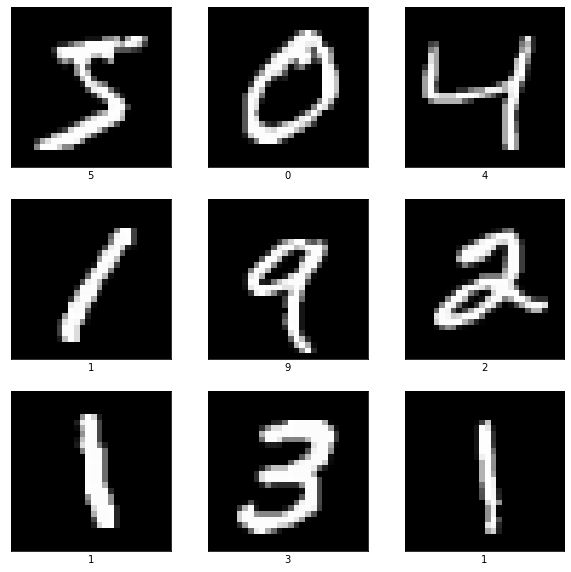

In [6]:
# plot each of the 9 - digit images:
plt.figure(figsize=(10,10))
for i in range(0, 9):
    plt.subplot(3, 3, + 1 + i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.xlabel(train_labels[i])
plt.show()

In [7]:
# convert the y input labels to categorical (instead of numbers)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# lastly, split the training mnist dataset into training and validation
# now we have train, validation, and test datasets
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.25, random_state=42)

In [17]:
print('x_train shape:', x_train.shape)
print('Number of images in training:', x_train.shape[0])
print('Number of images in validation:', x_val.shape[0])
print('Number of images in test:', test_images.shape[0])

x_train shape: (45000, 28, 28, 1)
Number of images in training: 45000
Number of images in validation: 15000
Number of images in test: 10000


Train on 45000 samples, validate on 15000 samples
Epoch 1/15
45000/45000 [==============================] - 32s 708us/step - loss: 0.1908 - accuracy: 0.9410 - val_loss: 0.0741 - val_accuracy: 0.9776
Epoch 2/15
45000/45000 [==============================] - 32s 709us/step - loss: 0.0809 - accuracy: 0.9747 - val_loss: 0.0613 - val_accuracy: 0.9817
Epoch 3/15
45000/45000 [==============================] - 33s 723us/step - loss: 0.0635 - accuracy: 0.9812 - val_loss: 0.0395 - val_accuracy: 0.9887
Epoch 4/15
45000/45000 [==============================] - 33s 731us/step - loss: 0.0516 - accuracy: 0.9843 - val_loss: 0.0453 - val_accuracy: 0.9876
Epoch 5/15
45000/45000 [==============================] - 33s 742us/step - loss: 0.0470 - accuracy: 0.9861 - val_loss: 0.0387 - val_accuracy: 0.9901
Epoch 6/15
45000/45000 [==============================] - 34s 753us/step - loss: 0.0399 - accuracy: 0.9875 - val_loss: 0.0407 - val_accuracy: 0.9883
Epoch 7/15
45000/45000 [==============================] 

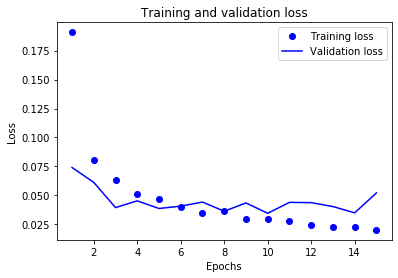

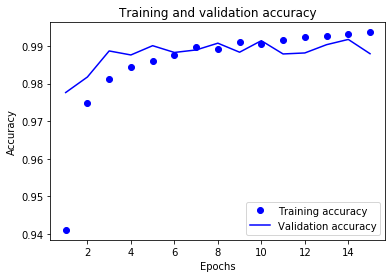

10000/10000 [==============================] - 2s 221us/step
test_acc: 0.9908999800682068


In [9]:
backend.clear_session()
# create the sequential model and then add layers
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# set an optimizer with a given loss function which uses a metric
model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

# fit the model by using our train data
history = model.fit(x_train, 
          y_train, 
          epochs = 15, 
          batch_size = 32,  
          validation_data=(x_val, y_val),
          verbose = 1,
          callbacks=[EarlyStopping(monitor='accuracy', patience=15, restore_best_weights = True)])

# capture the model accuracy and loss by epoch
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

# plot the model's accuracy and loss by epoch
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy'
)
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# evaluate the trained model with test_images and test_labels
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

In [18]:
# each prediction has an array of 10 numbers that represent the confidence level of each hand-written image
# here is the highest confidence level
# this means that the model is confident that the first image is a 7
predictions = model.predict(test_images)
print("predictions array:",predictions[0])

result = np.argmax(predictions[0])
# here is the predicted label for each image in the test set
print('Predicted result is: %s, target result is: %s' % (result, test_labels[0]))

def plot_image(i, test_image, test_label, img):
  test_image, true_label, img = test_image, test_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img.reshape(28, 28), cmap=plt.get_cmap('gray'))




predictions array: [0.10408975 0.10386849 0.09703153 0.09967034 0.0996512  0.09554029
 0.09657125 0.10642945 0.10200541 0.09514234]
Predicted result is: 7, target result is: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


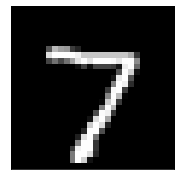

In [19]:
i = 0
plt.figure(figsize=(6,3))
plot_image(i, predictions[i], test_labels, test_images)
plt.show()

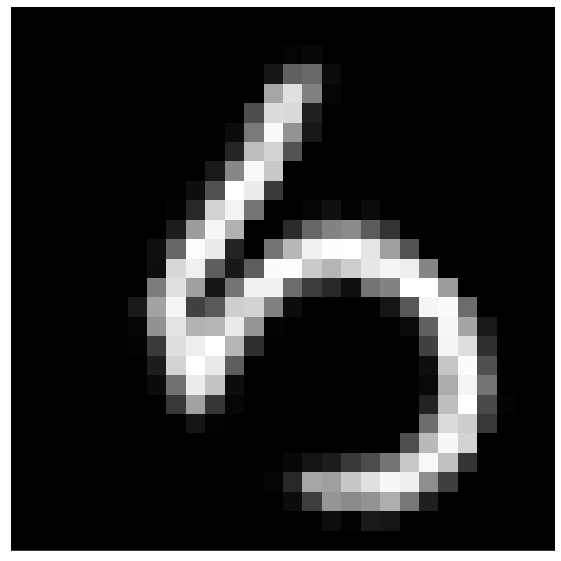

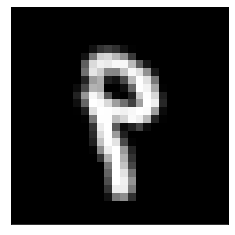

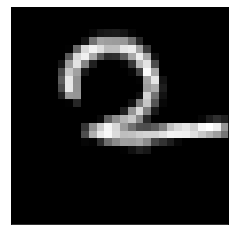

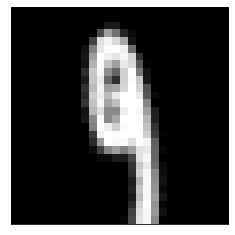

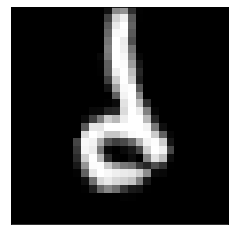

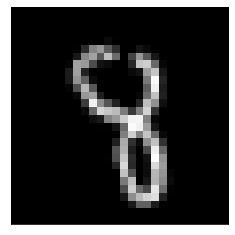

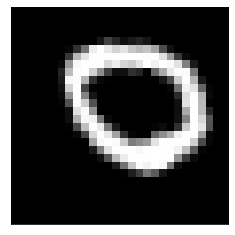

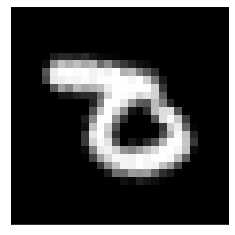

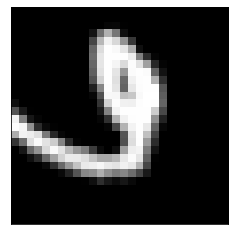

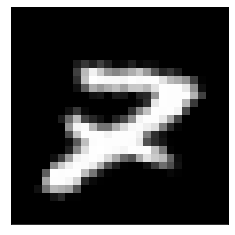

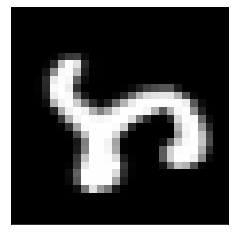

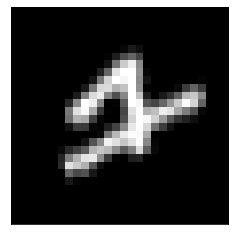

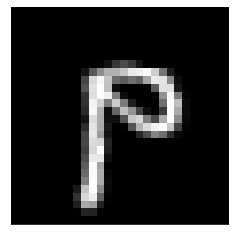

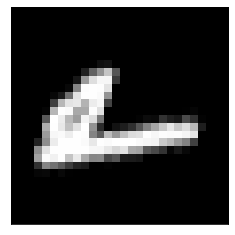

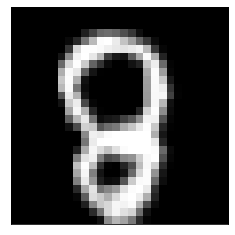

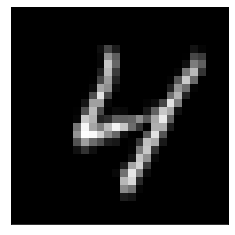

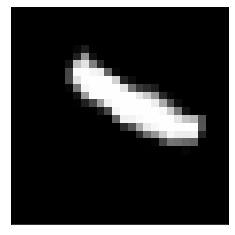

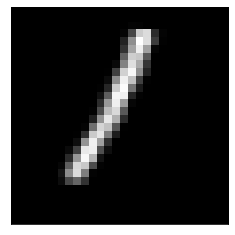

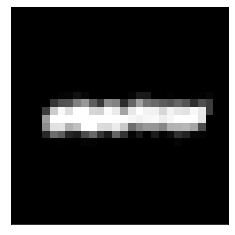

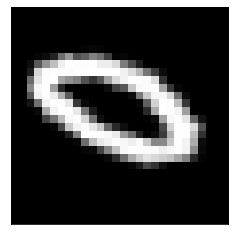

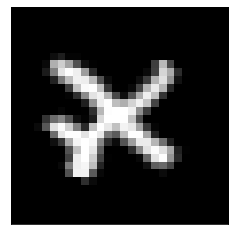

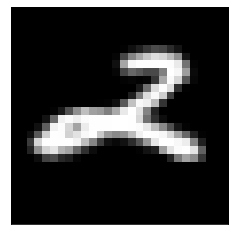

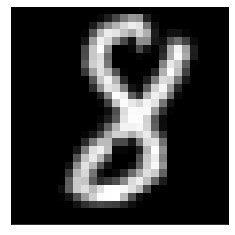

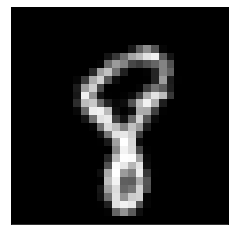

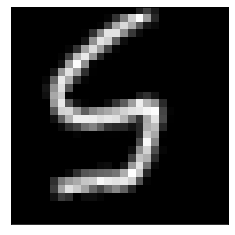

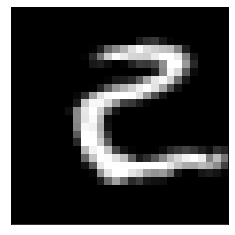

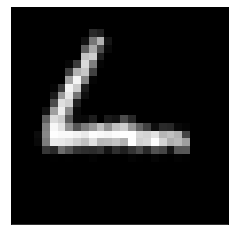

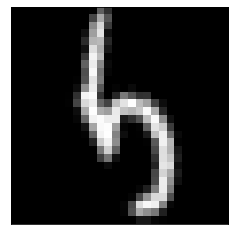

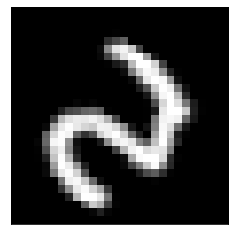

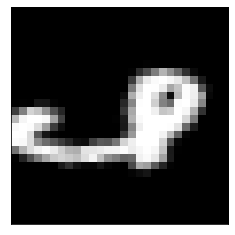

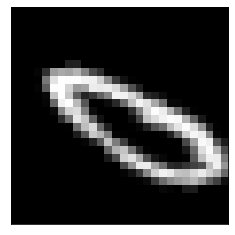

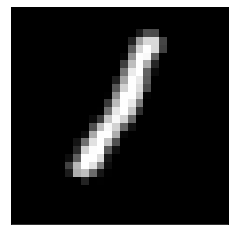

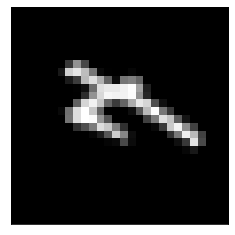

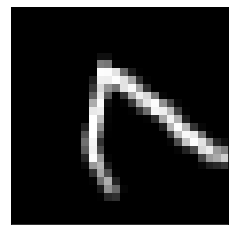

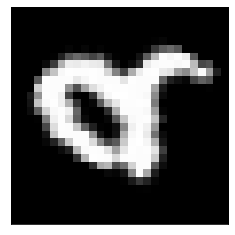

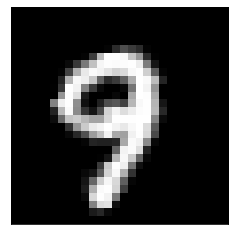

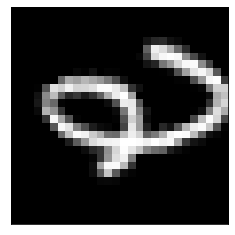

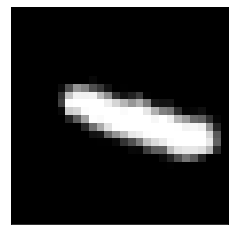

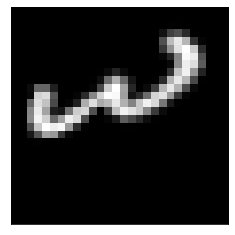

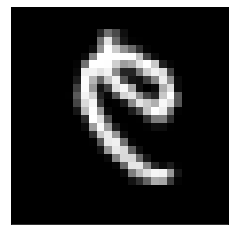

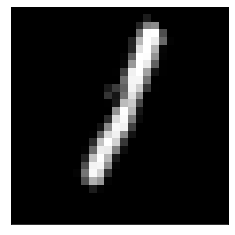

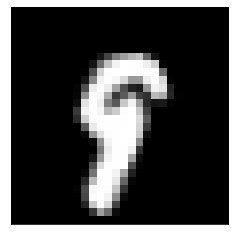

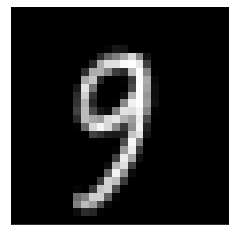

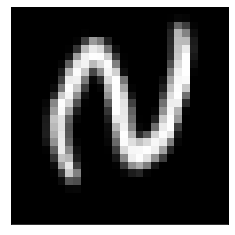

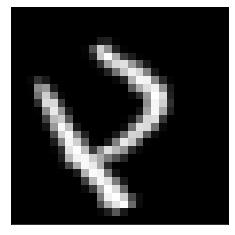

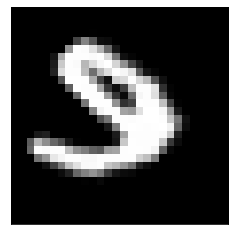

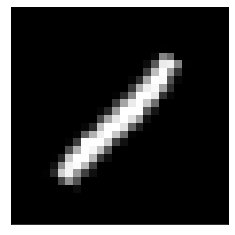

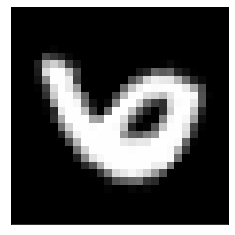

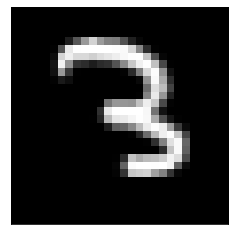

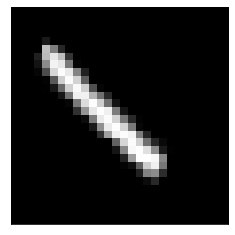

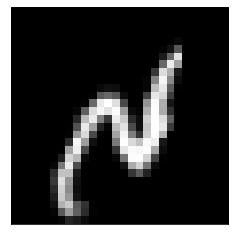

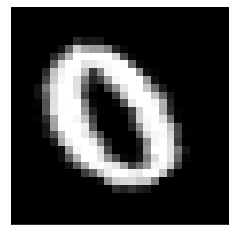

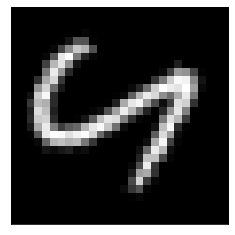

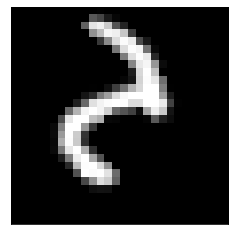

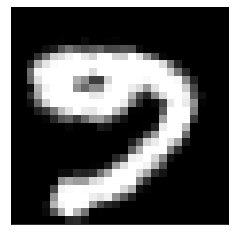

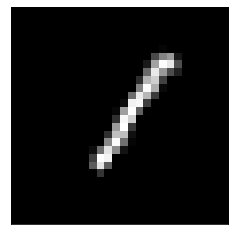

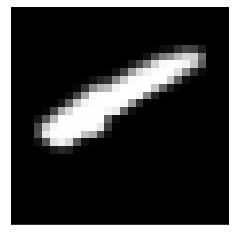

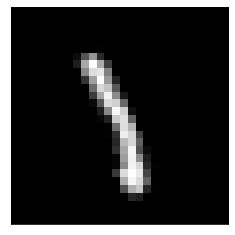

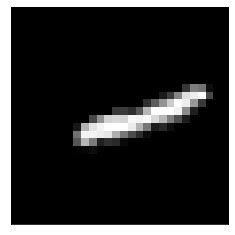

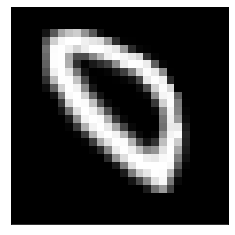

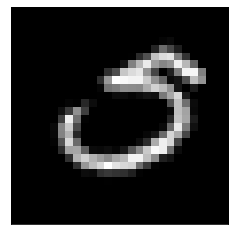

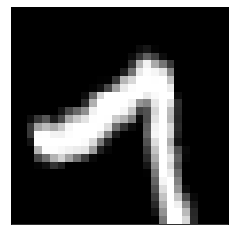

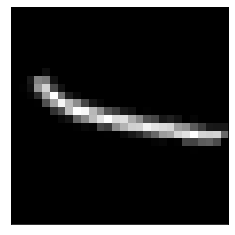

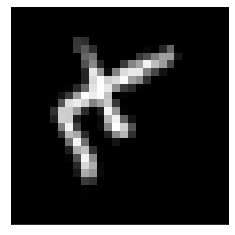

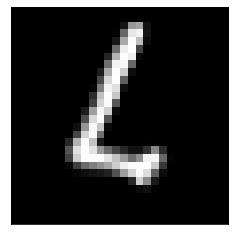

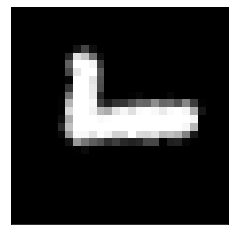

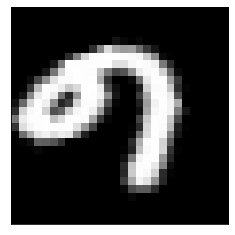

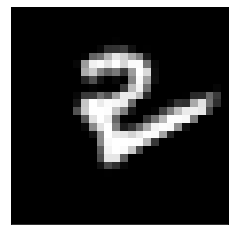

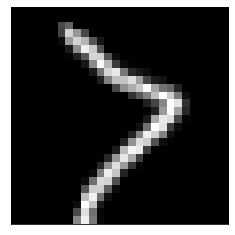

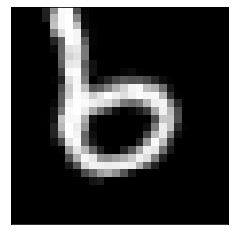

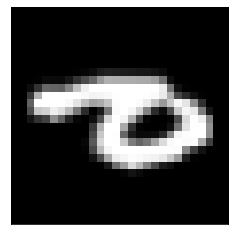

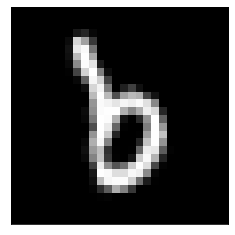

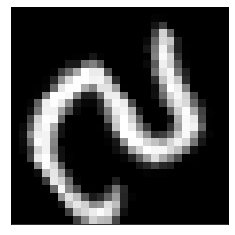

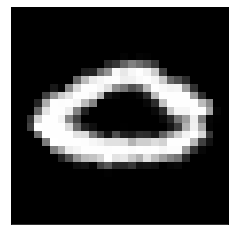

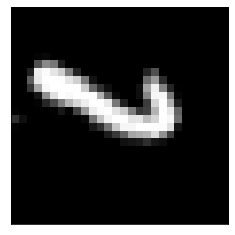

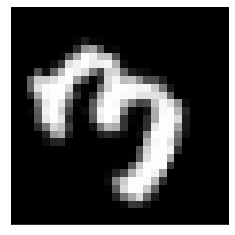

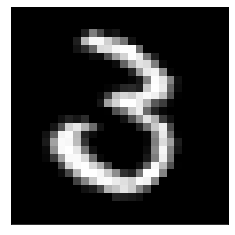

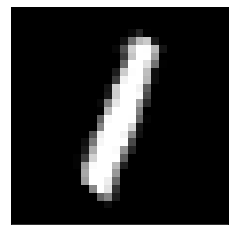

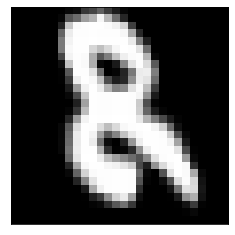

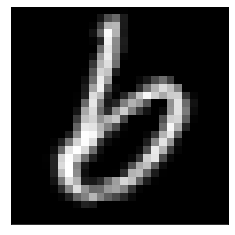

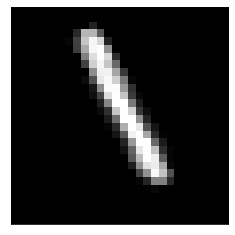

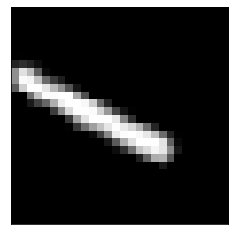

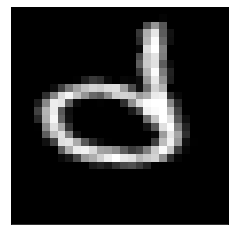

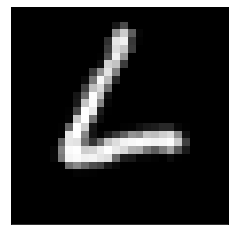

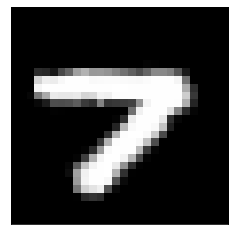

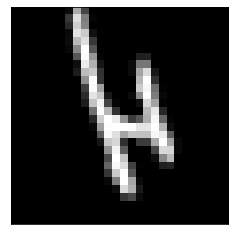

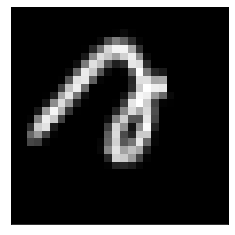

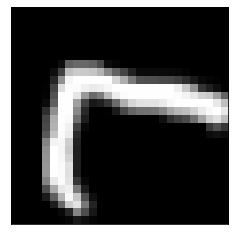

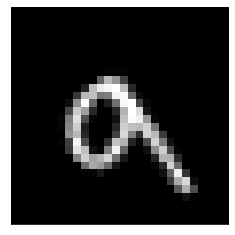

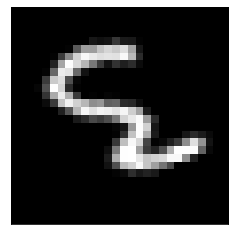

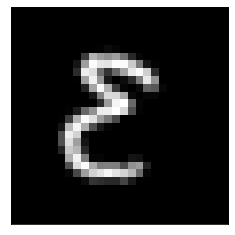

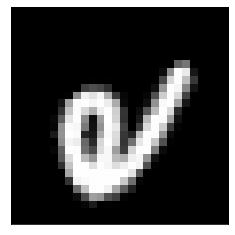

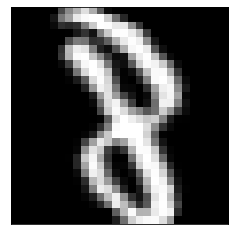

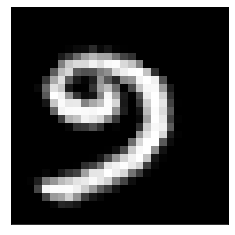

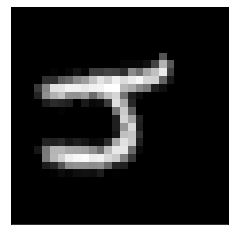

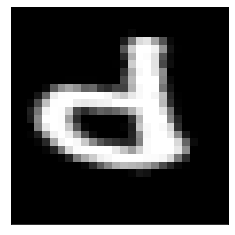

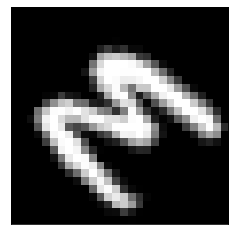

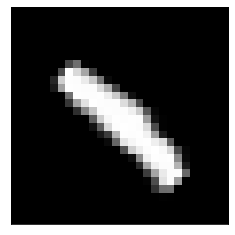

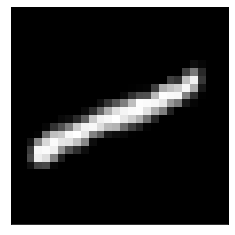

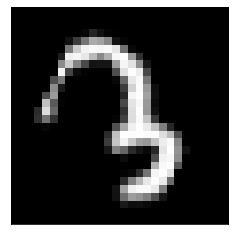

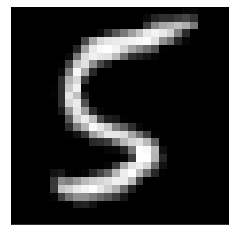

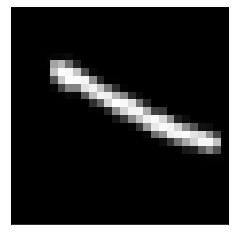

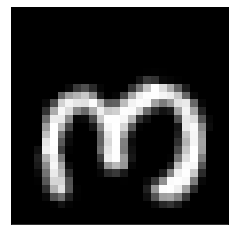

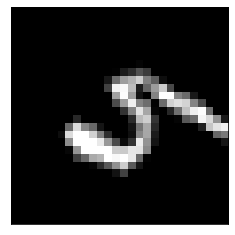

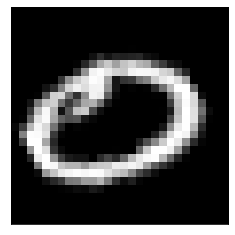

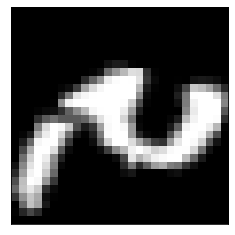

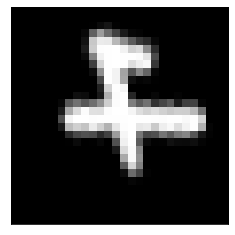

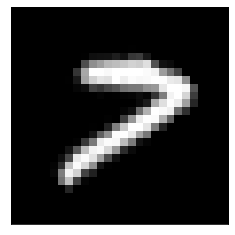

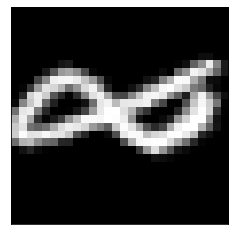

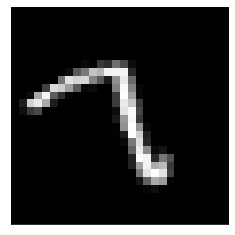

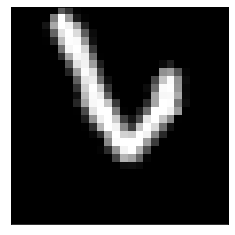

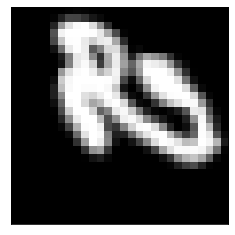

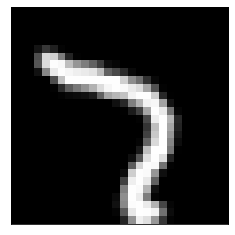

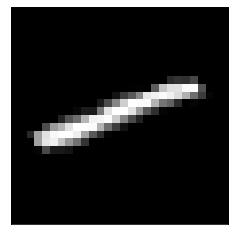

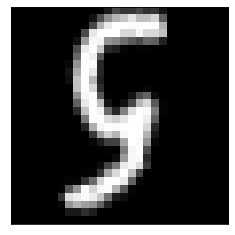

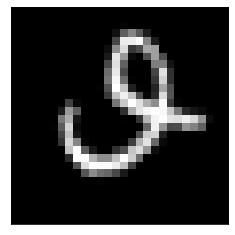

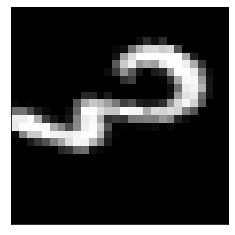

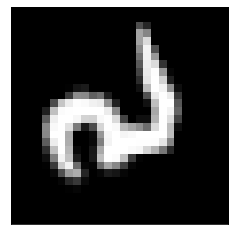

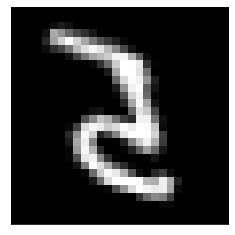

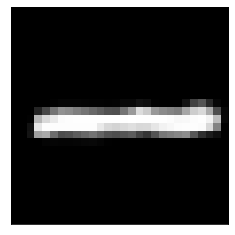

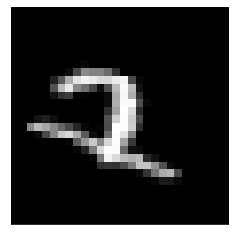

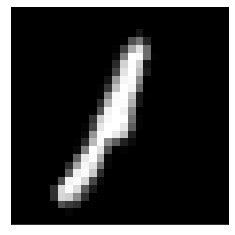

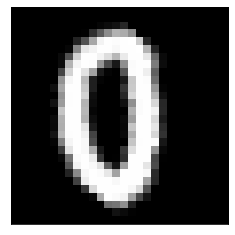

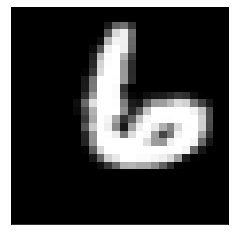

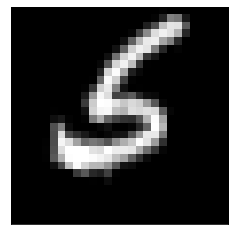

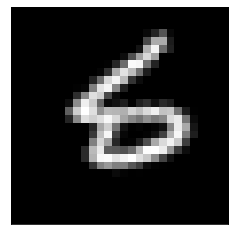

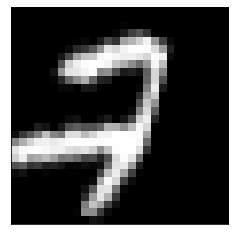

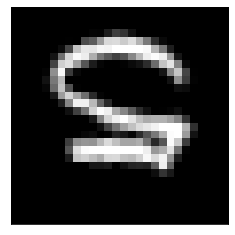

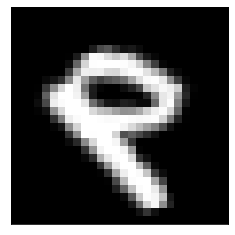

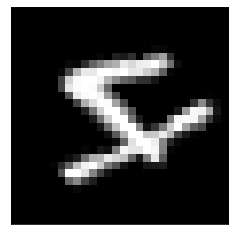

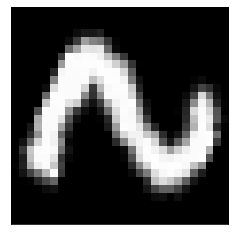

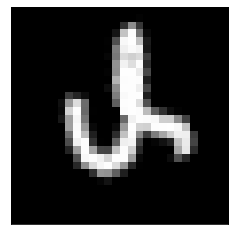

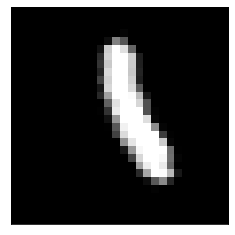

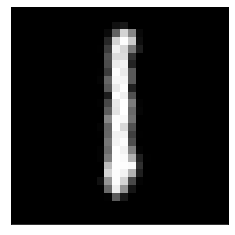

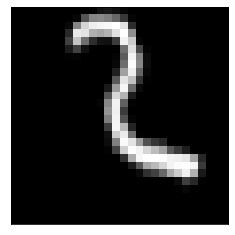

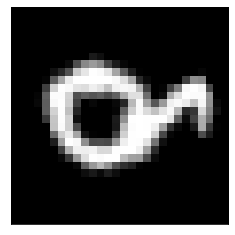

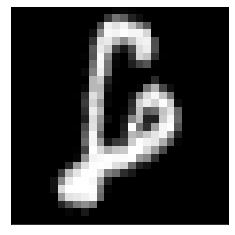

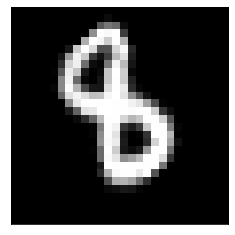

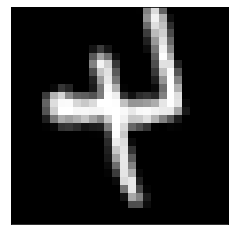

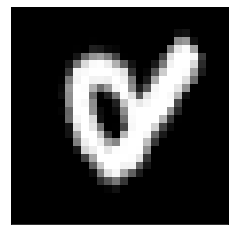

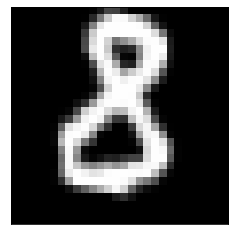

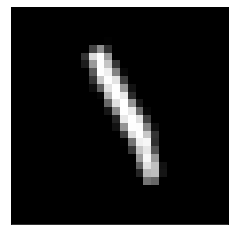

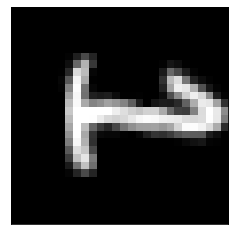

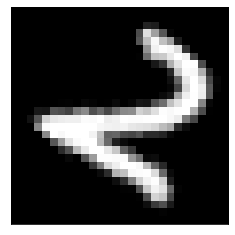

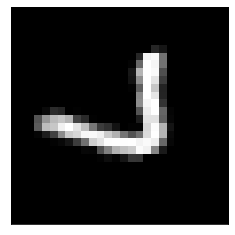

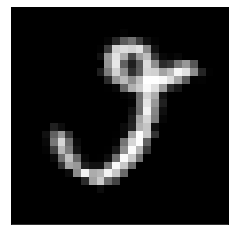

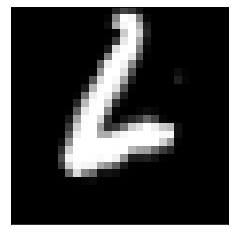

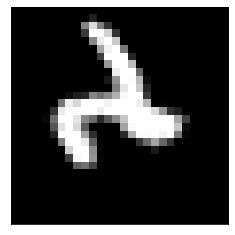

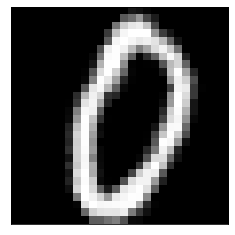

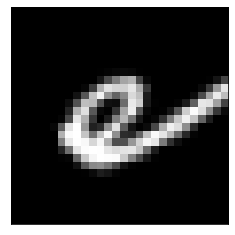

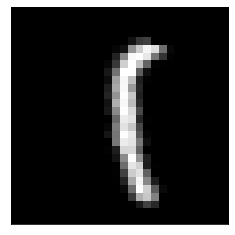

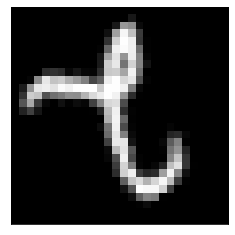

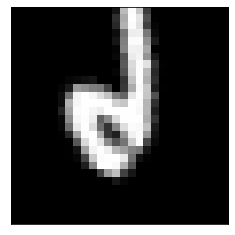

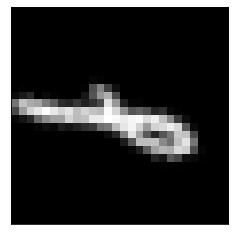

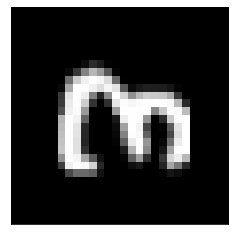

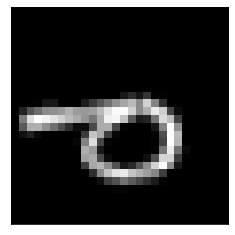

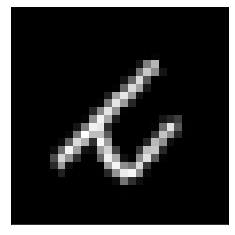

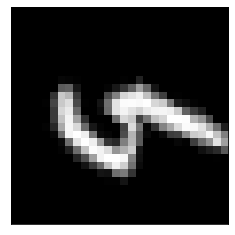

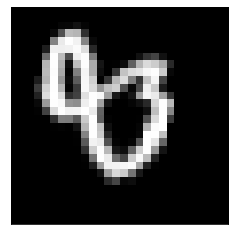

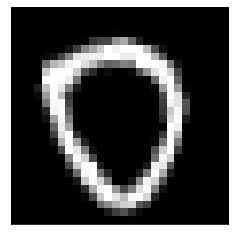

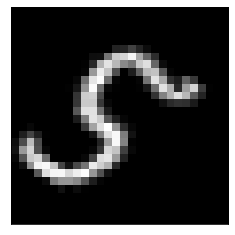

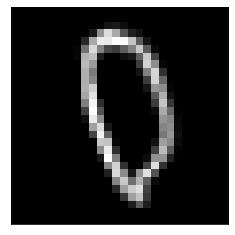

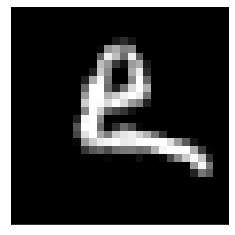

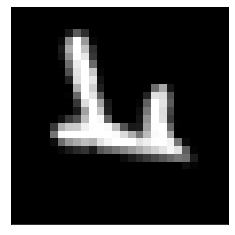

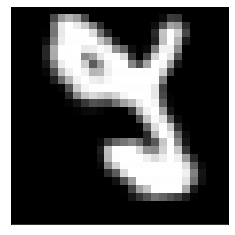

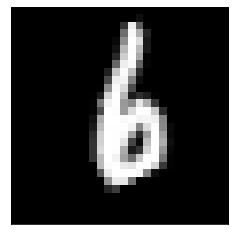

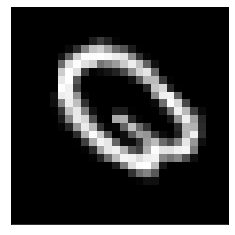

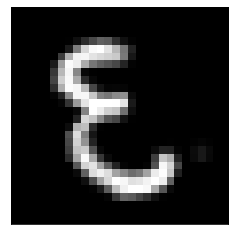

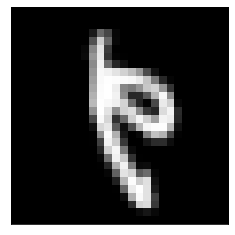

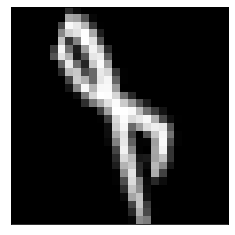

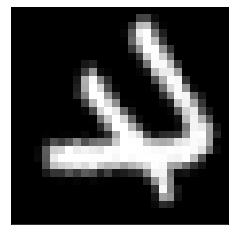

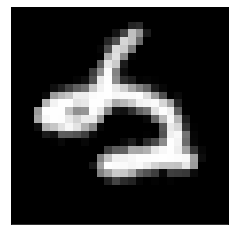

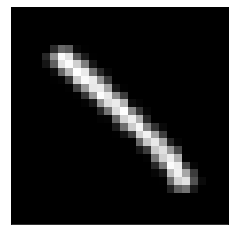

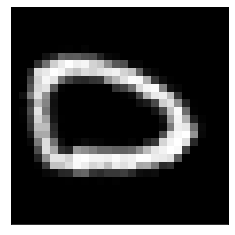

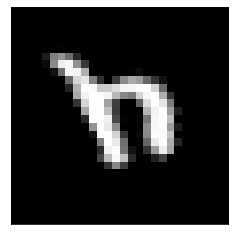

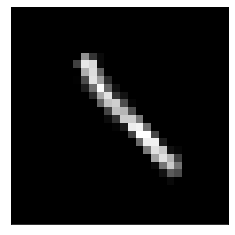

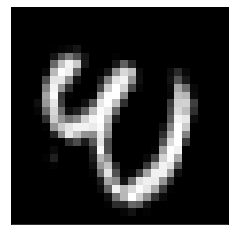

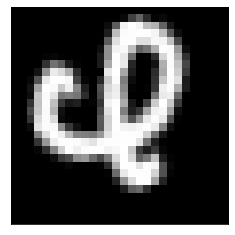

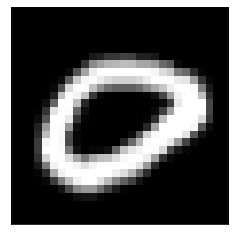

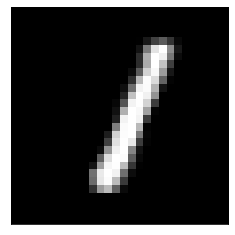

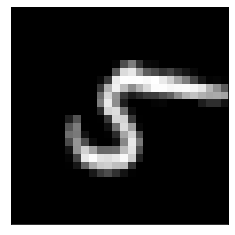

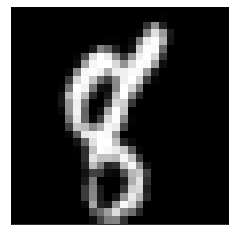

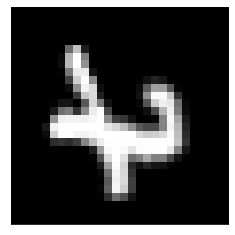

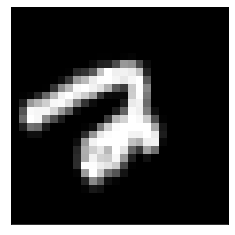

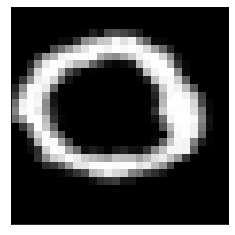

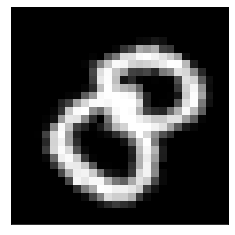

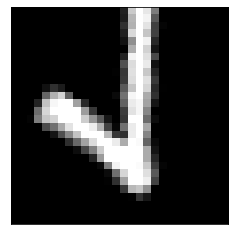

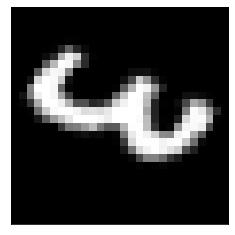

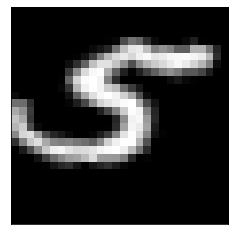

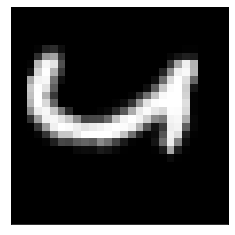

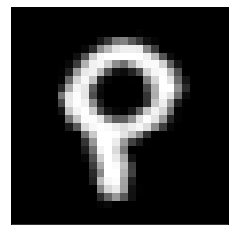

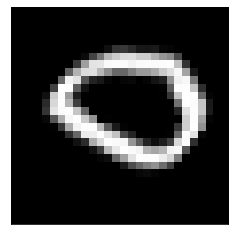

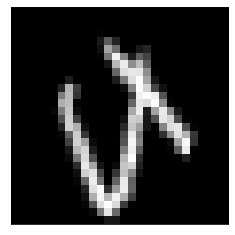

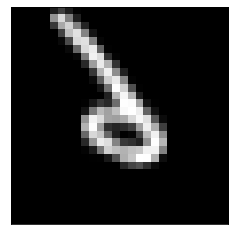

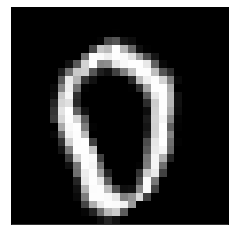

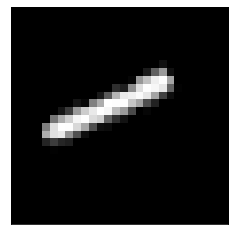

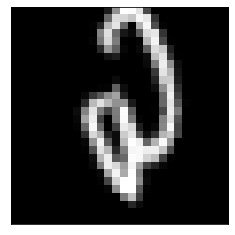

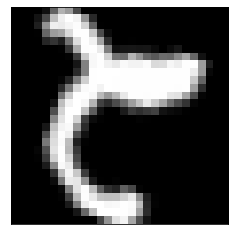

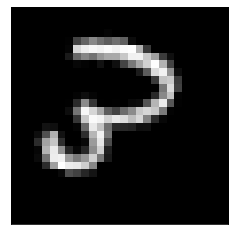

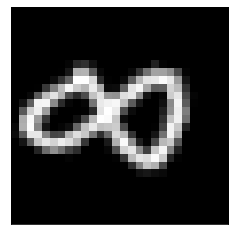

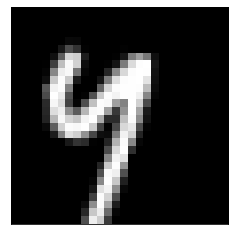

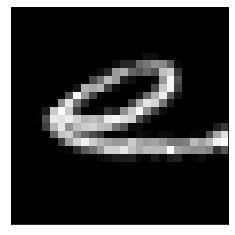

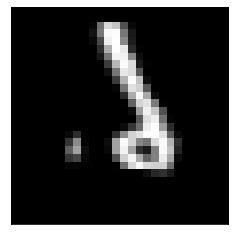

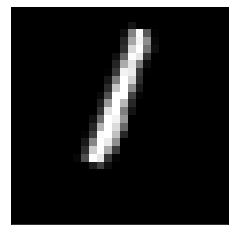

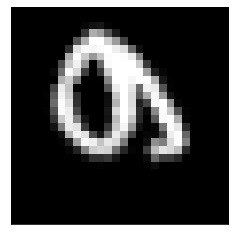

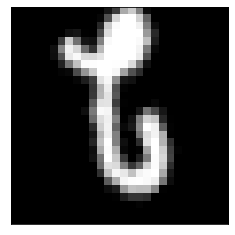

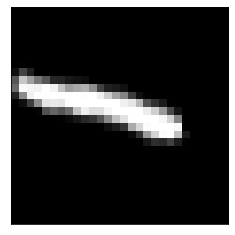

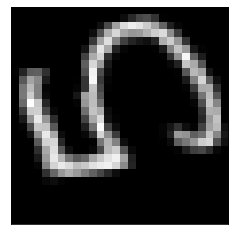

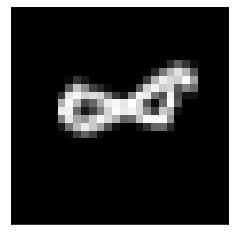

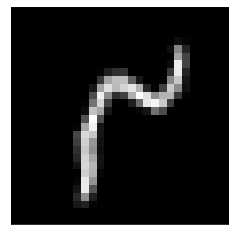

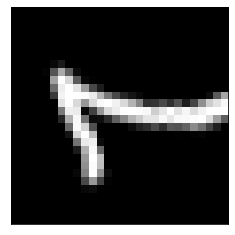

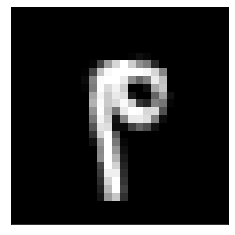

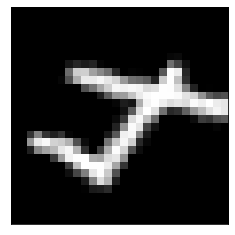

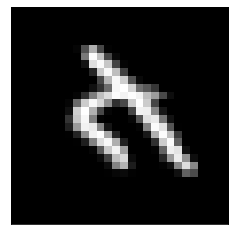

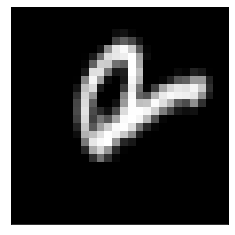

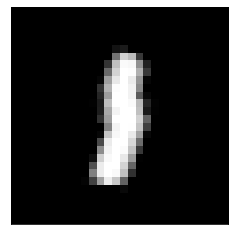

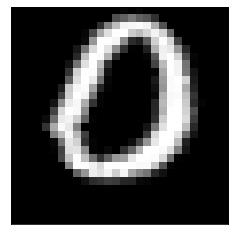

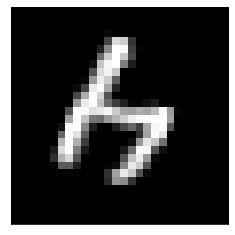

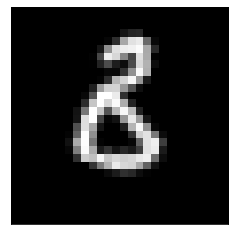

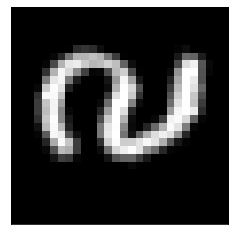

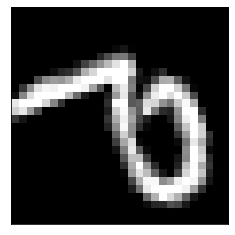

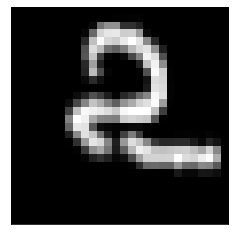

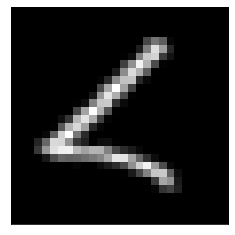

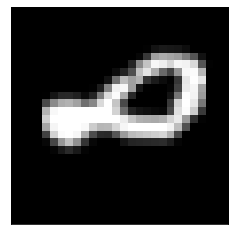

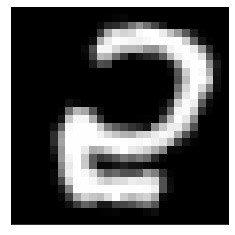

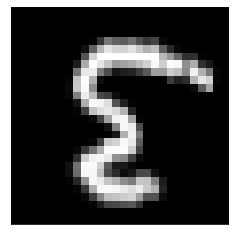

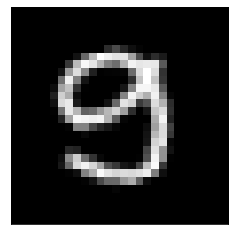

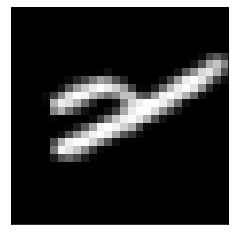

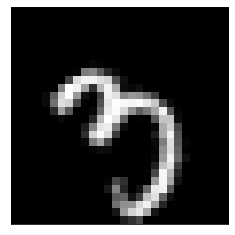

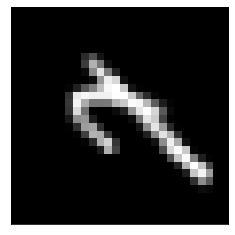

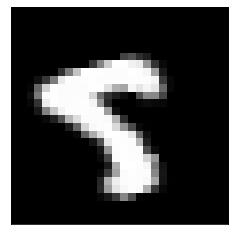

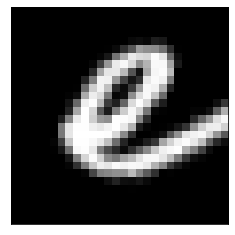

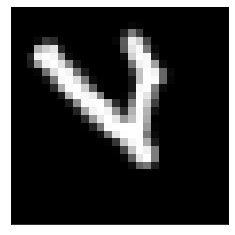

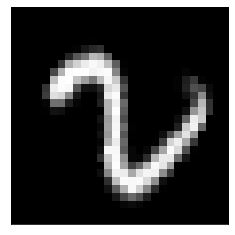

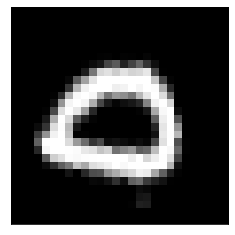

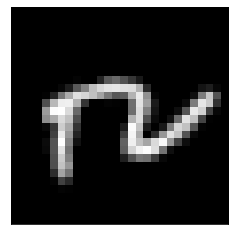

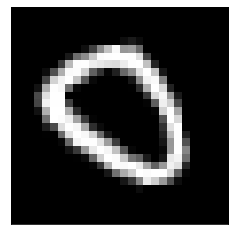

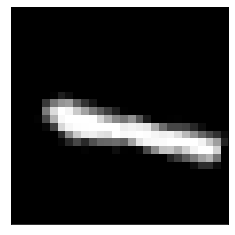

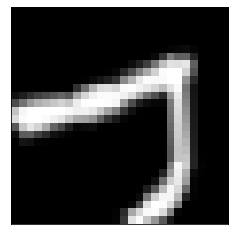

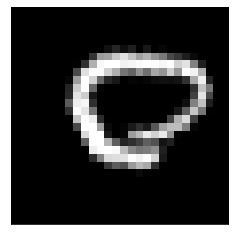

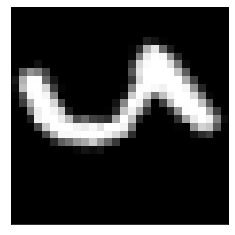

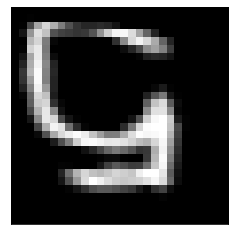

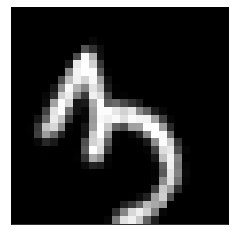

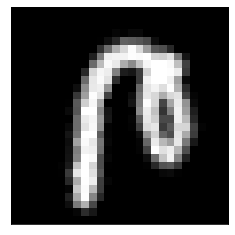

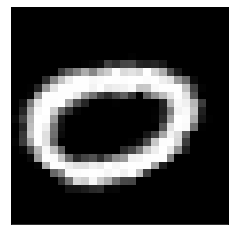

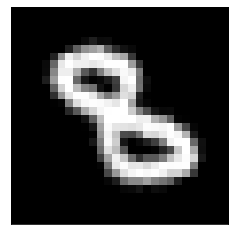

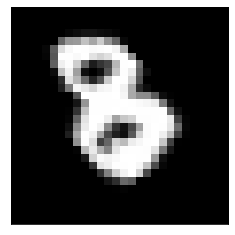

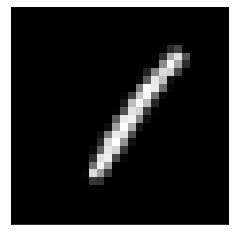

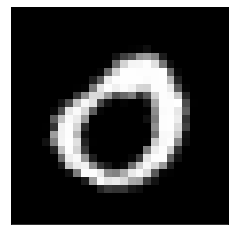

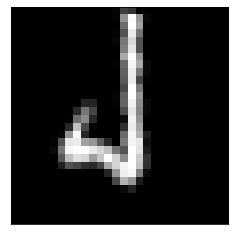

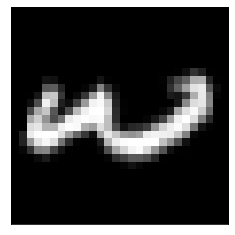

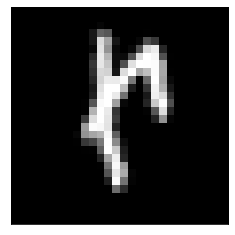

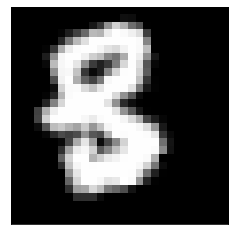

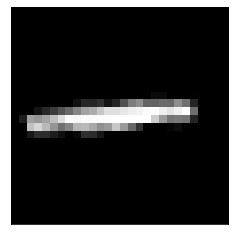

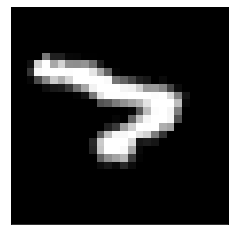

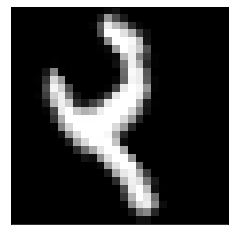

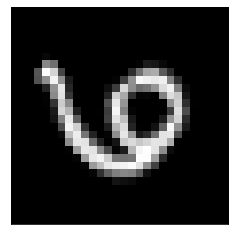

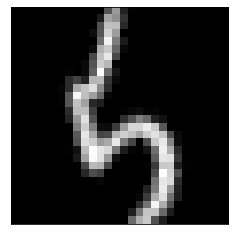

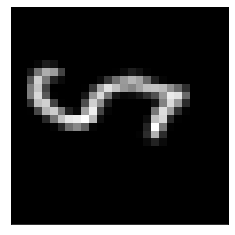

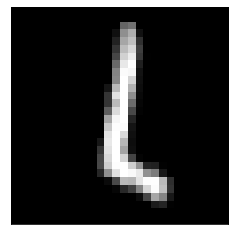

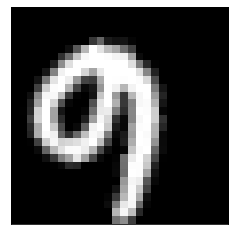

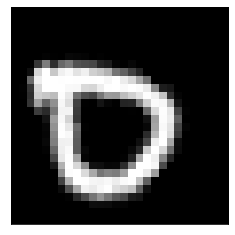

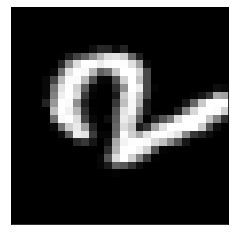

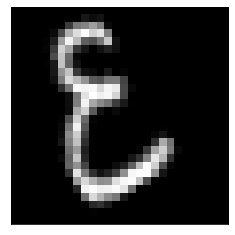

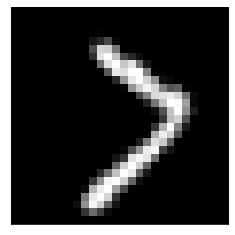

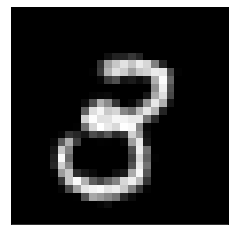

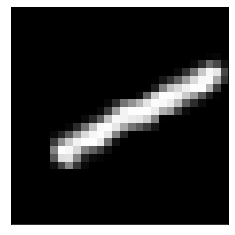

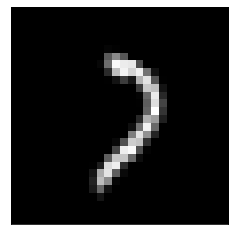

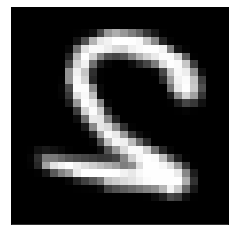

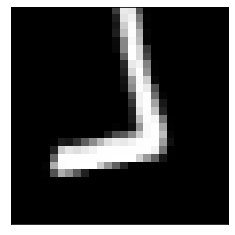

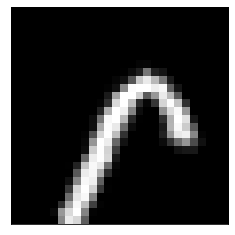

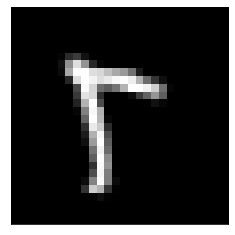

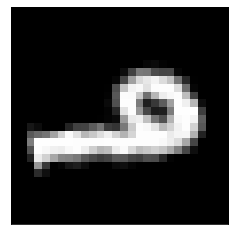

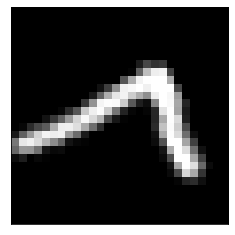

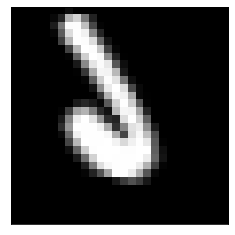

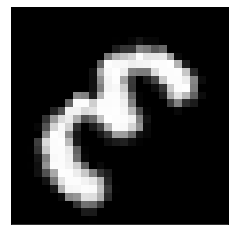

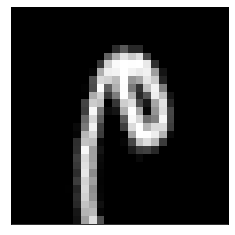

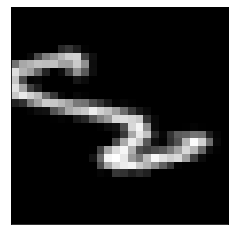

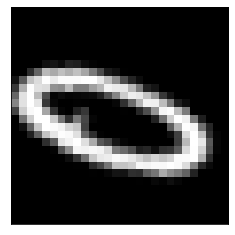

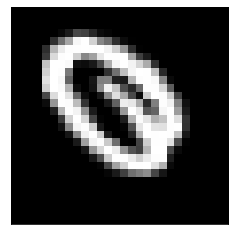

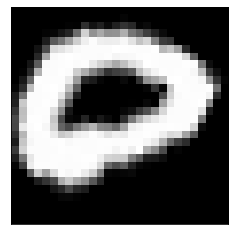

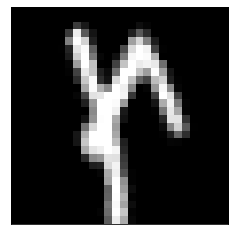

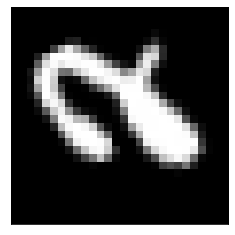

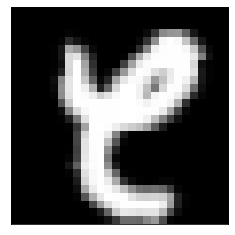

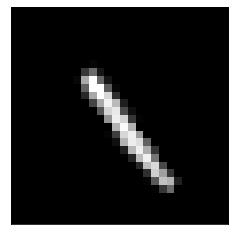

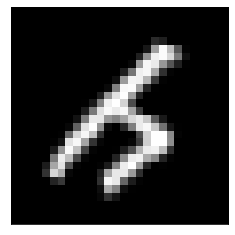

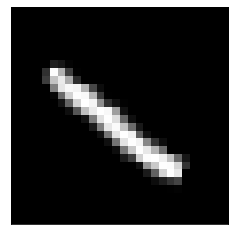

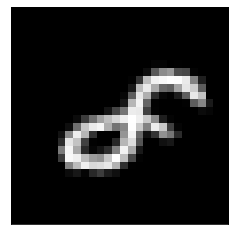

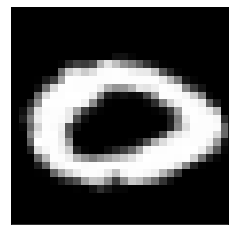

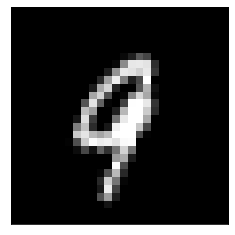

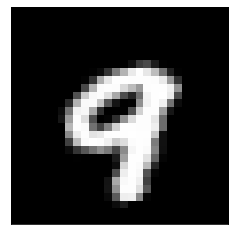

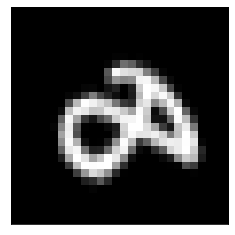

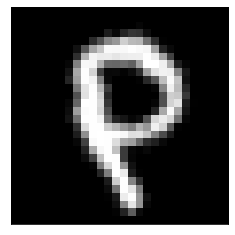

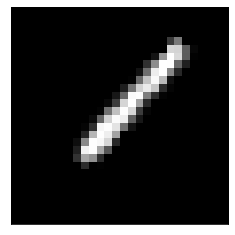

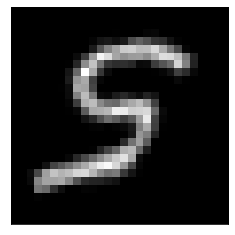

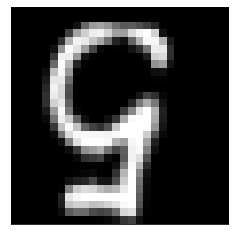

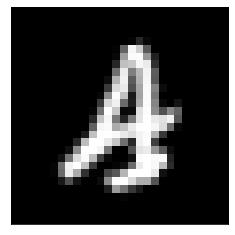

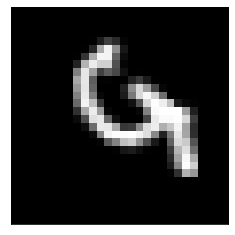

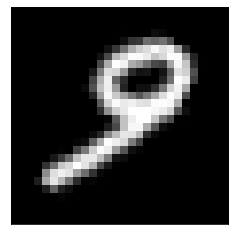

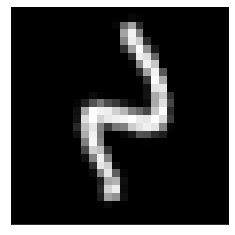

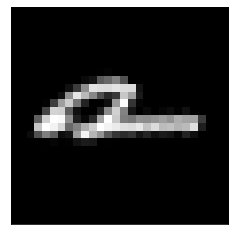

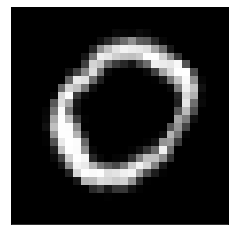

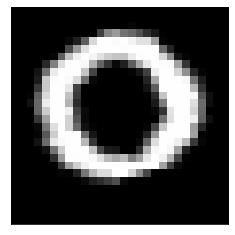

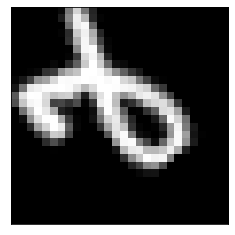

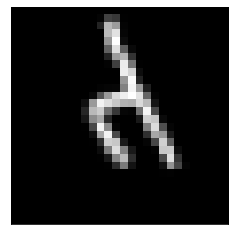

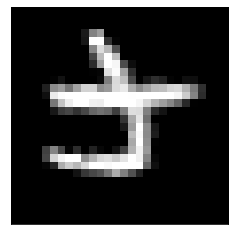

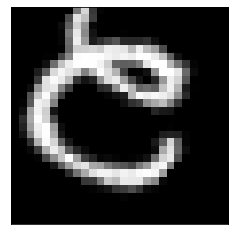

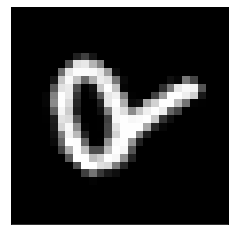

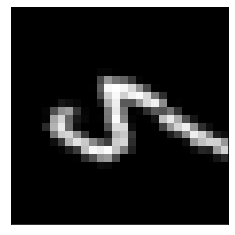

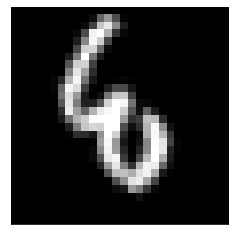

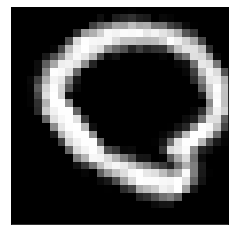

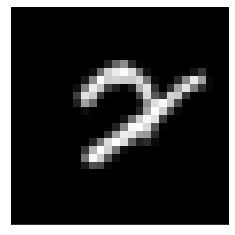

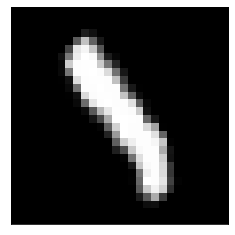

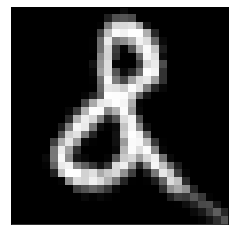

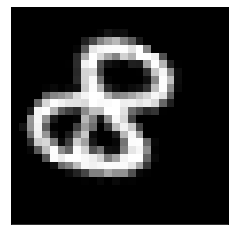

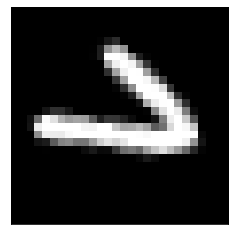

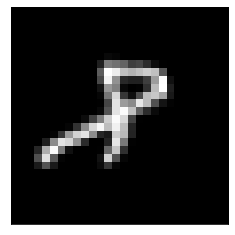

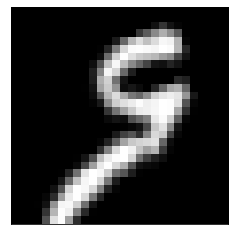

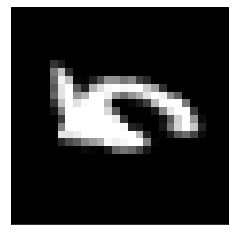

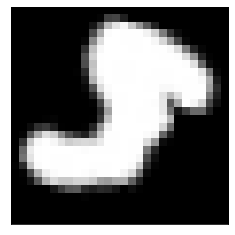

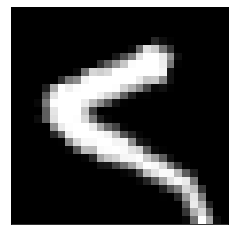

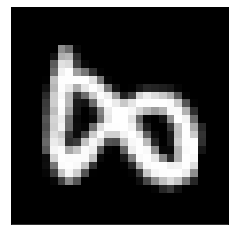

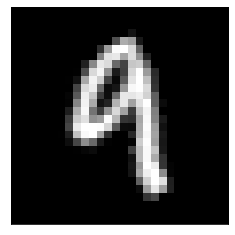

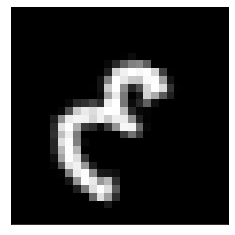

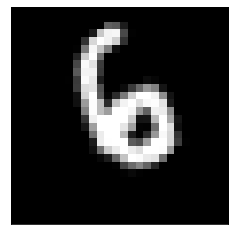

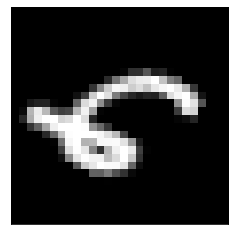

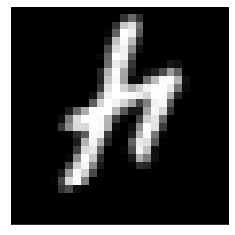

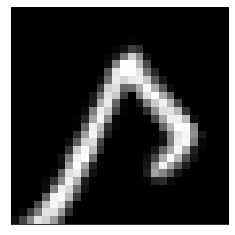

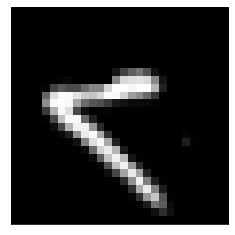

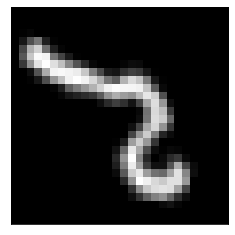

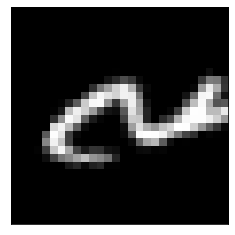

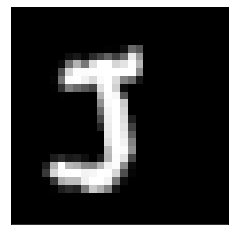

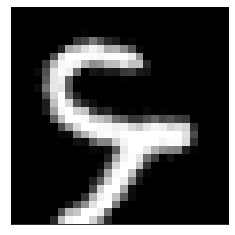

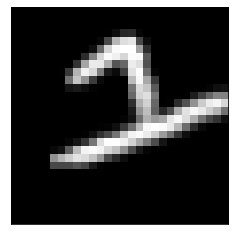

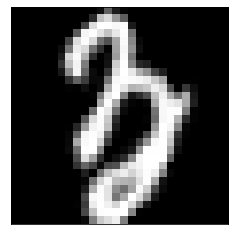

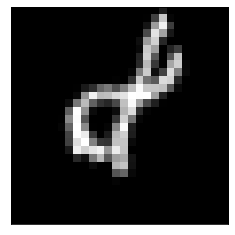

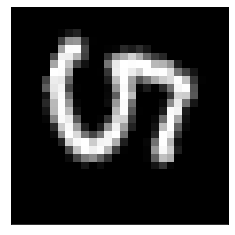

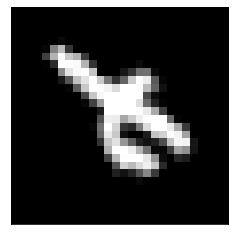

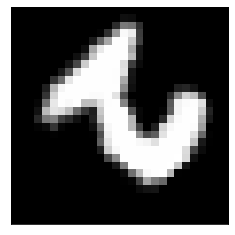

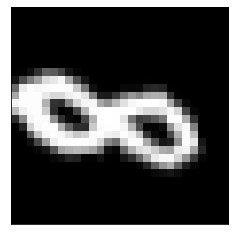

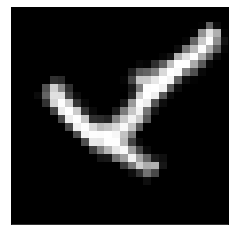

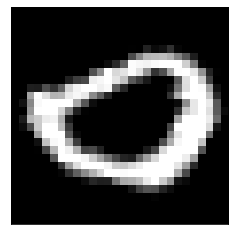

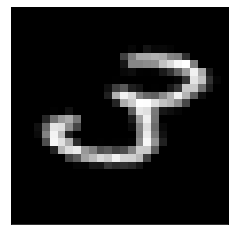

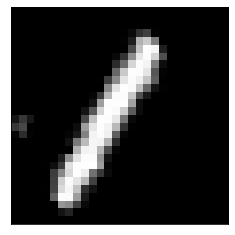

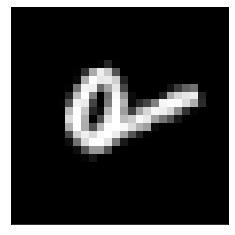

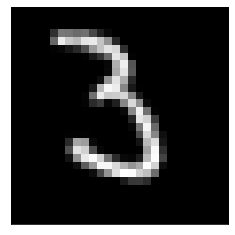

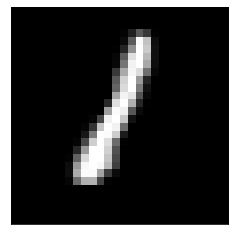

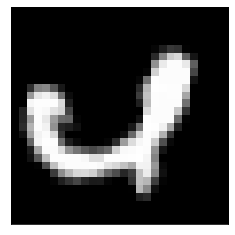

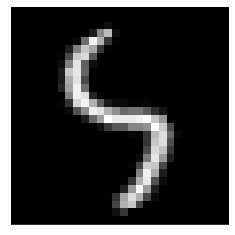

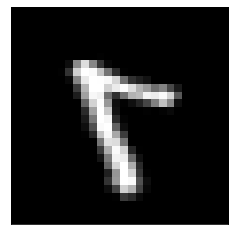

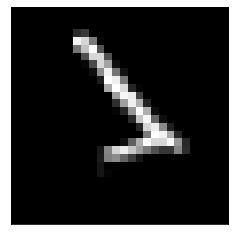

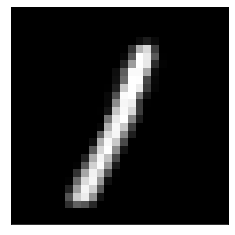

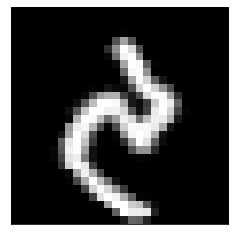

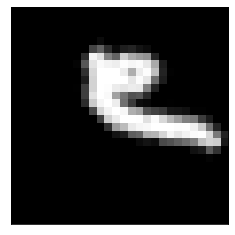

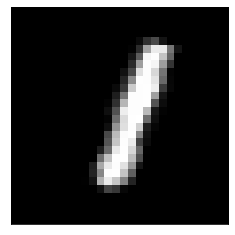

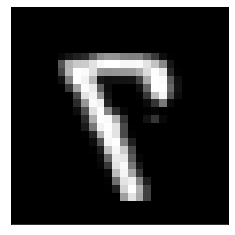

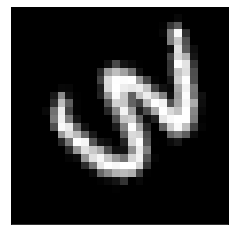

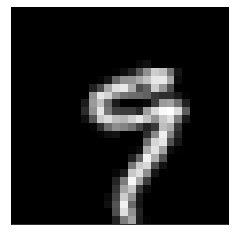

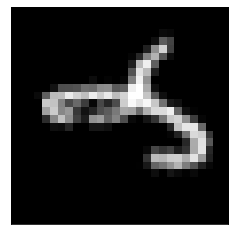

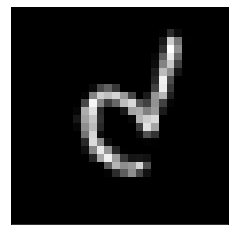

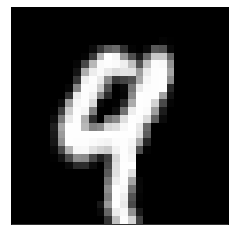

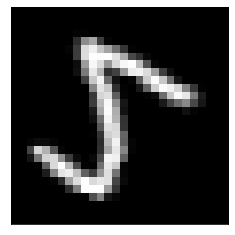

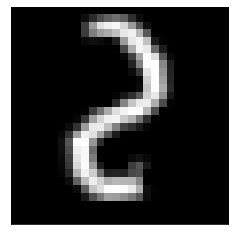

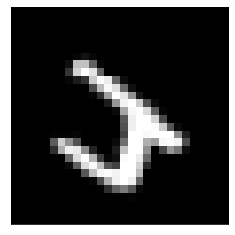

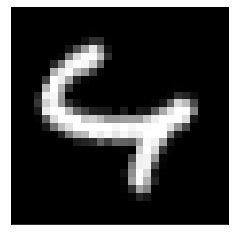

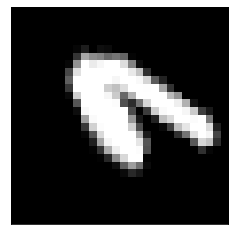

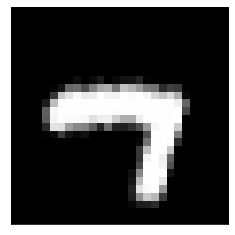

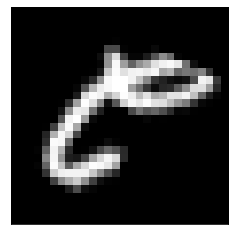

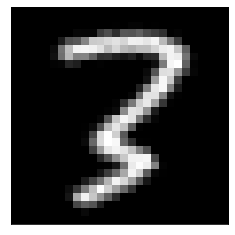

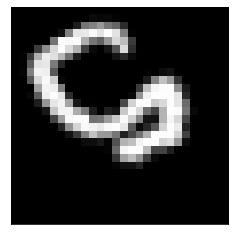

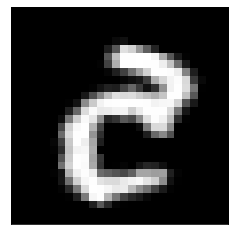

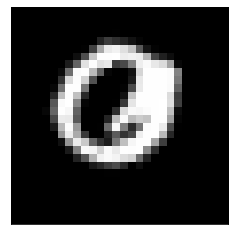

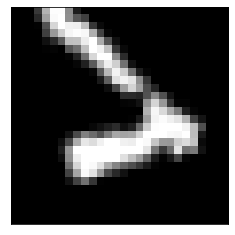

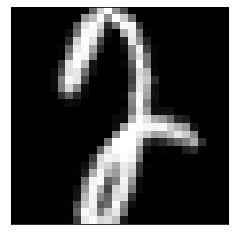

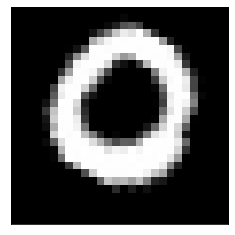

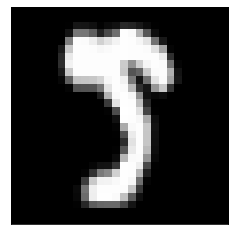

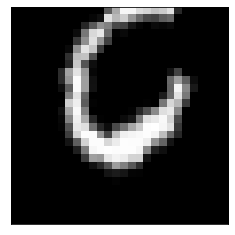

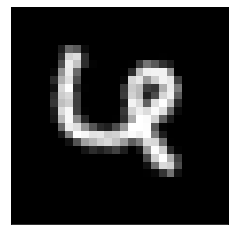

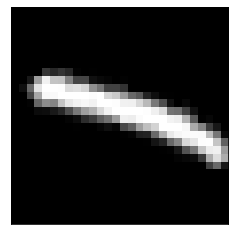

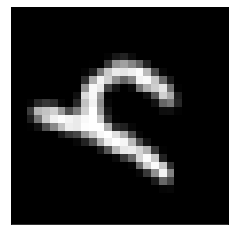

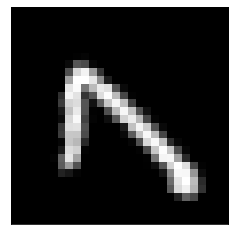

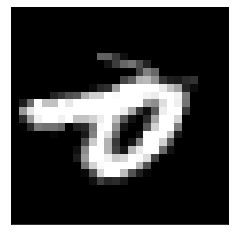

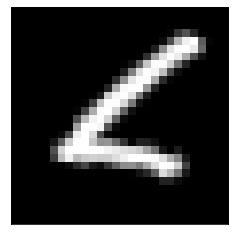

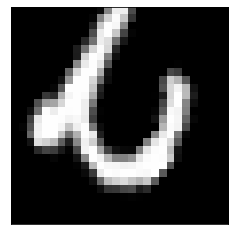

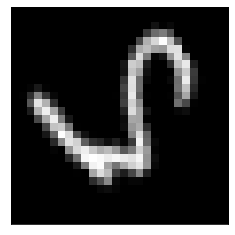

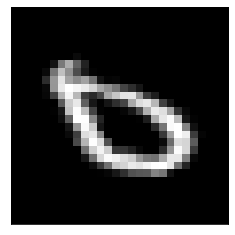

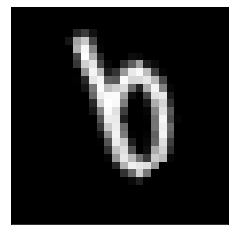

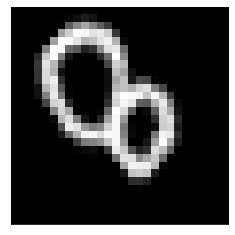

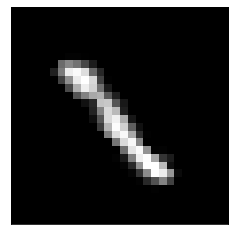

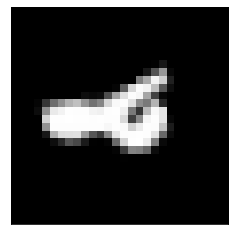

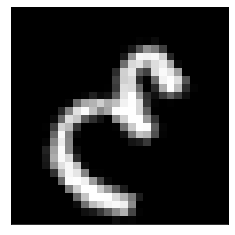

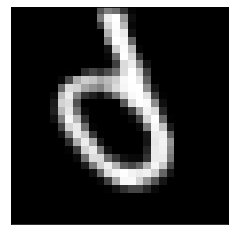

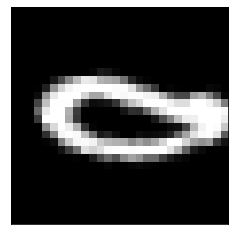

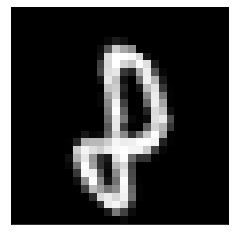

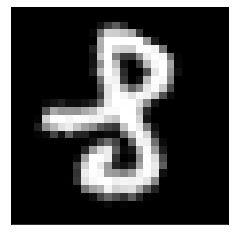

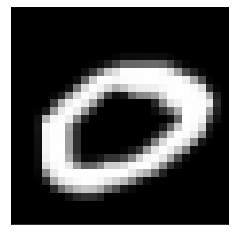

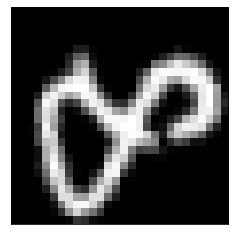

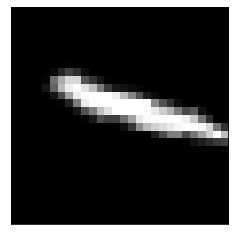

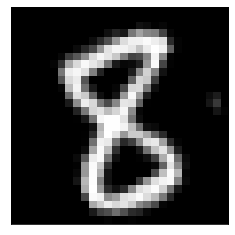

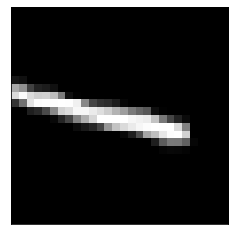

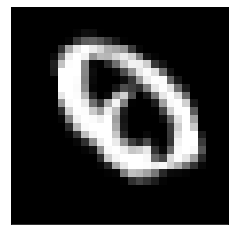

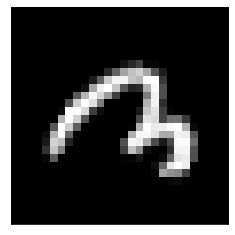

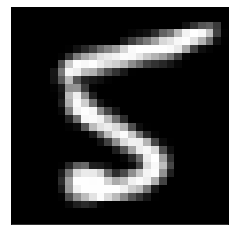

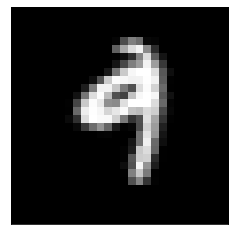

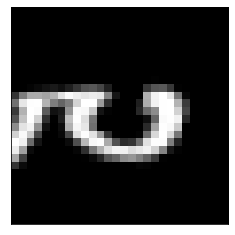

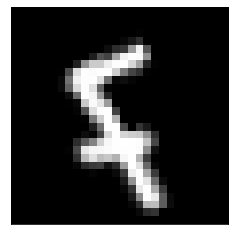

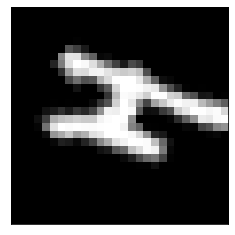

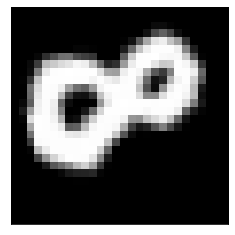

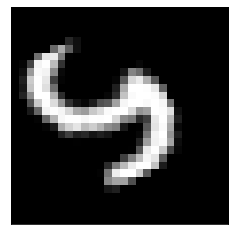

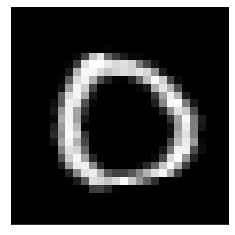

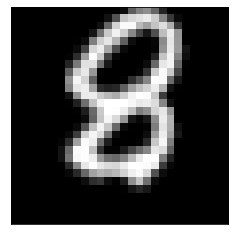

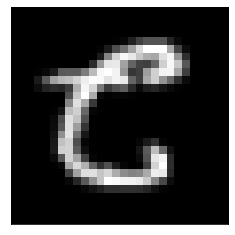

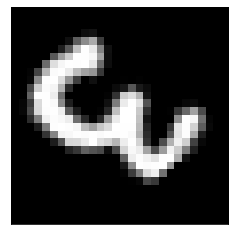

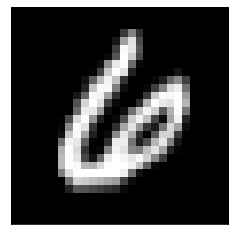

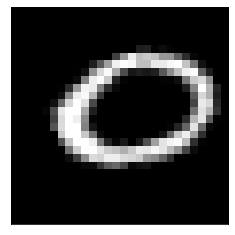

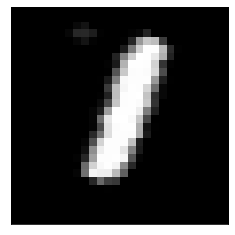

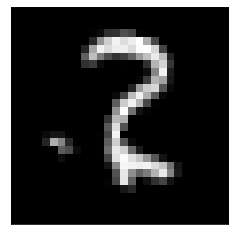

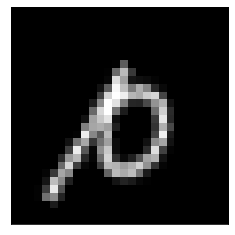

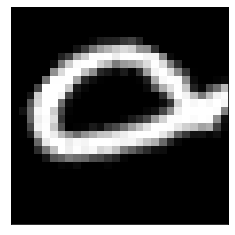

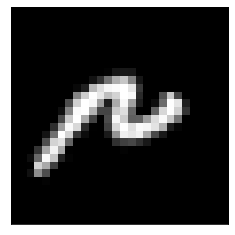

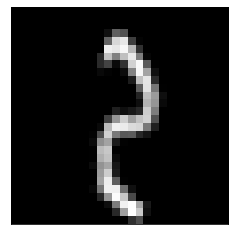

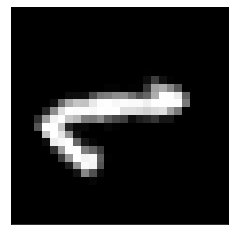

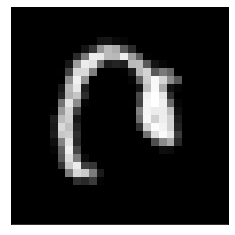

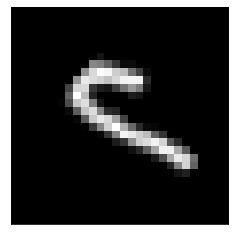

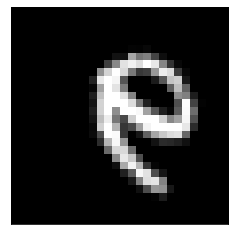

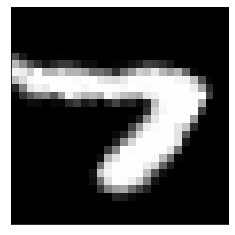

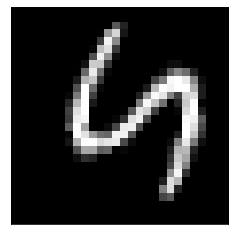

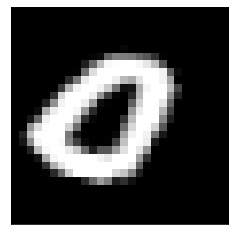

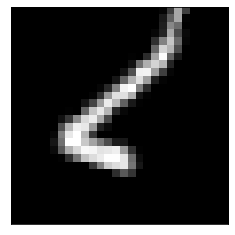

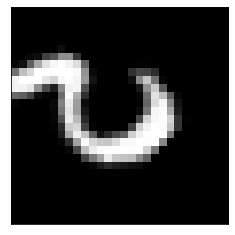

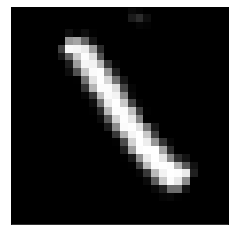

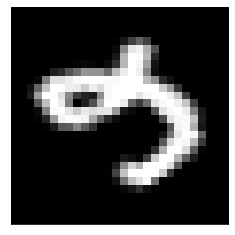

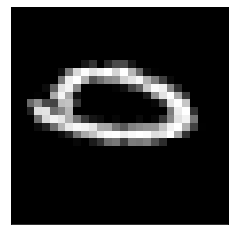

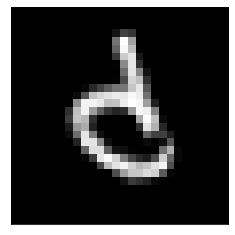

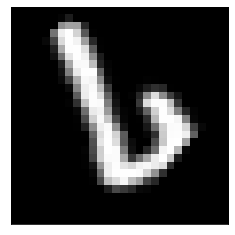

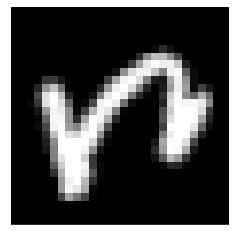

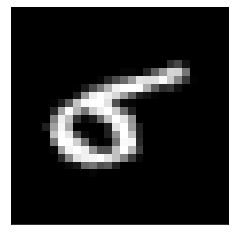

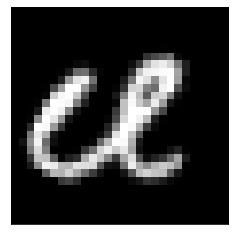

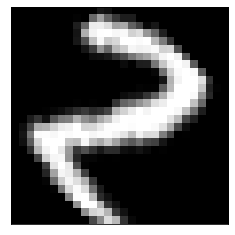

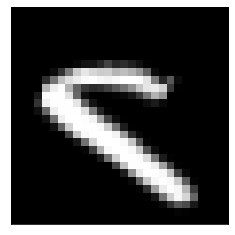

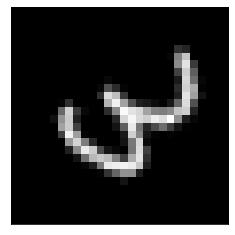

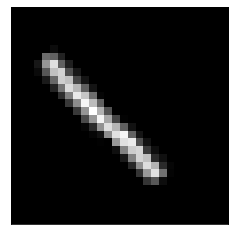

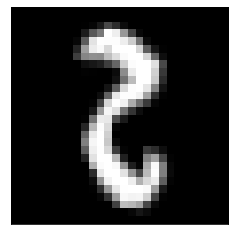

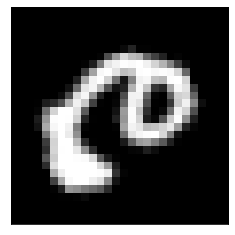

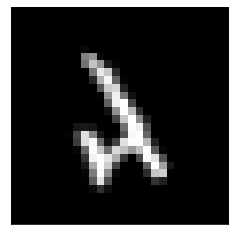

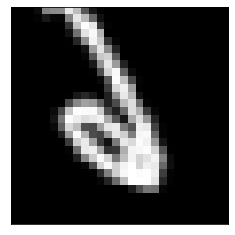

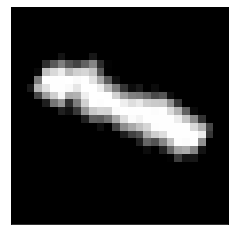

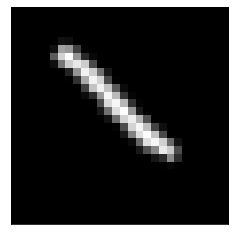

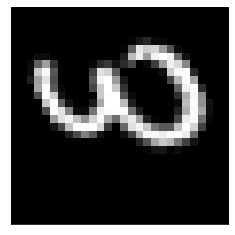

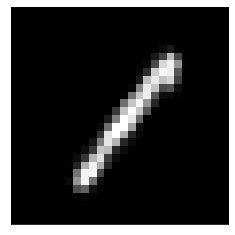

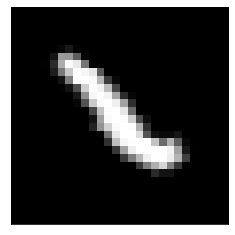

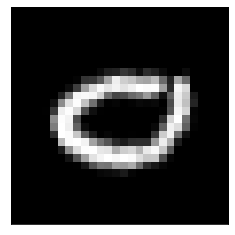

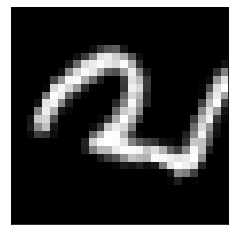

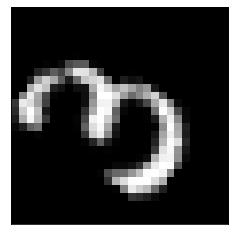

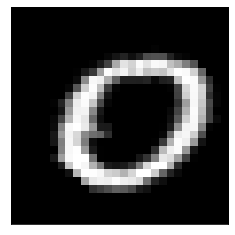

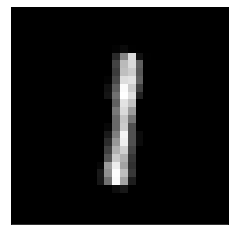

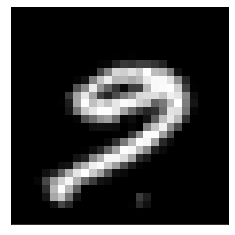

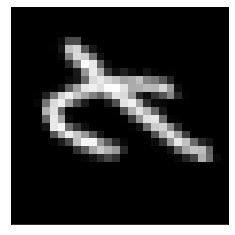

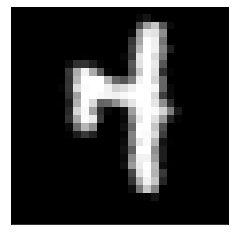

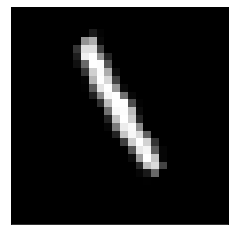

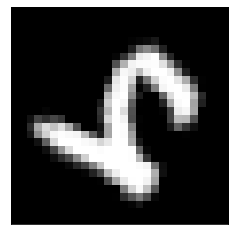

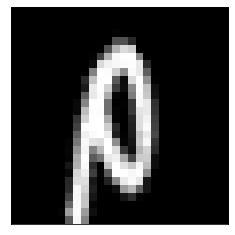

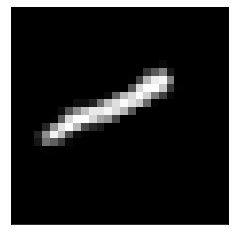

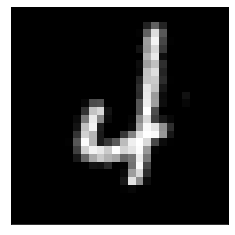

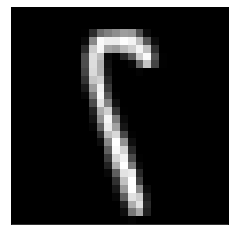

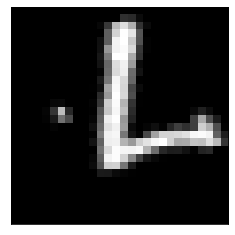

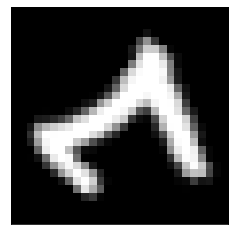

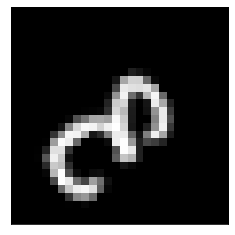

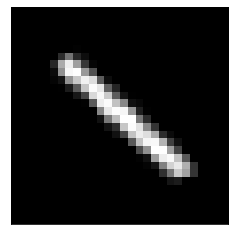

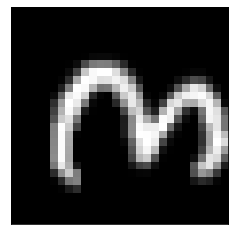

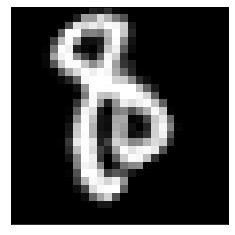

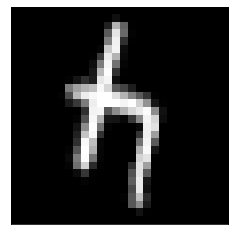

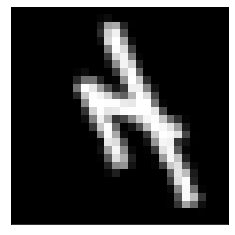

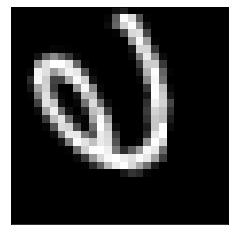

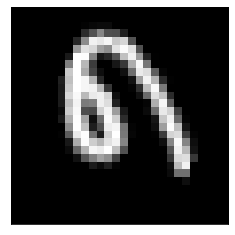

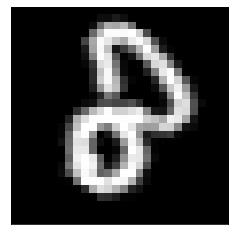

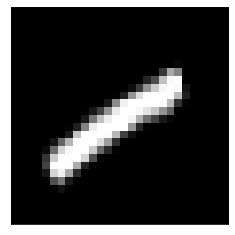

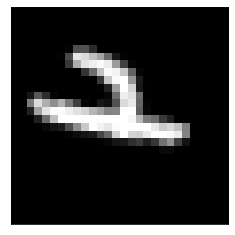

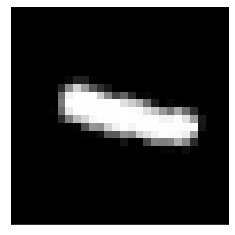

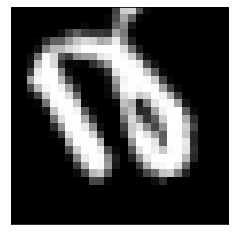

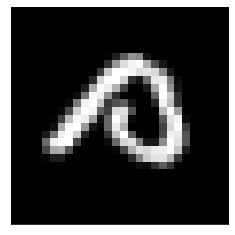

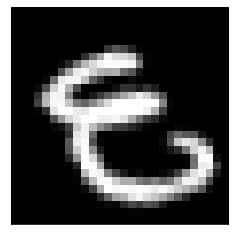

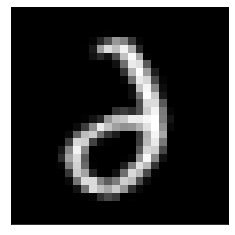

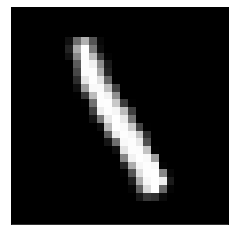

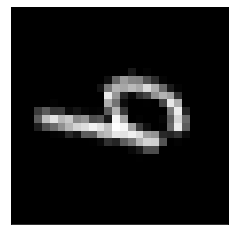

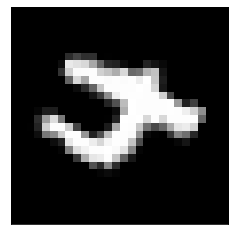

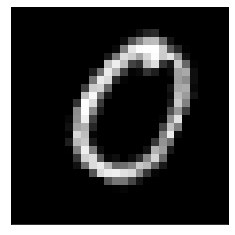

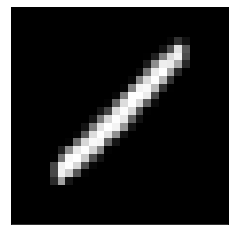

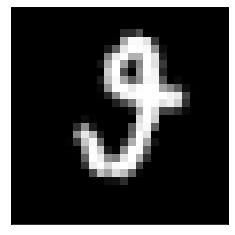

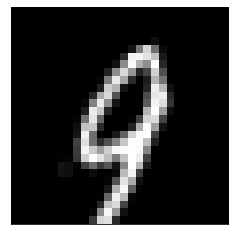

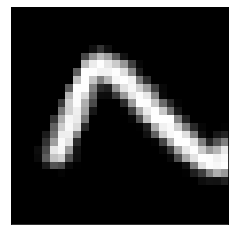

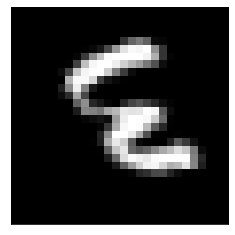

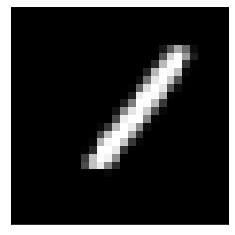

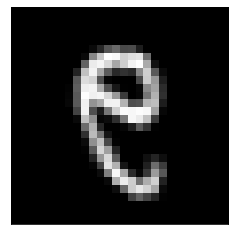

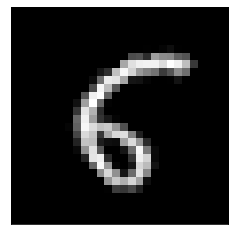

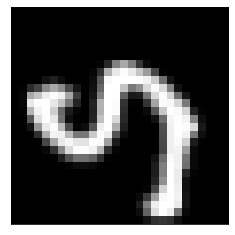

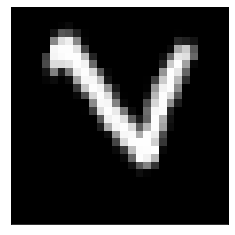

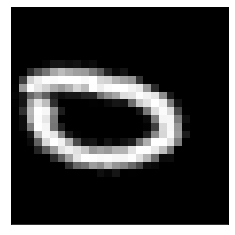

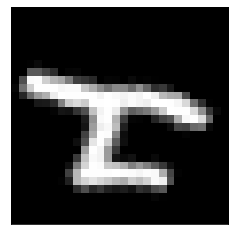

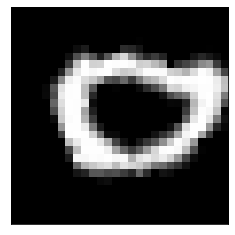

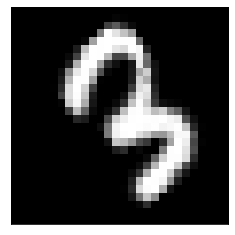

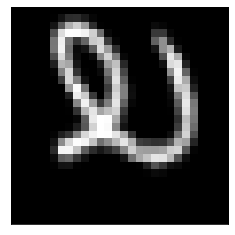

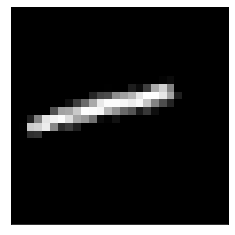

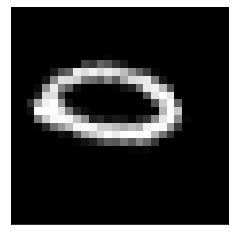

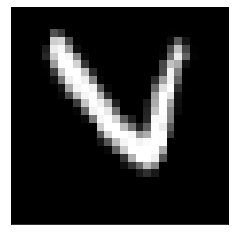

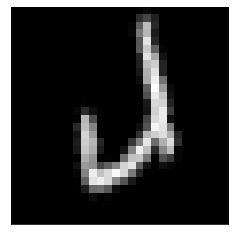

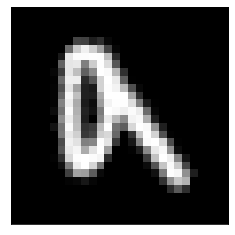

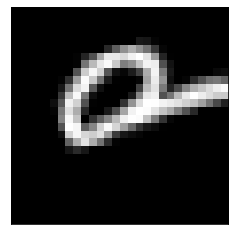

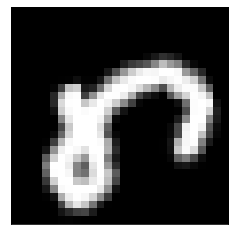

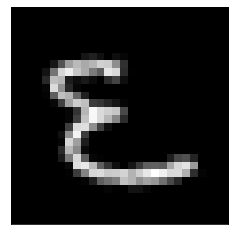

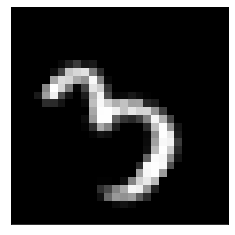

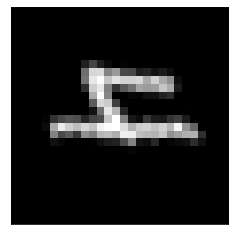

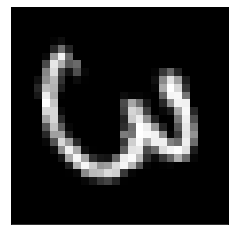

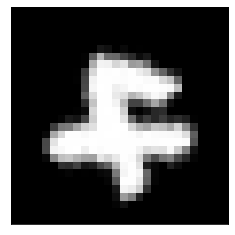

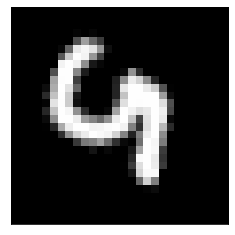

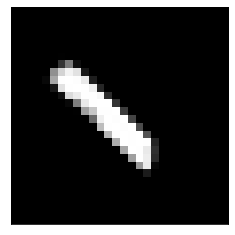

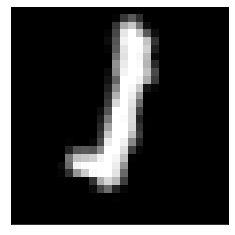

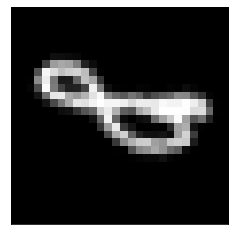

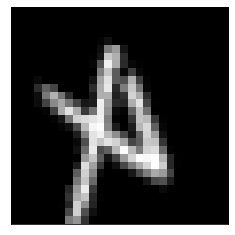

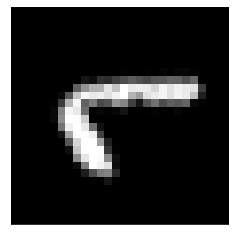

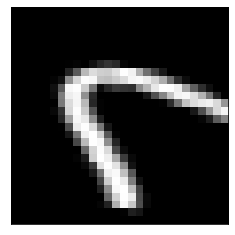

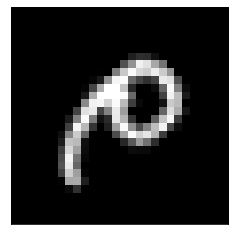

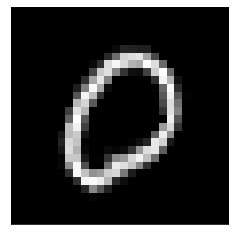

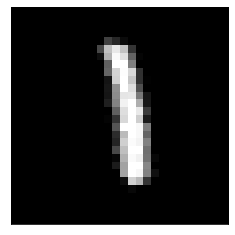

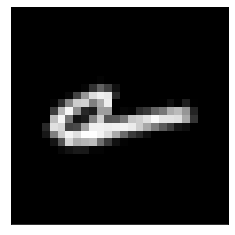

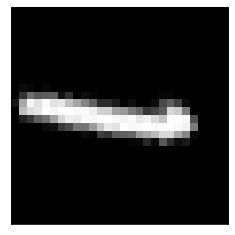

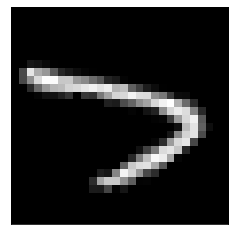

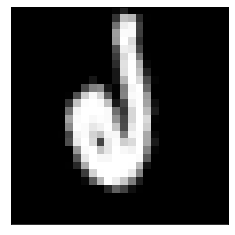

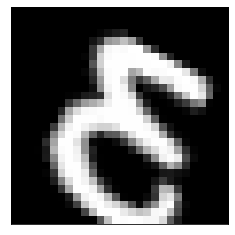

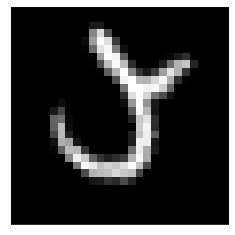

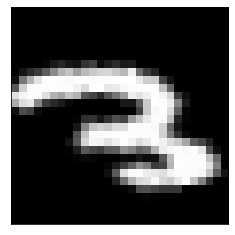

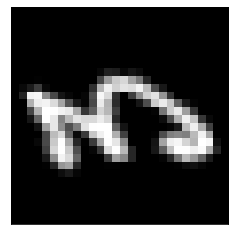

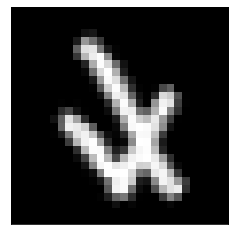

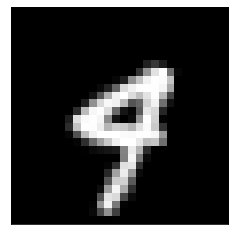

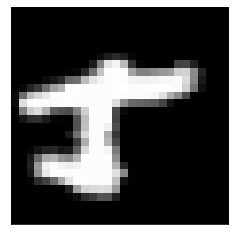

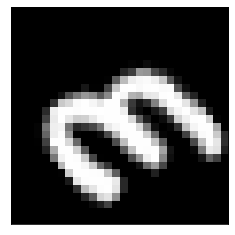

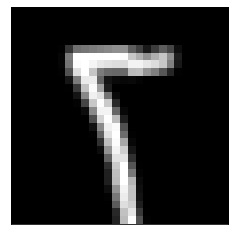

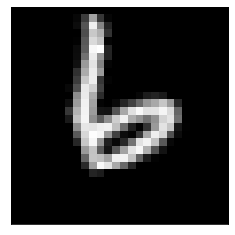

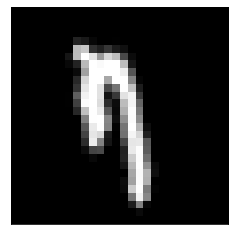

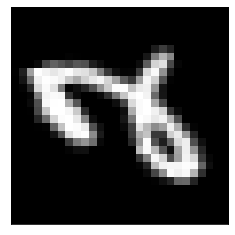

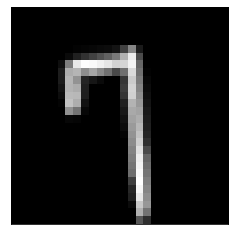

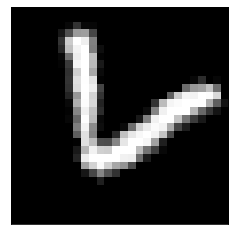

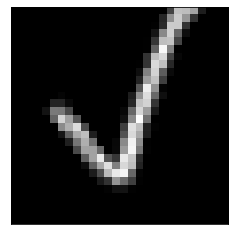

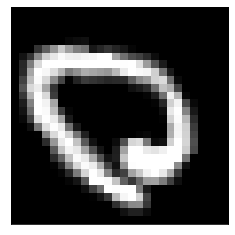

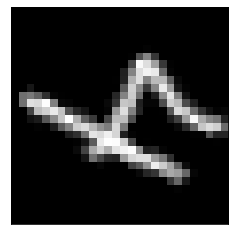

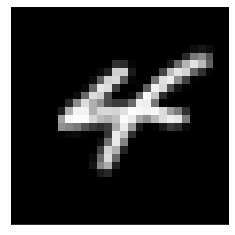

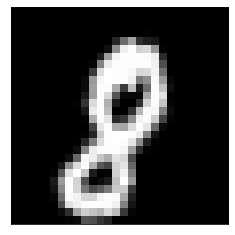

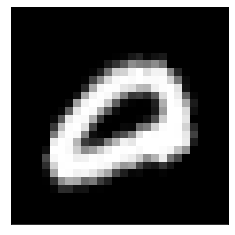

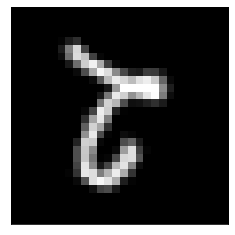

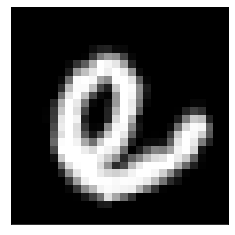

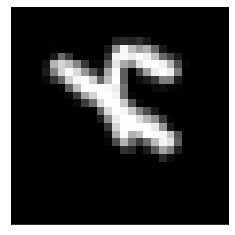

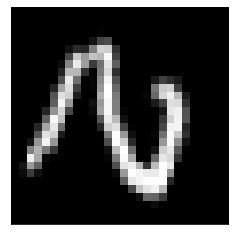

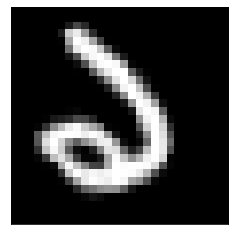

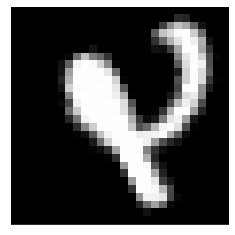

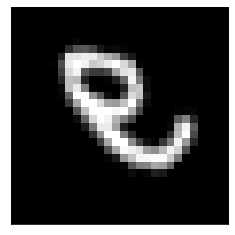

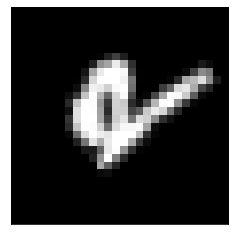

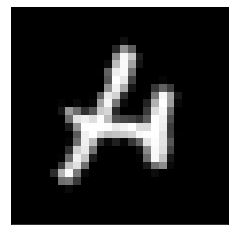

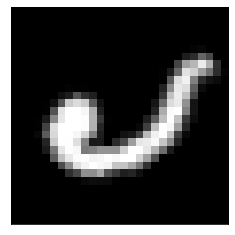

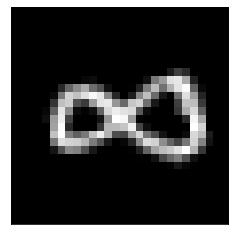

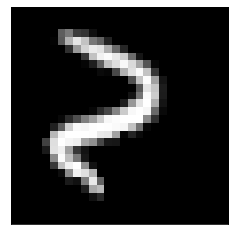

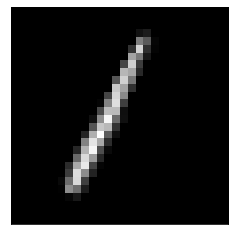

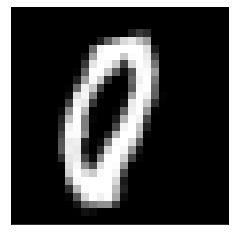

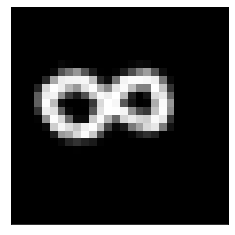

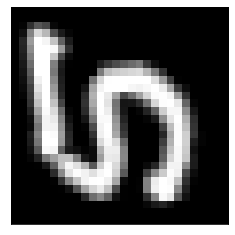

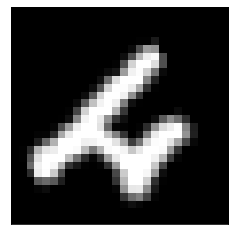

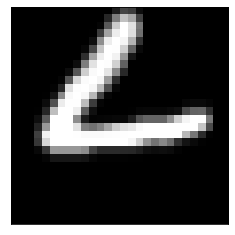

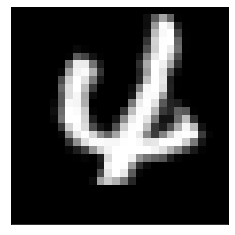

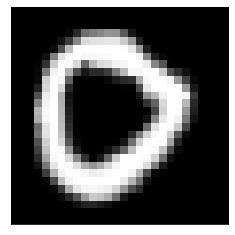

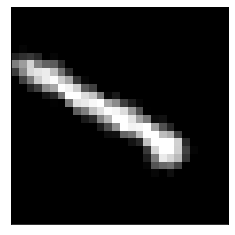

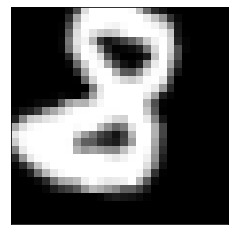

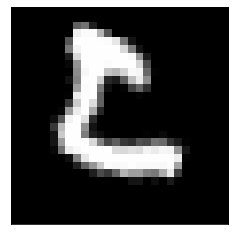

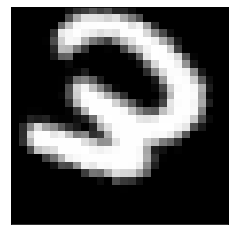

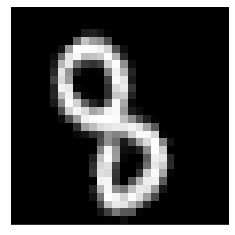

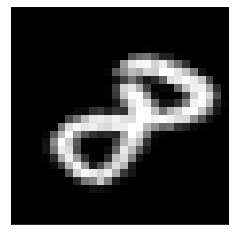

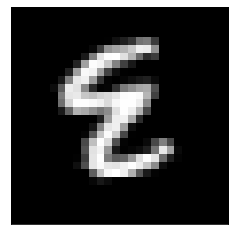

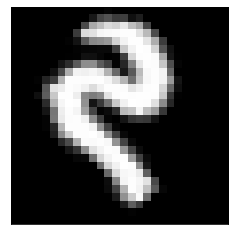

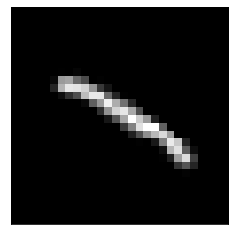

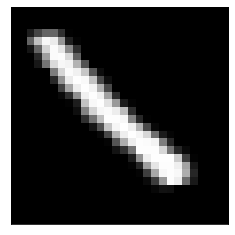

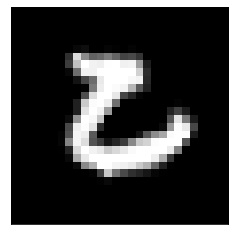

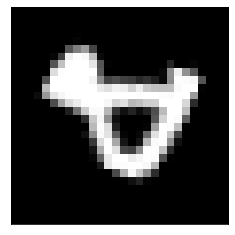

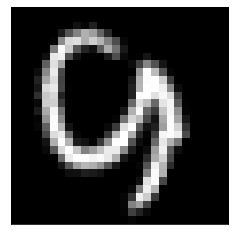

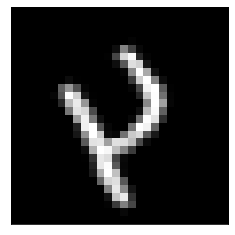

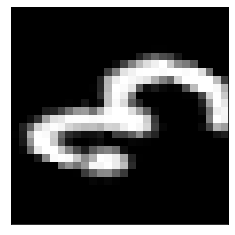

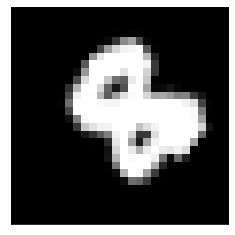

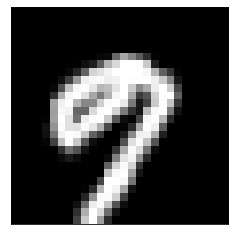

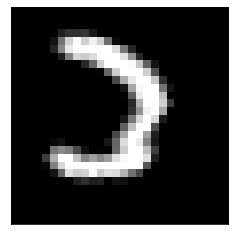

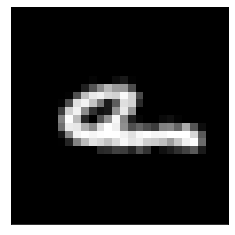

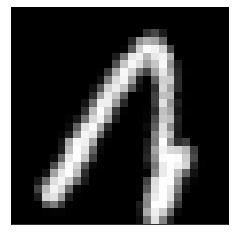

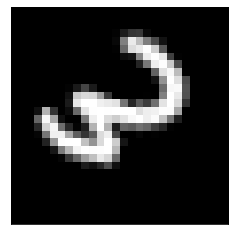

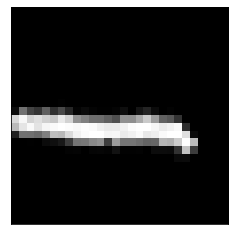

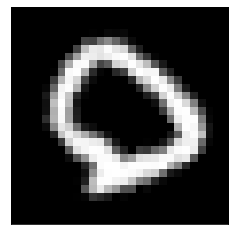

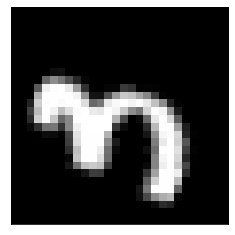

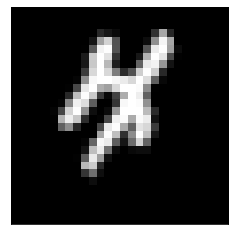

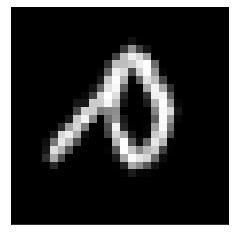

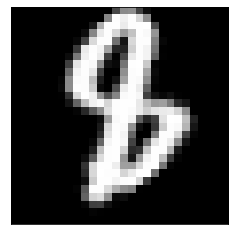

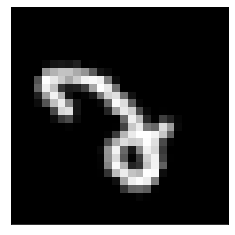

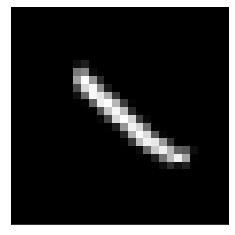

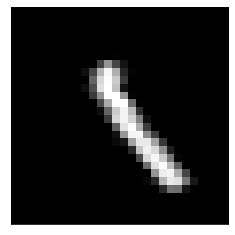

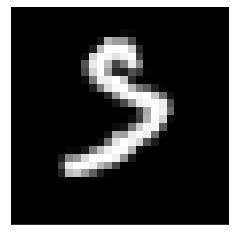

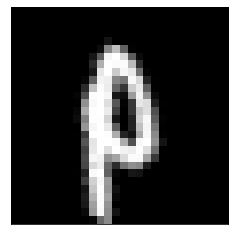

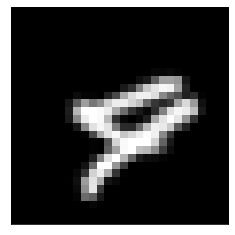

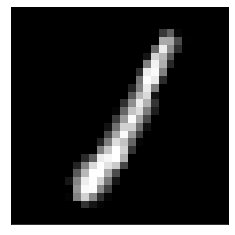

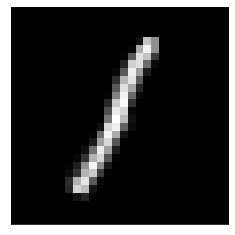

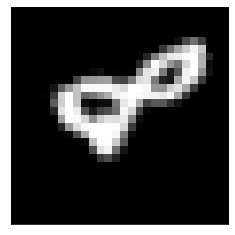

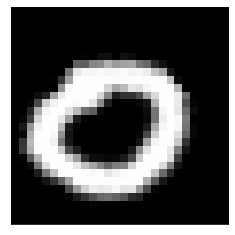

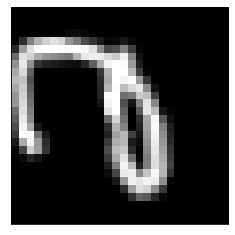

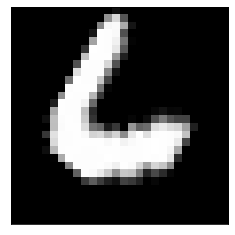

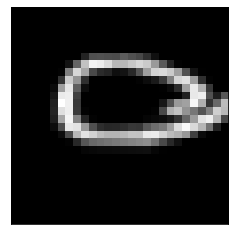

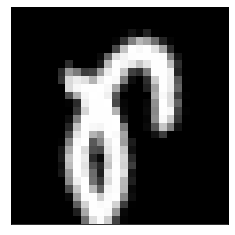

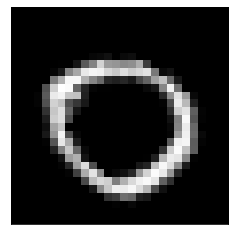

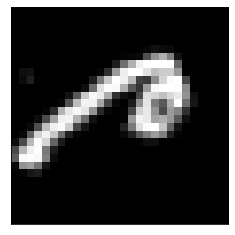

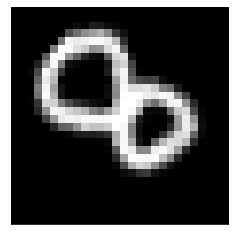

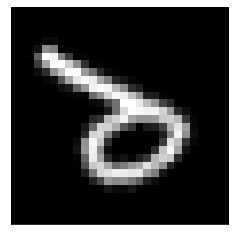

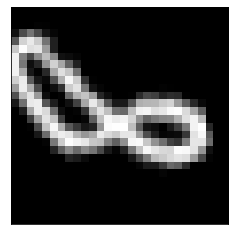

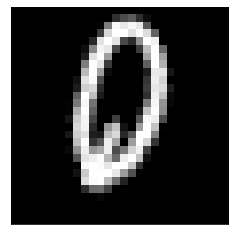

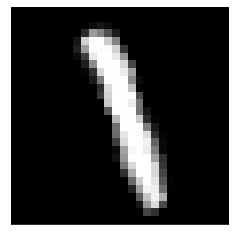

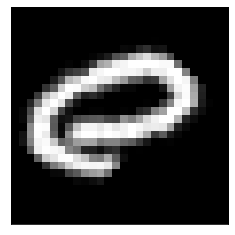

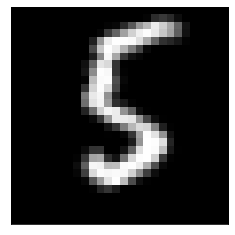

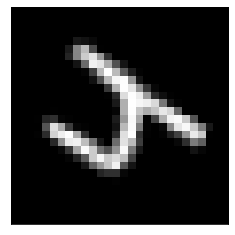

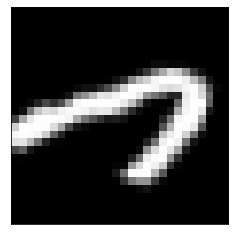

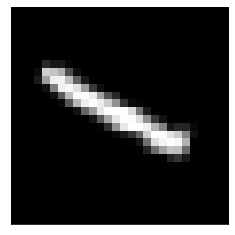

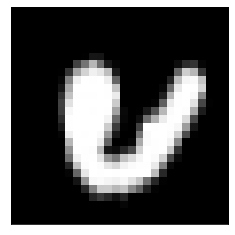

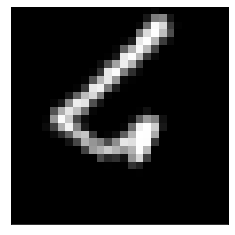

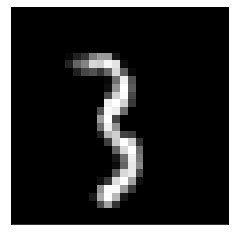

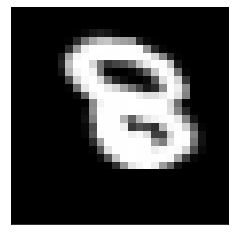

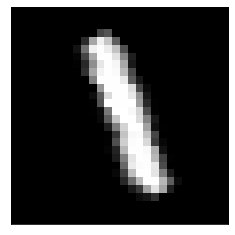

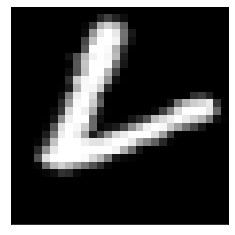

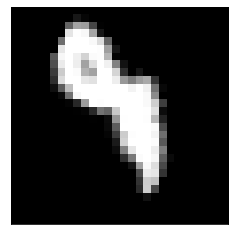

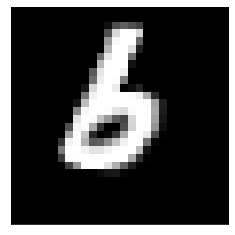

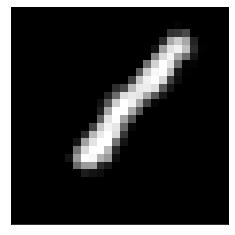

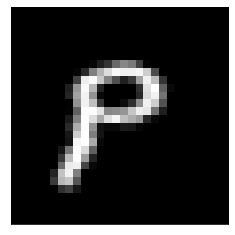

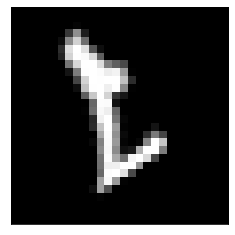

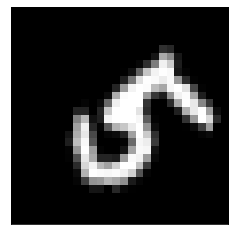

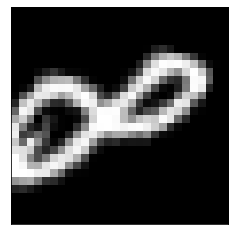

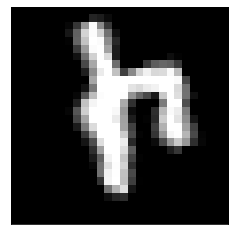

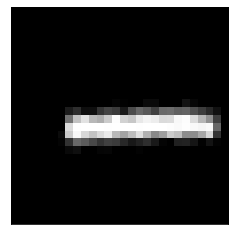

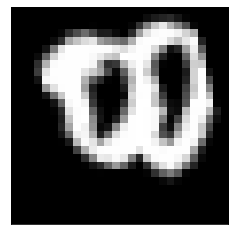

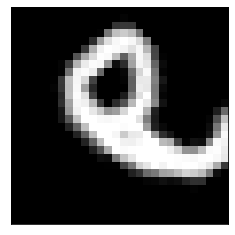

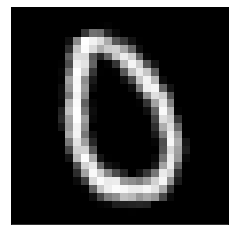

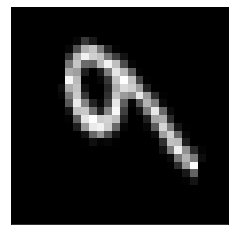

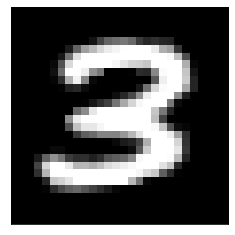

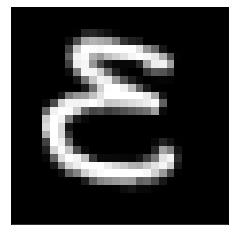

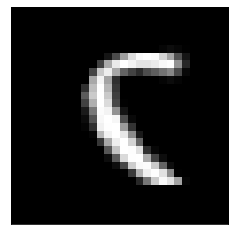

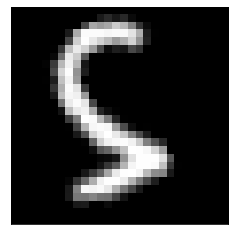

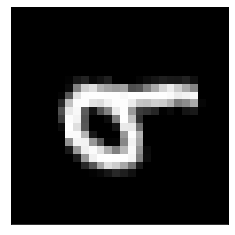

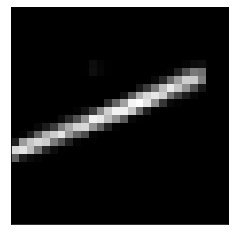

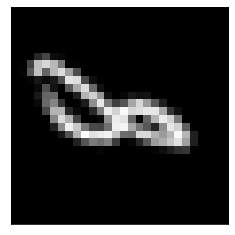

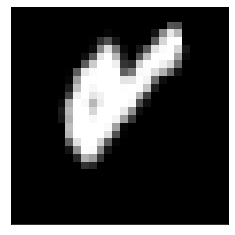

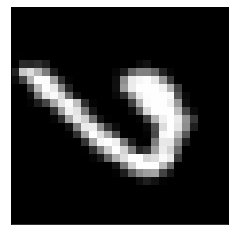

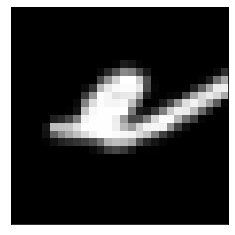

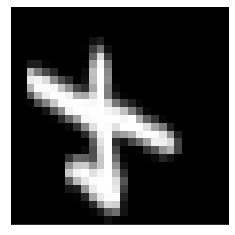

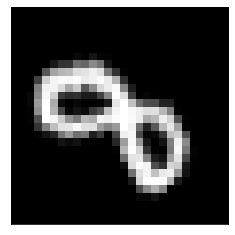

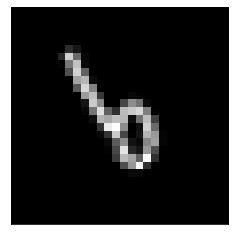

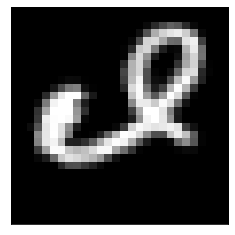

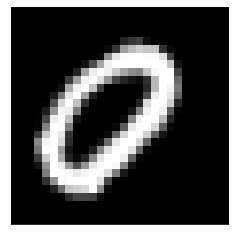

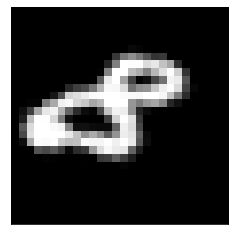

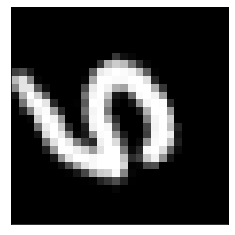

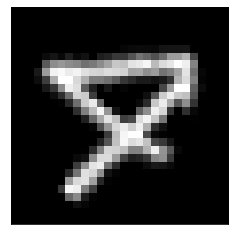

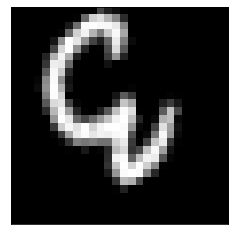

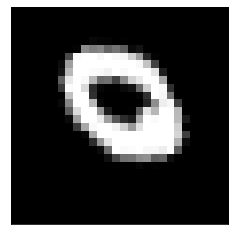

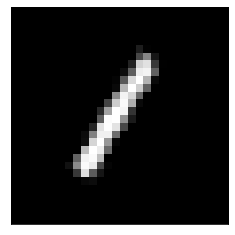

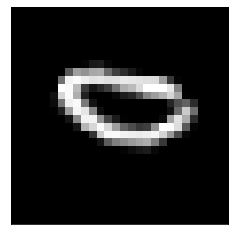

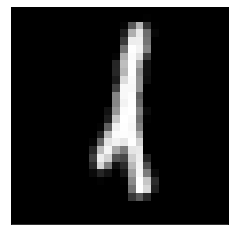

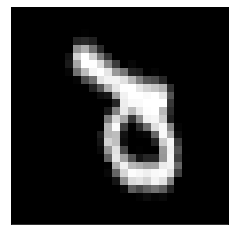

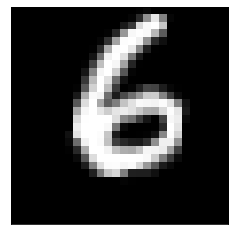

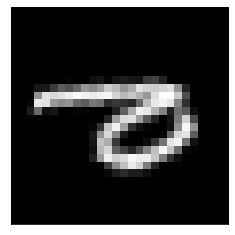

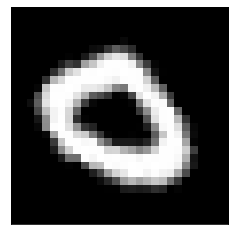

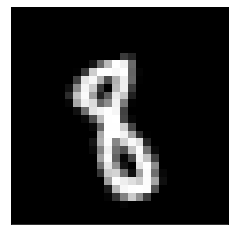

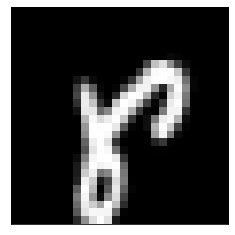

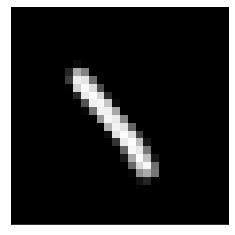

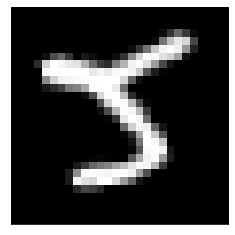

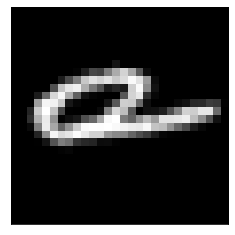

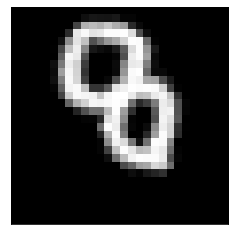

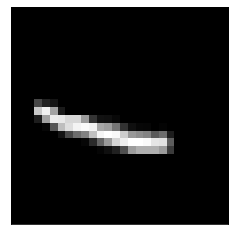

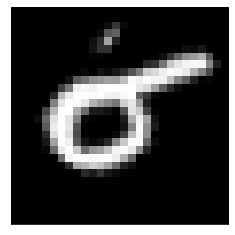

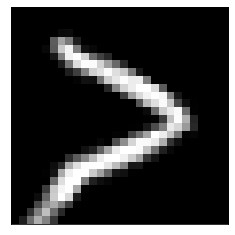

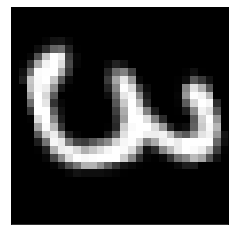

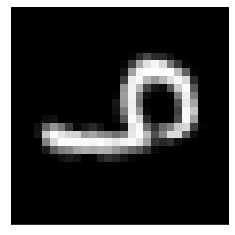

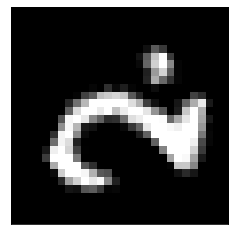

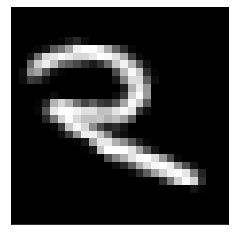

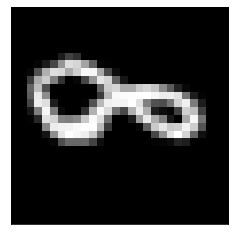

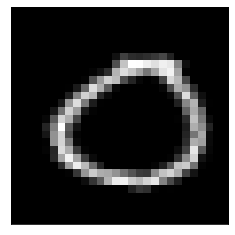

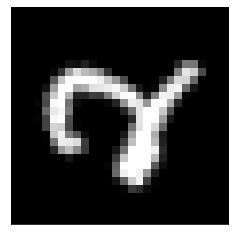

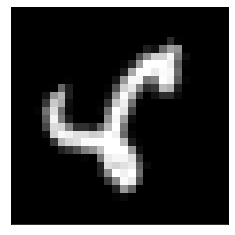

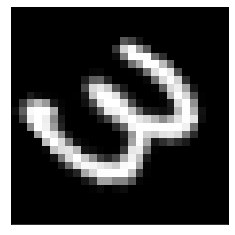

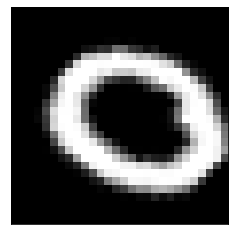

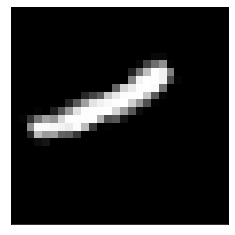

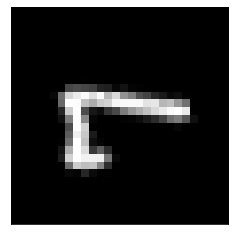

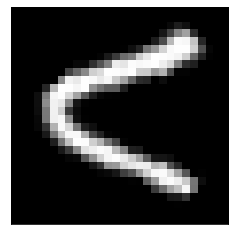

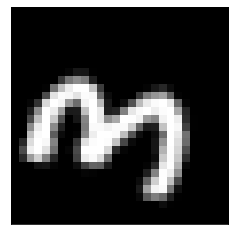

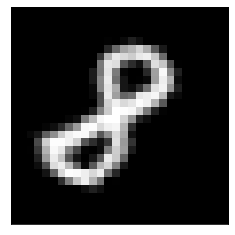

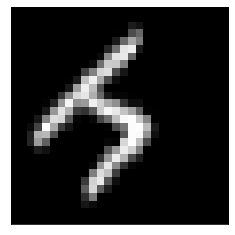

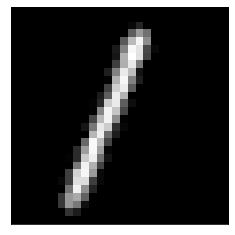

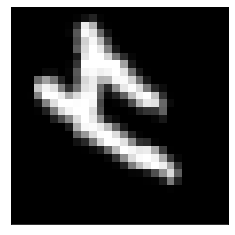

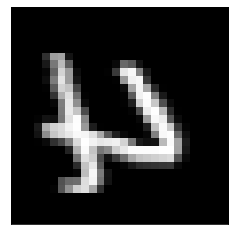

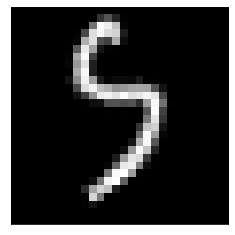

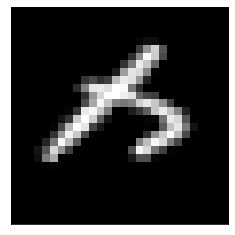

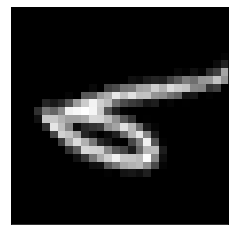

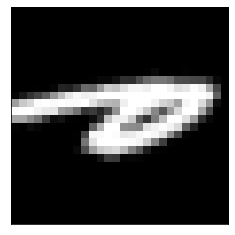

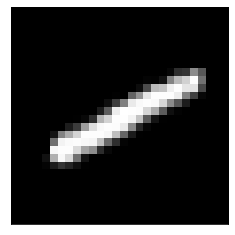

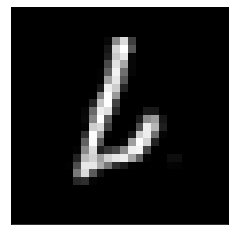

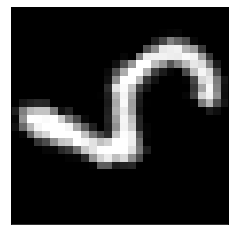

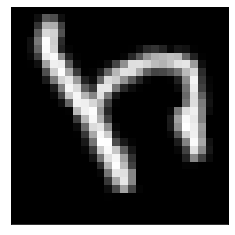

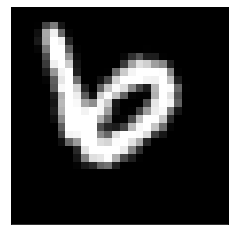

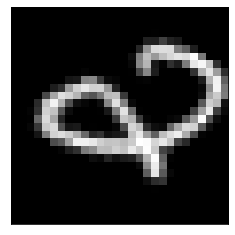

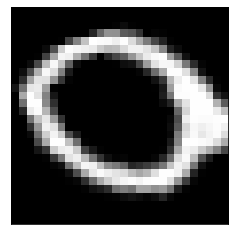

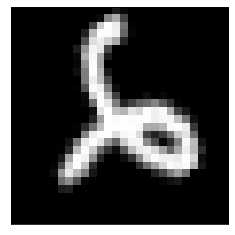

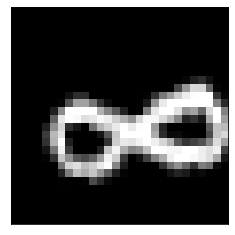

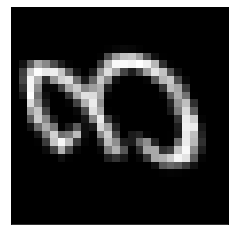

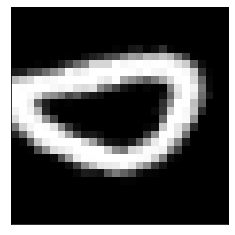

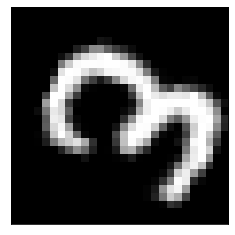

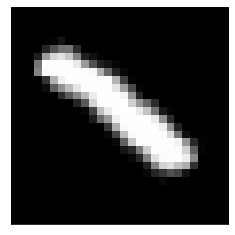

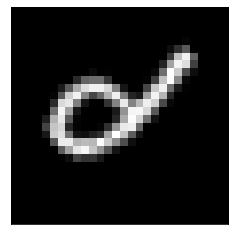

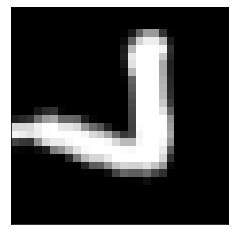

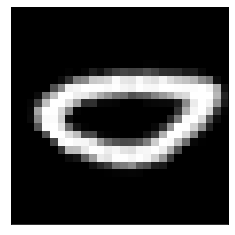

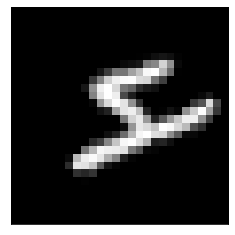

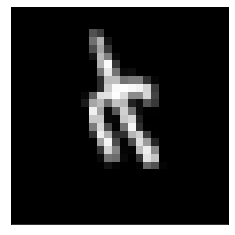

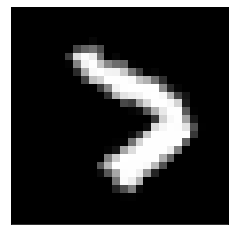

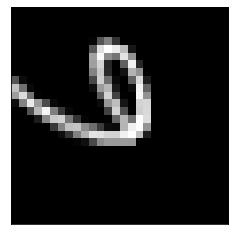

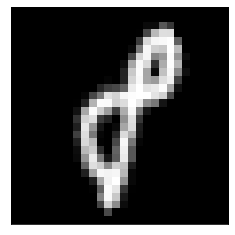

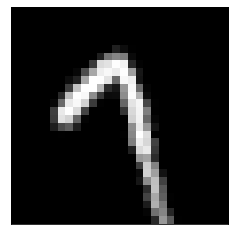

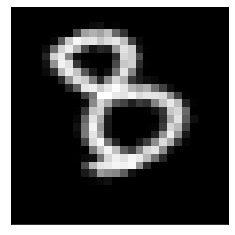

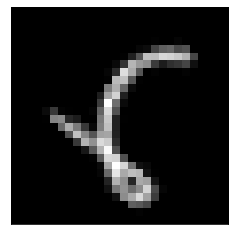

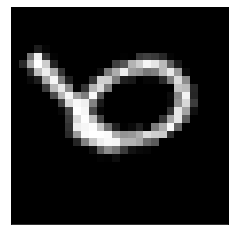

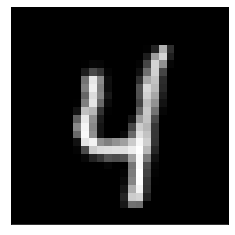

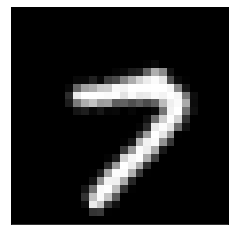

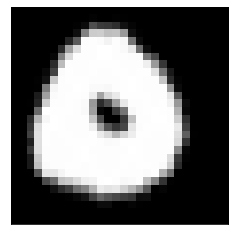

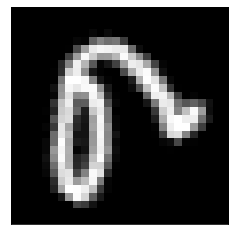

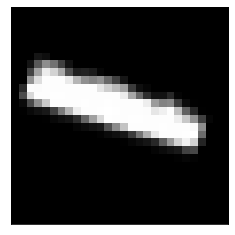

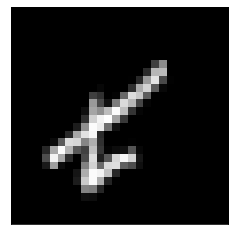

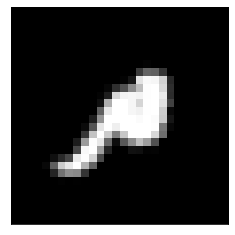

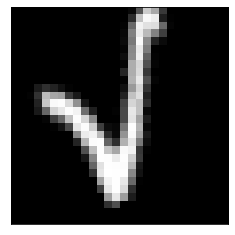

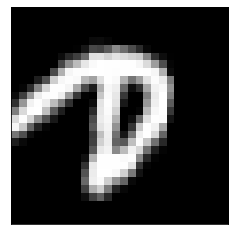

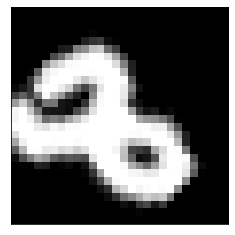

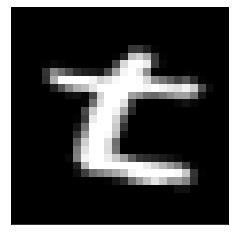

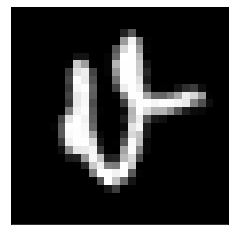

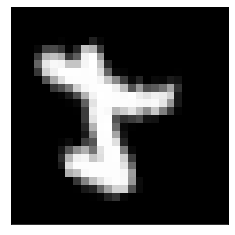

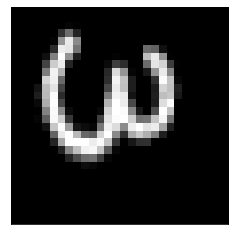

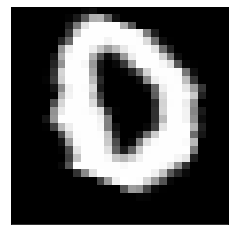

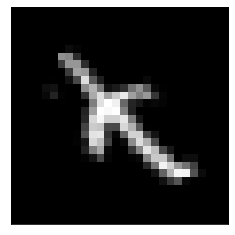

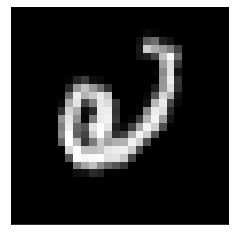

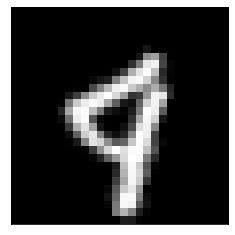

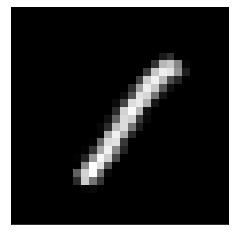

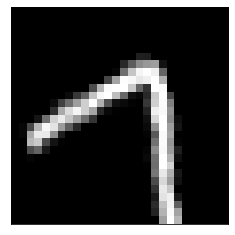

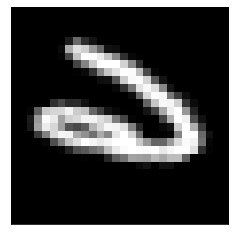

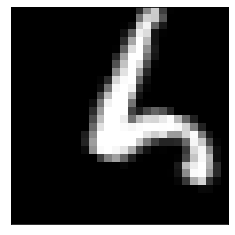

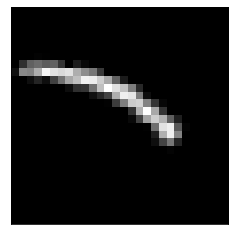

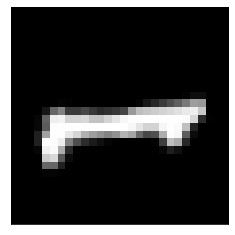

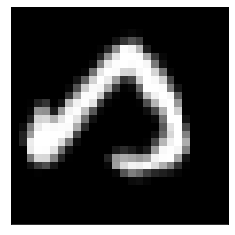

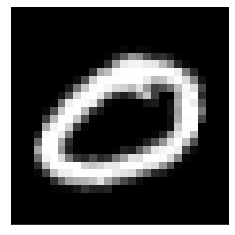

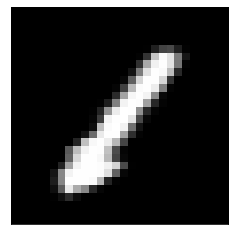

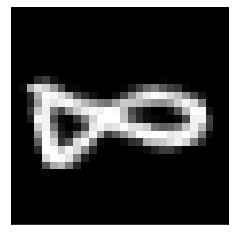

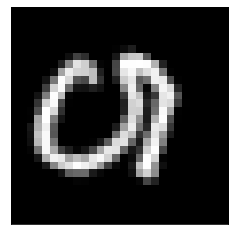

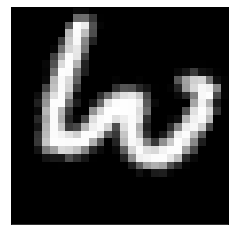

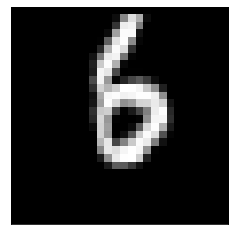

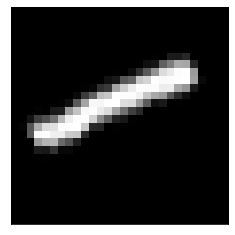

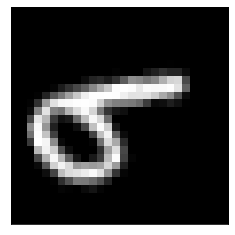

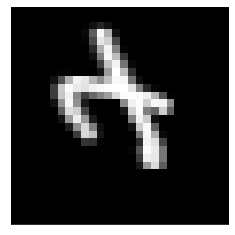

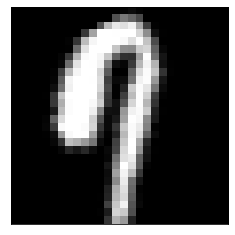

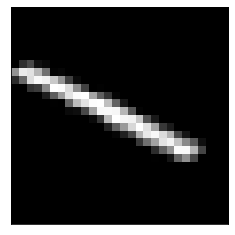

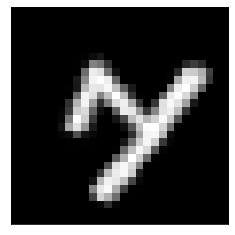

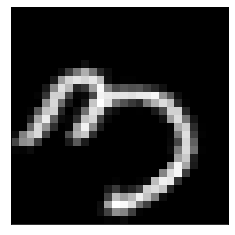

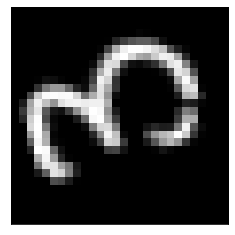

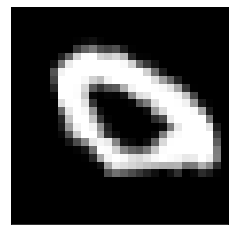

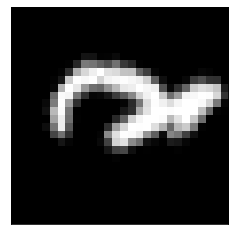

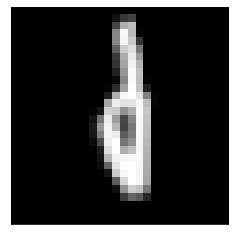

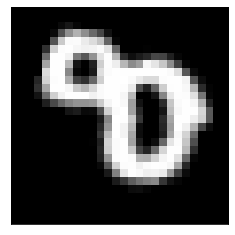

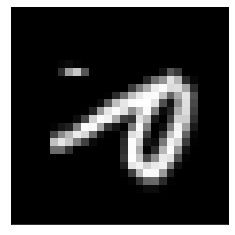

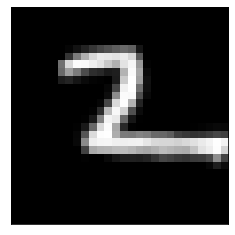

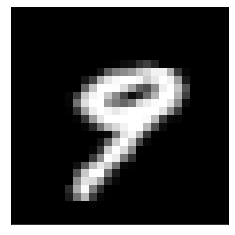

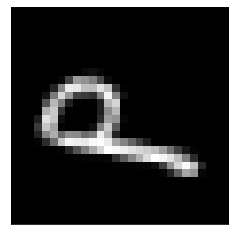

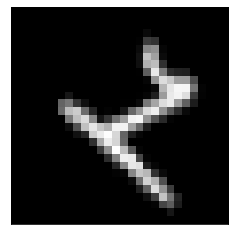

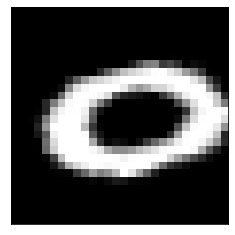

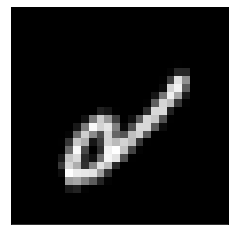

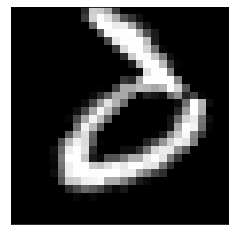

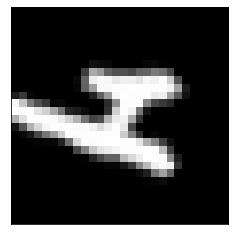

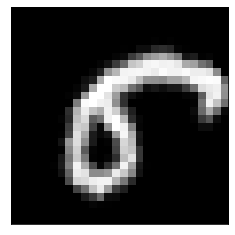

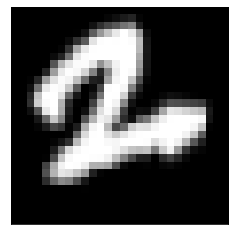

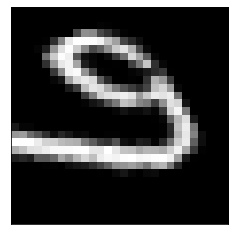

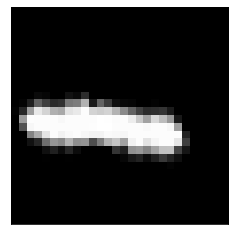

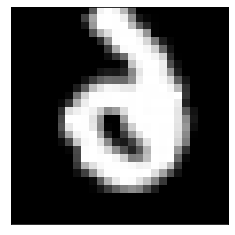

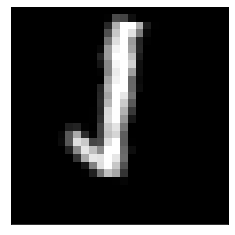

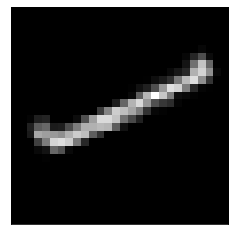

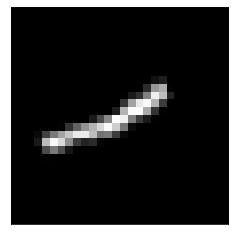

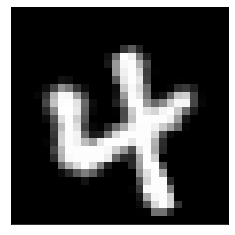

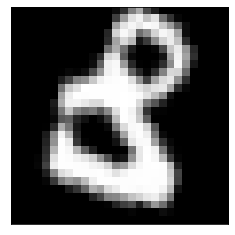

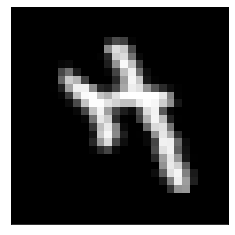

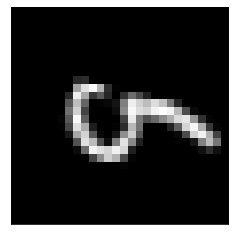

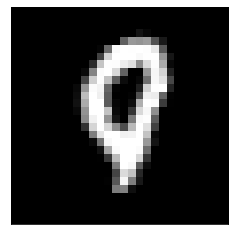

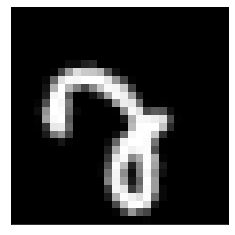

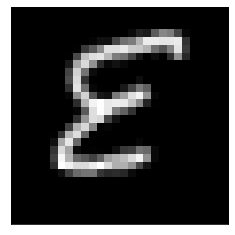

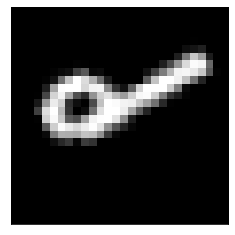

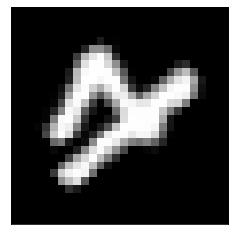

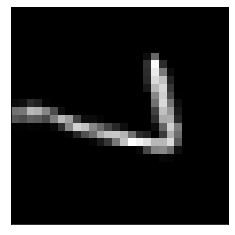

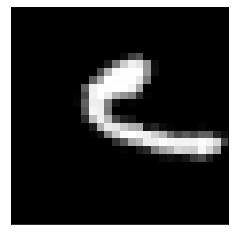

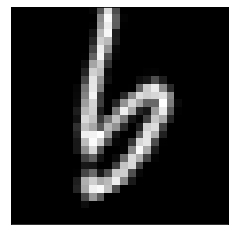

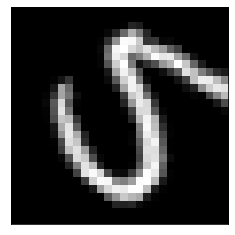

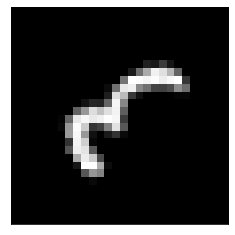

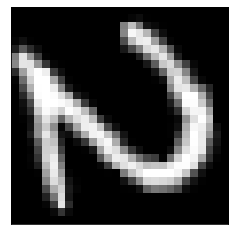

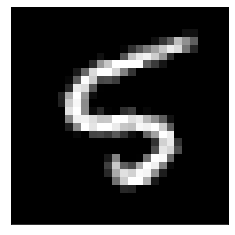

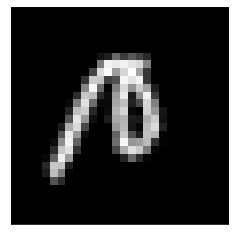

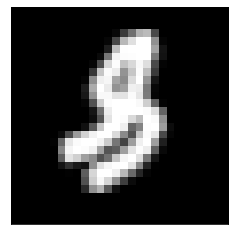

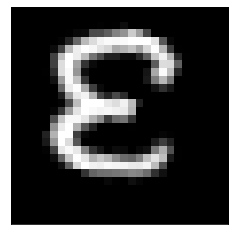

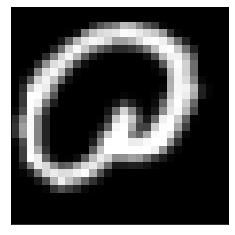

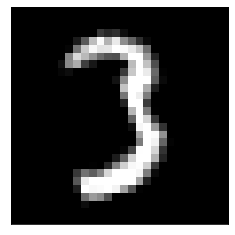

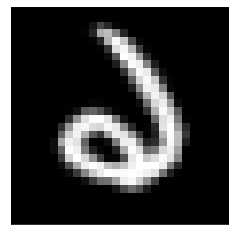

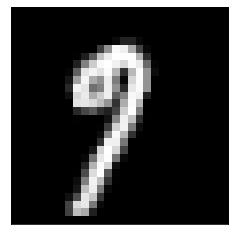

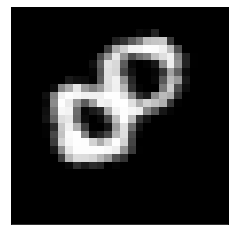

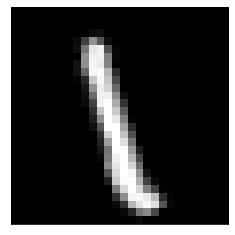

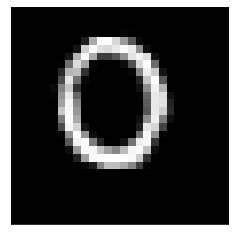

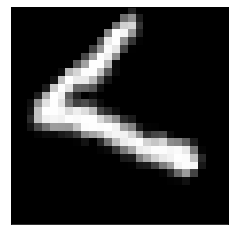

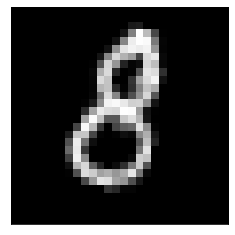

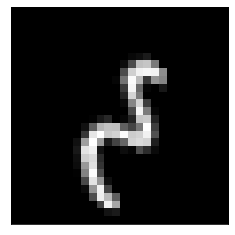

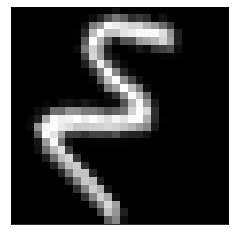

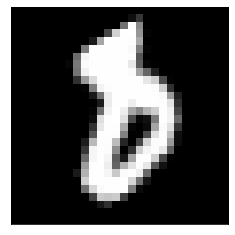

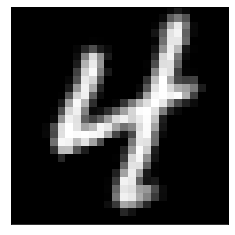

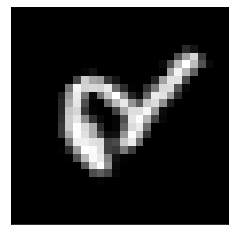

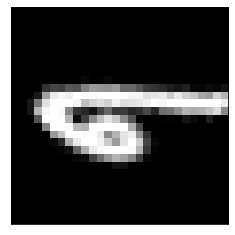

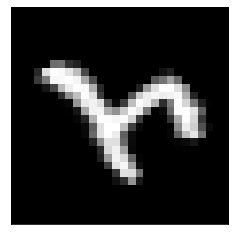

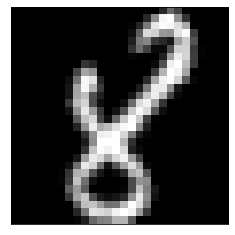

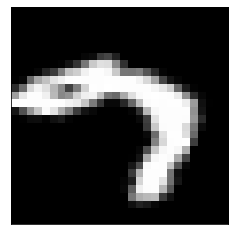

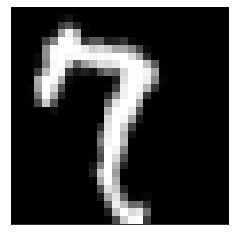

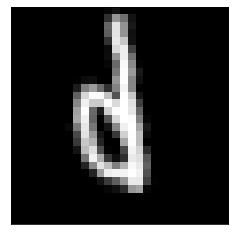

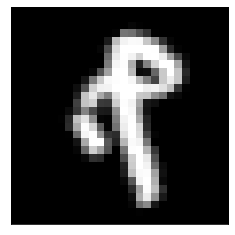

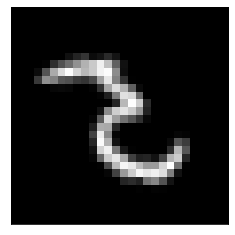

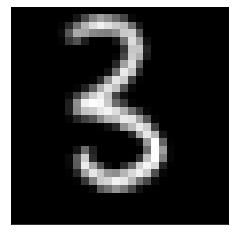

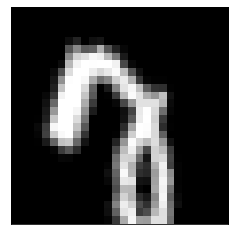

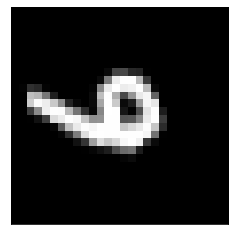

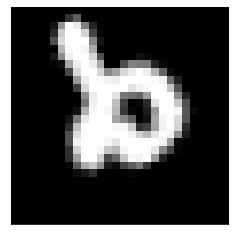

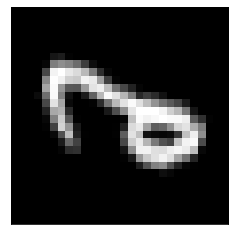

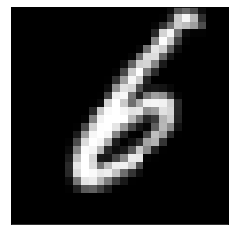

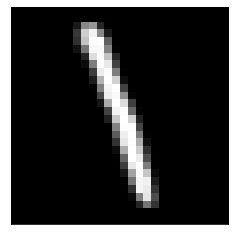

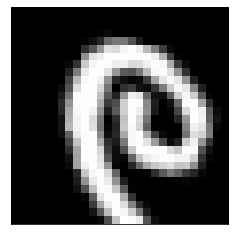

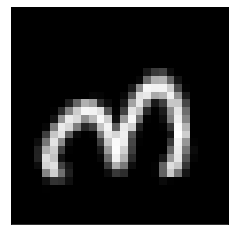

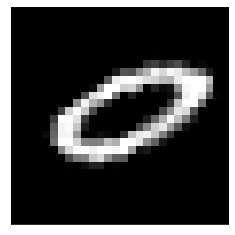

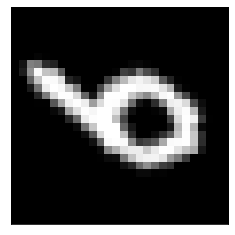

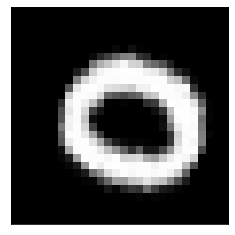

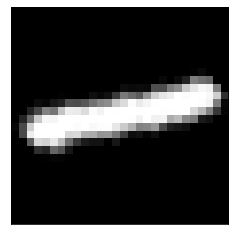

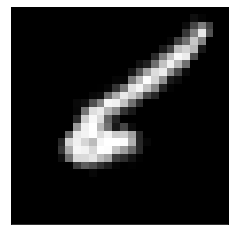

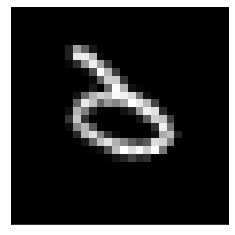

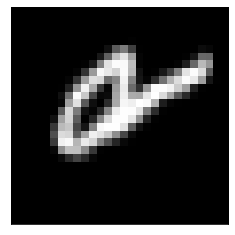

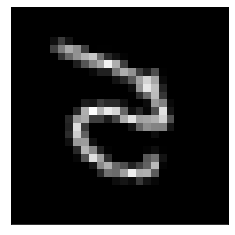

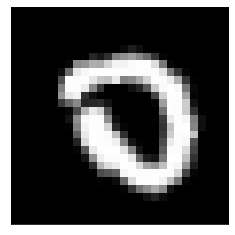

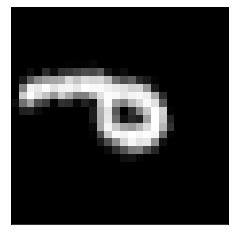

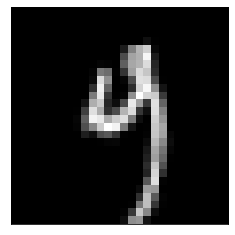

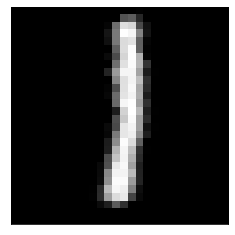

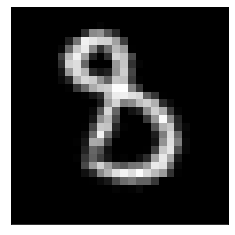

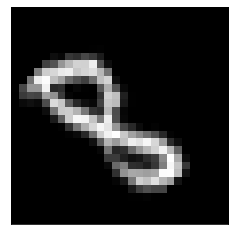

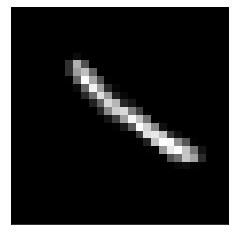

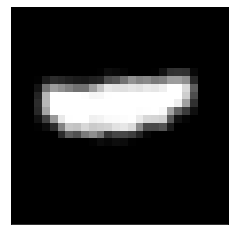

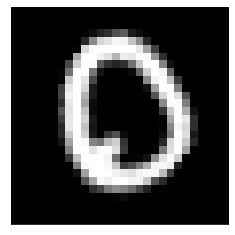

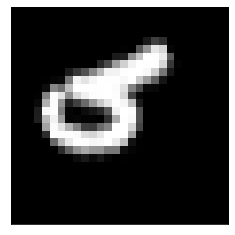

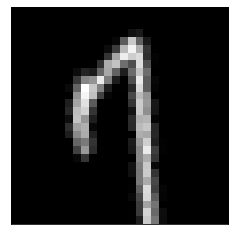

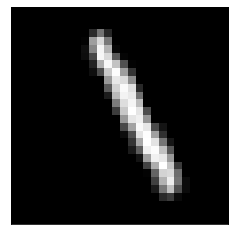

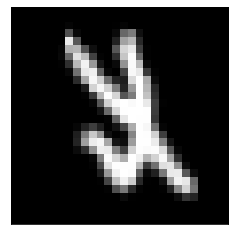

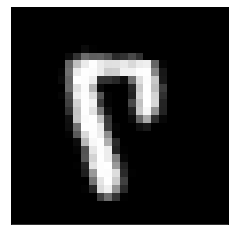

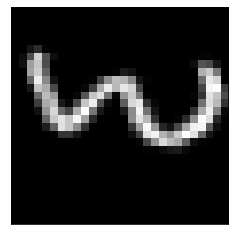

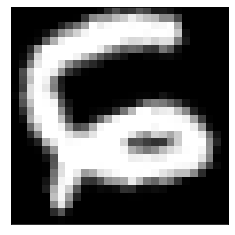

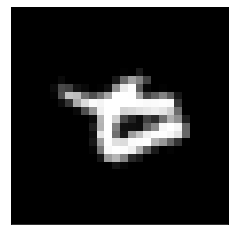

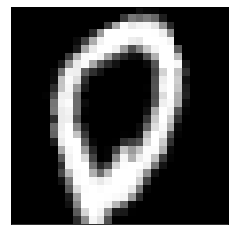

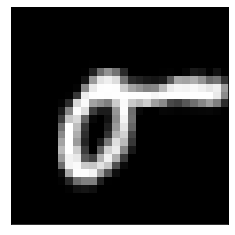

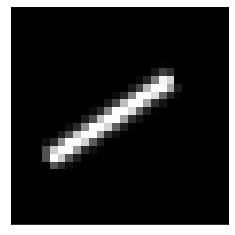

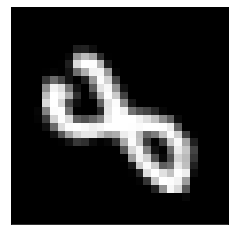

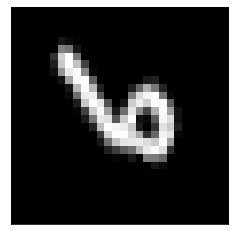

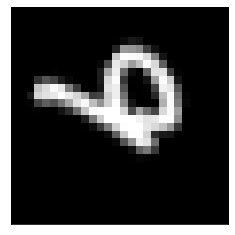

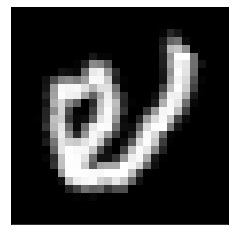

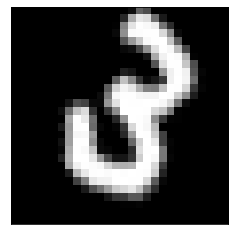

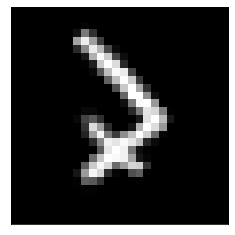

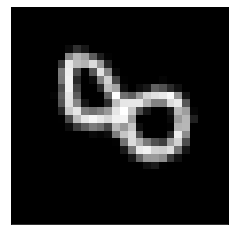

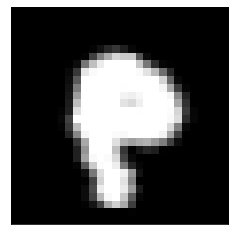

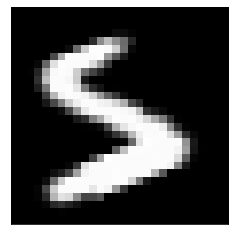

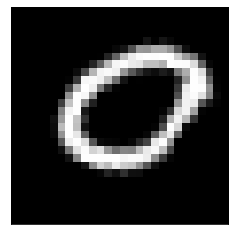

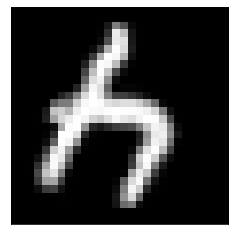

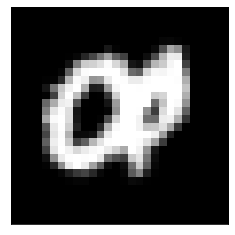

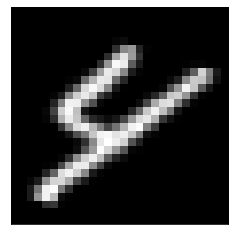

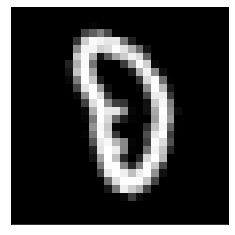

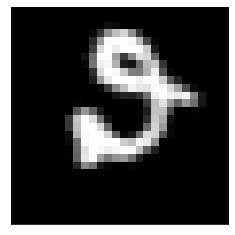

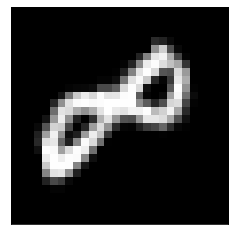

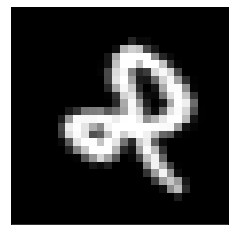

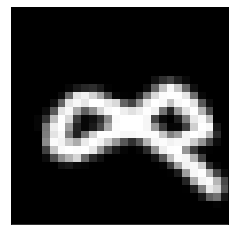

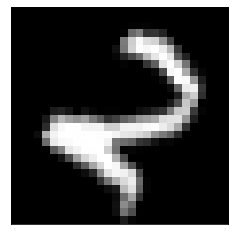

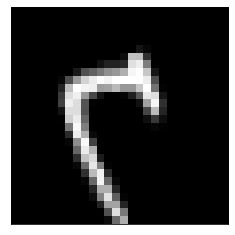

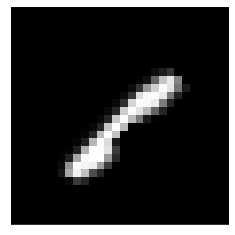

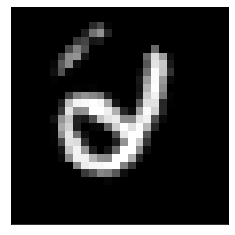

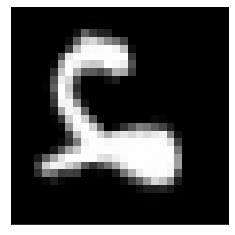

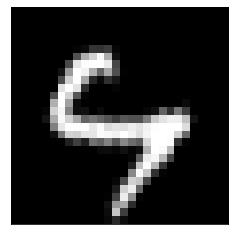

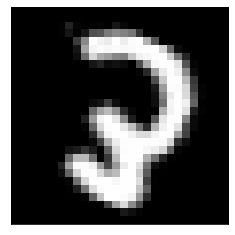

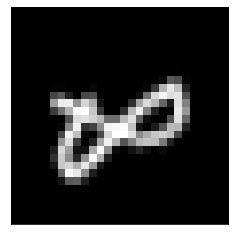

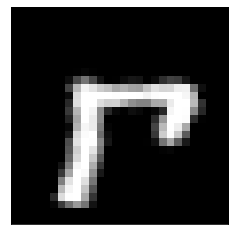

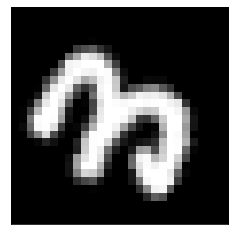

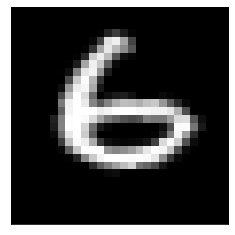

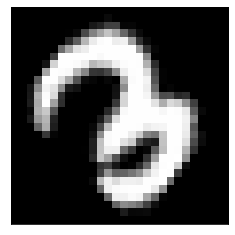

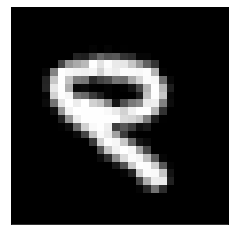

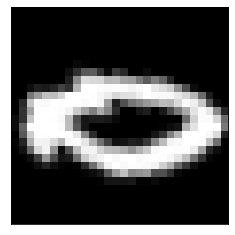

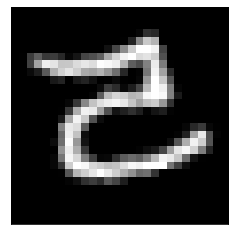

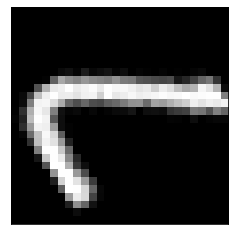

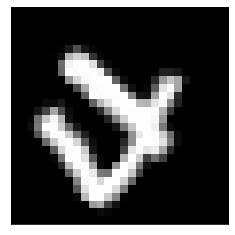

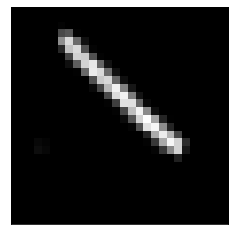

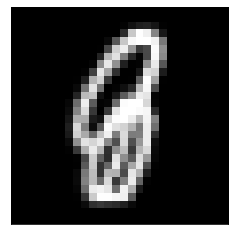

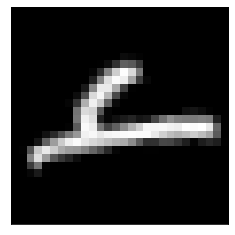

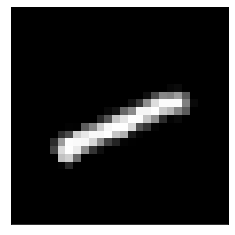

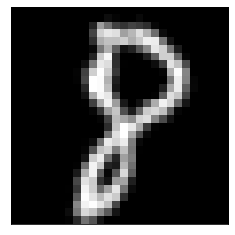

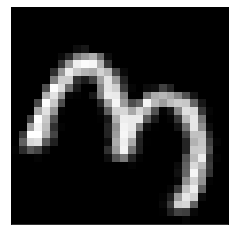

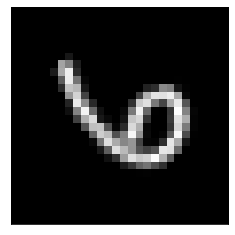

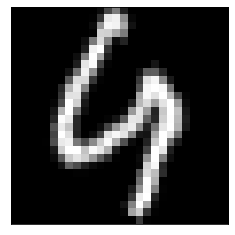

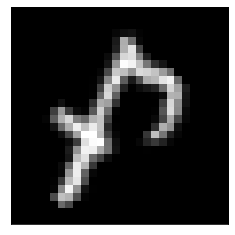

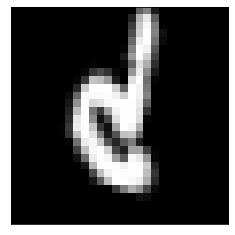

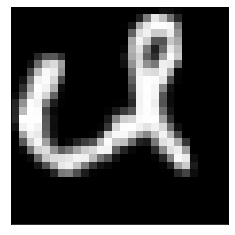

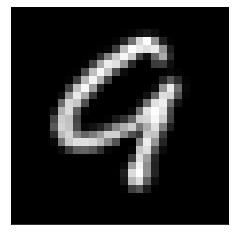

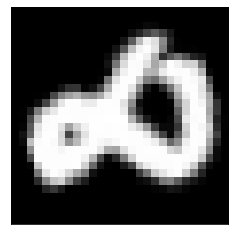

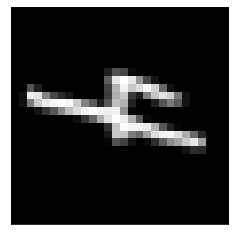

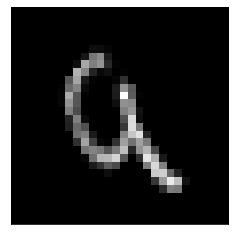

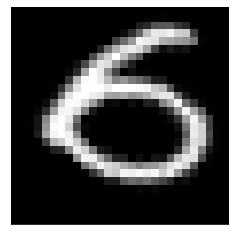

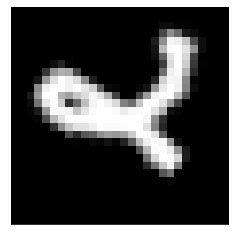

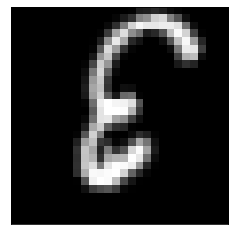

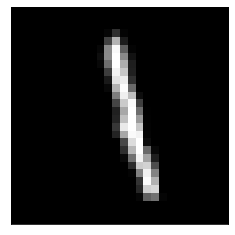

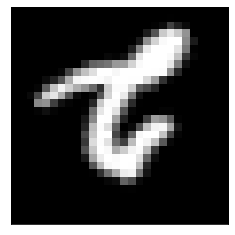

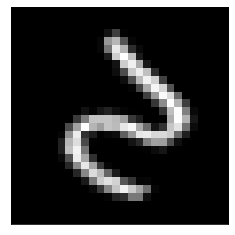

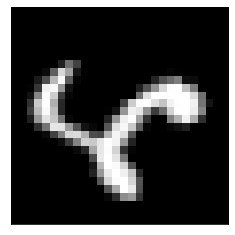

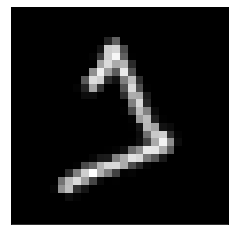

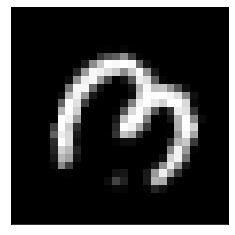

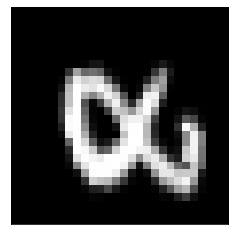

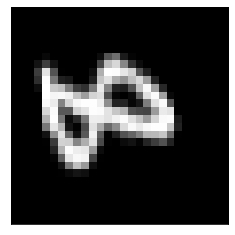

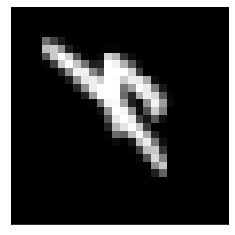

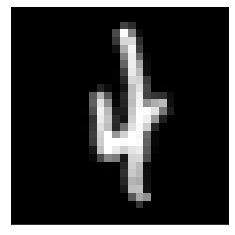

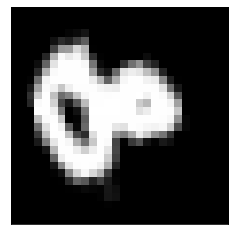

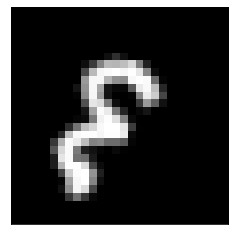

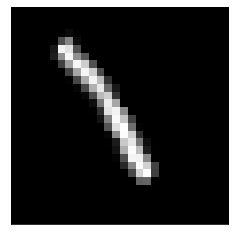

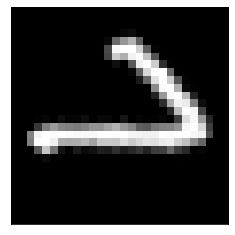

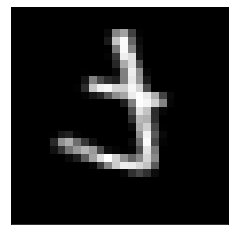

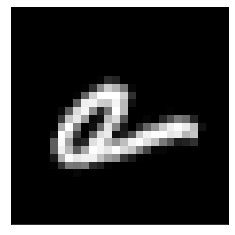

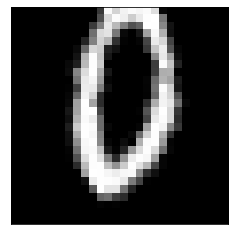

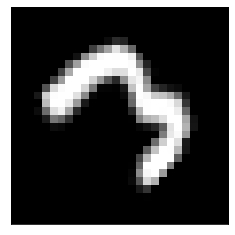

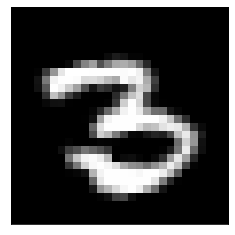

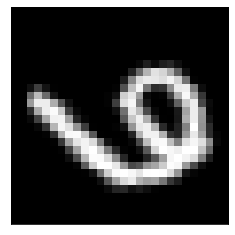

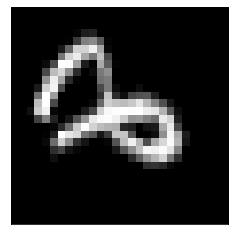

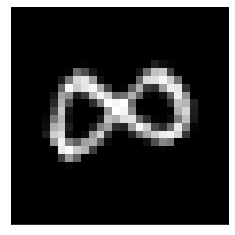

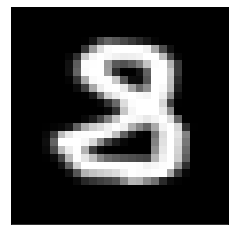

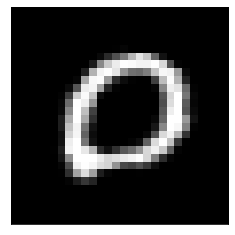

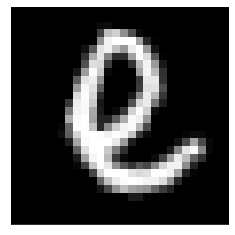

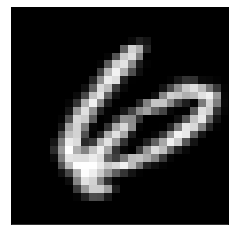

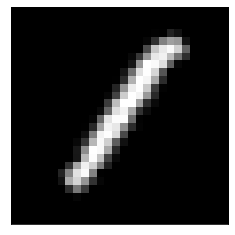

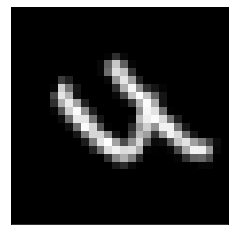

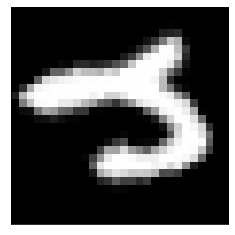

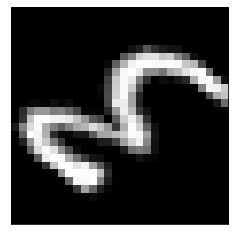

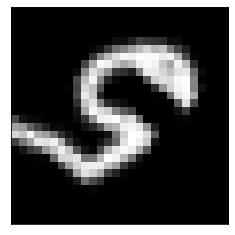

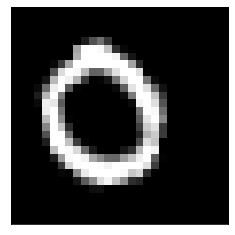

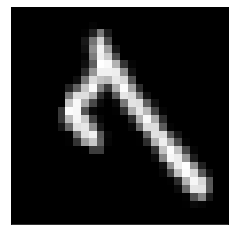

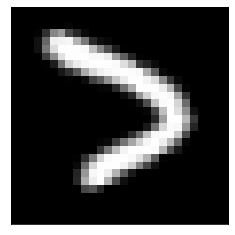

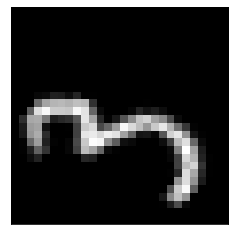

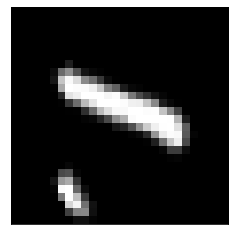

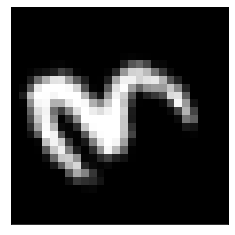

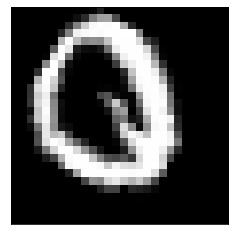

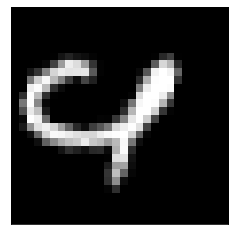

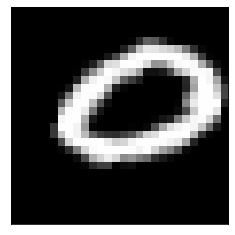

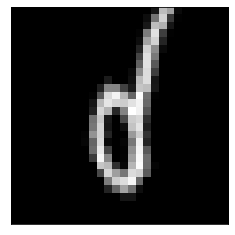

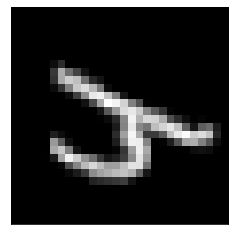

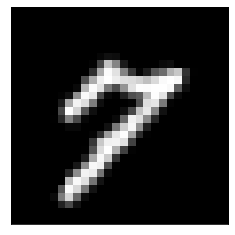

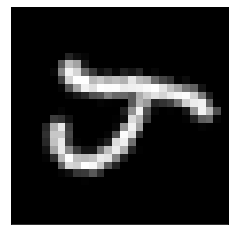

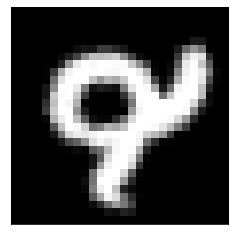

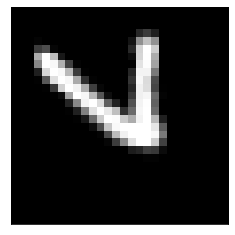

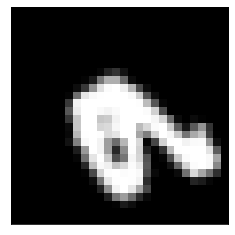

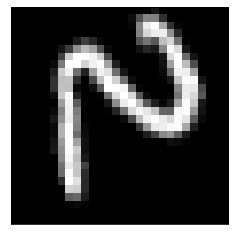

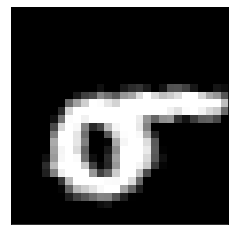

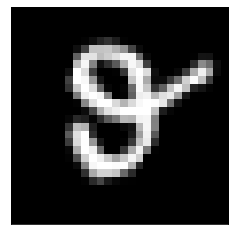

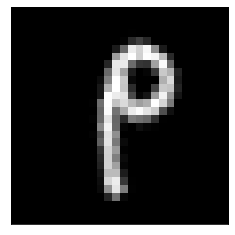

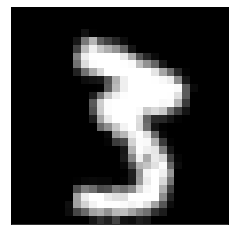

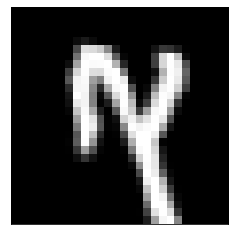

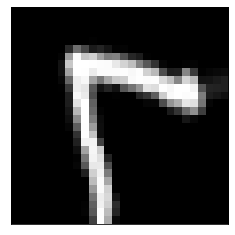

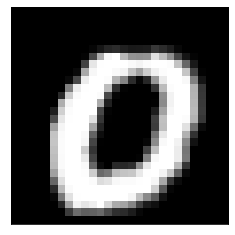

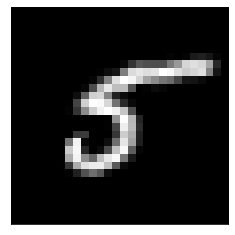

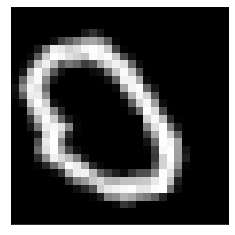

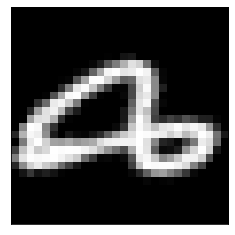

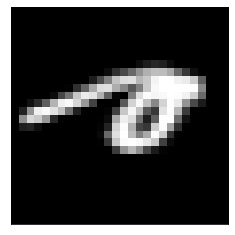

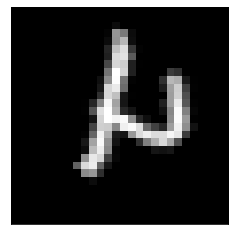

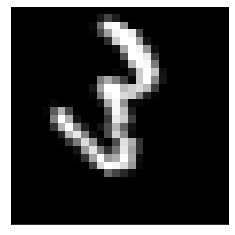

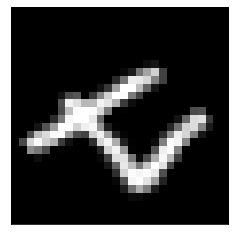

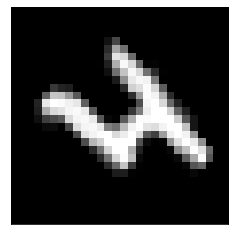

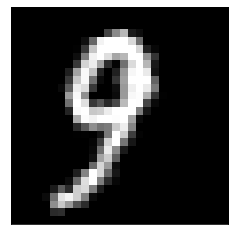

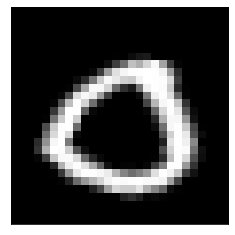

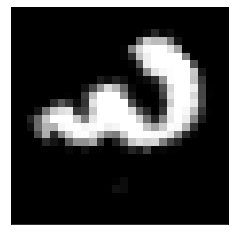

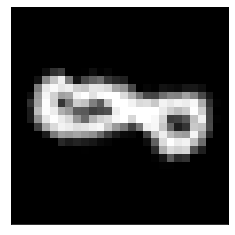

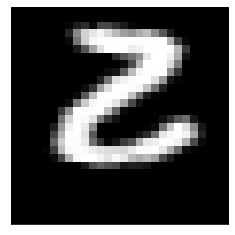

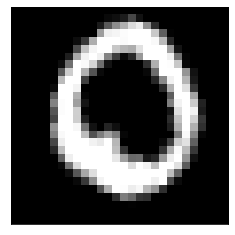

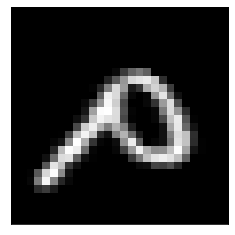

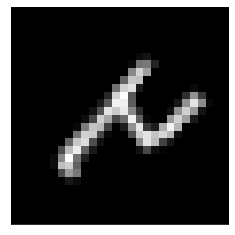

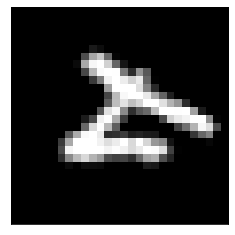

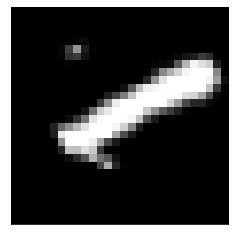

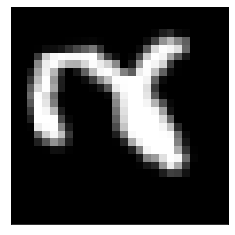

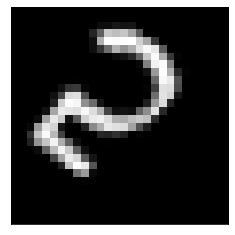

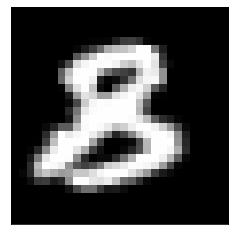

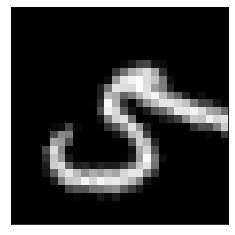

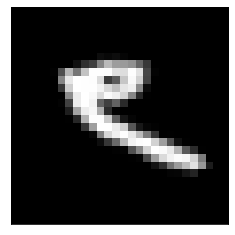

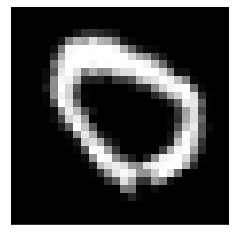

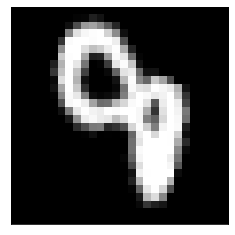

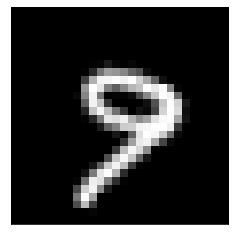

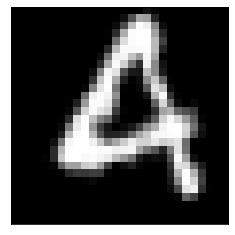

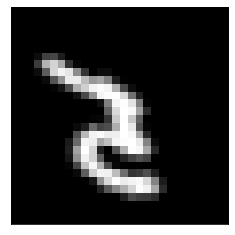

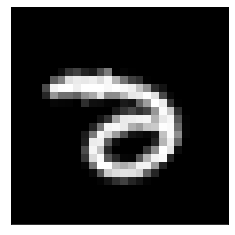

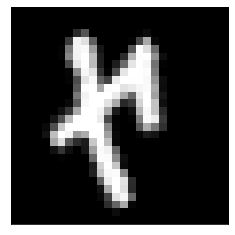

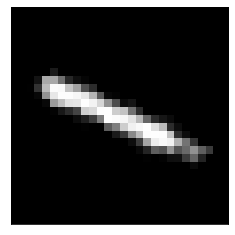

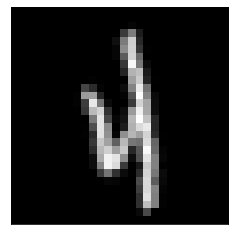

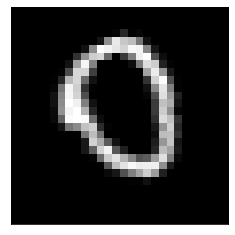

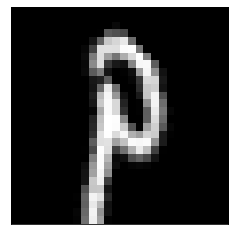

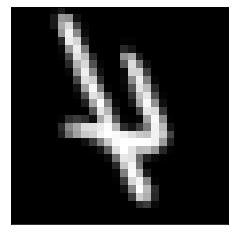

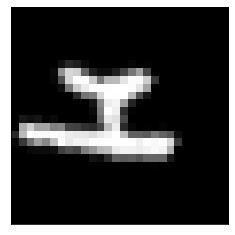

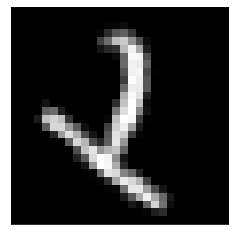

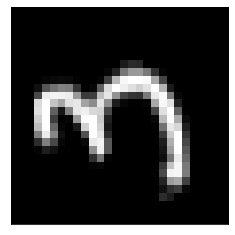

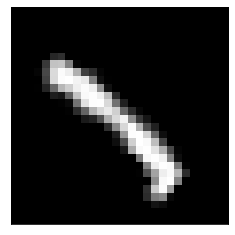

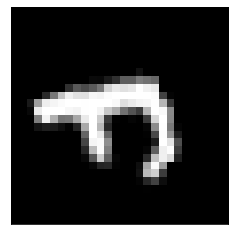

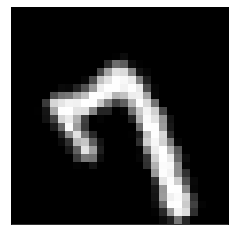

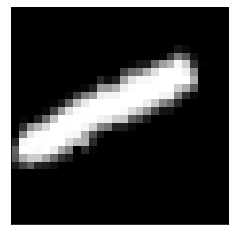

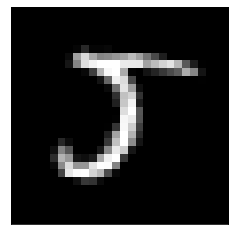

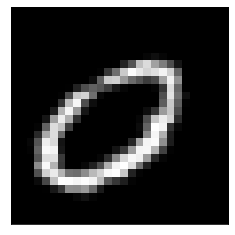

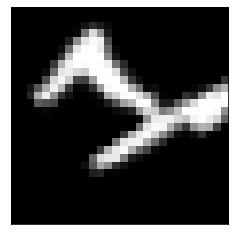

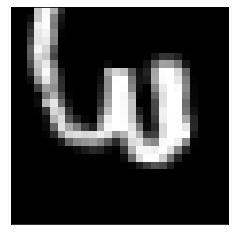

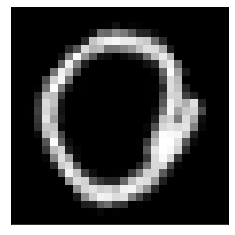

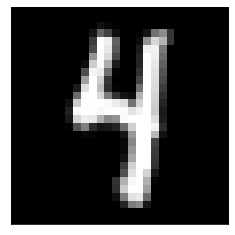

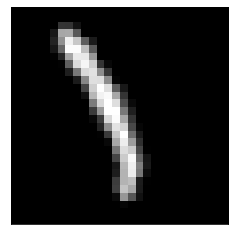

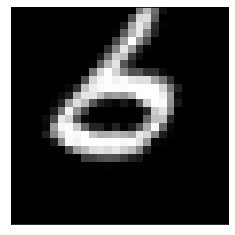

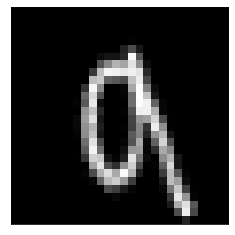

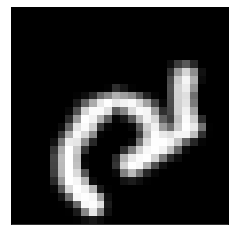

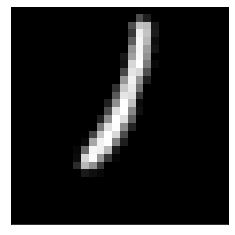

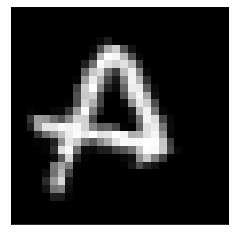

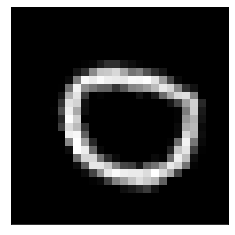

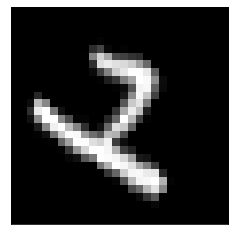

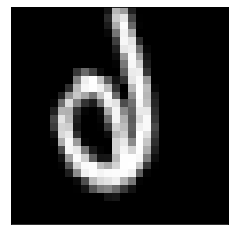

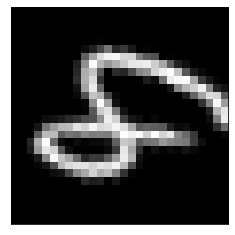

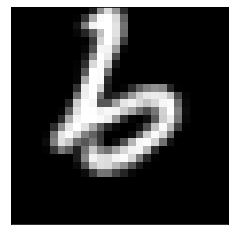

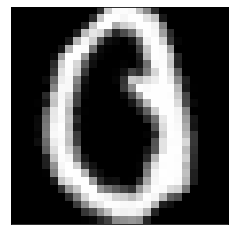

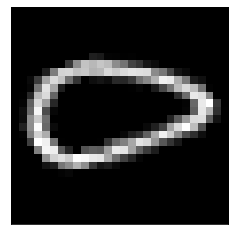

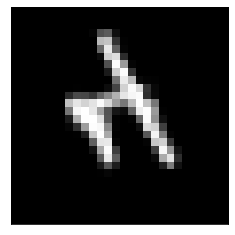

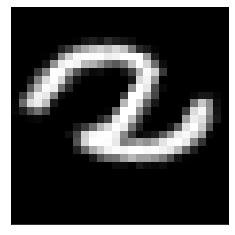

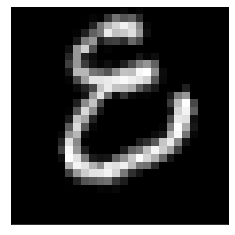

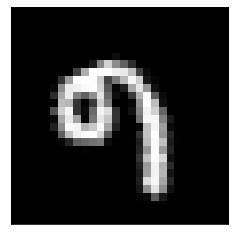

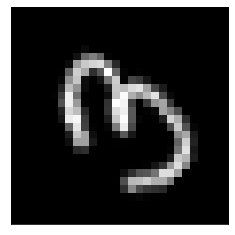

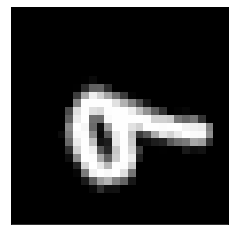

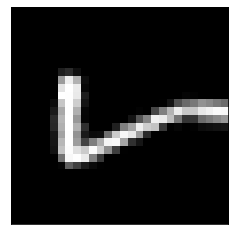

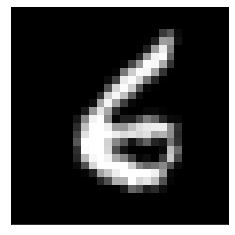

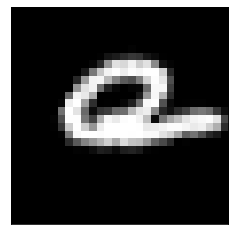

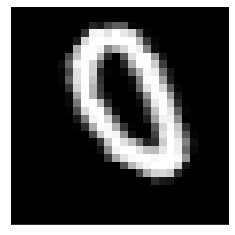

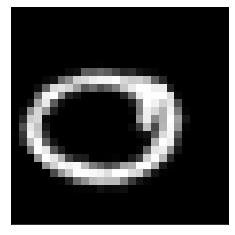

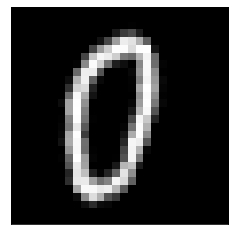

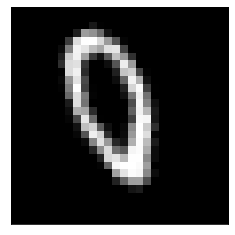

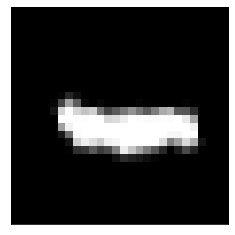

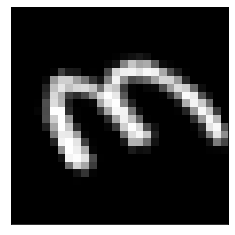

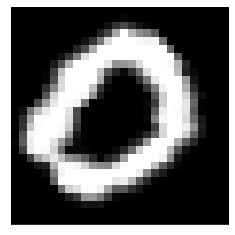

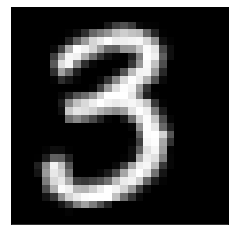

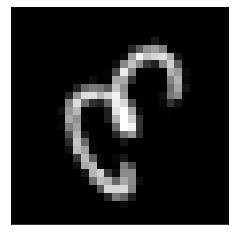

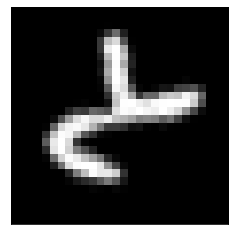

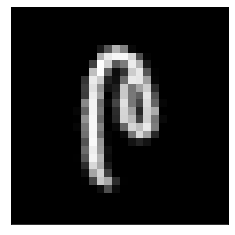

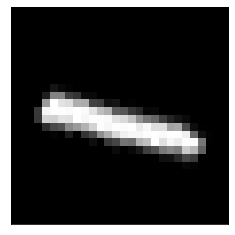

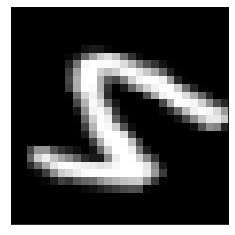

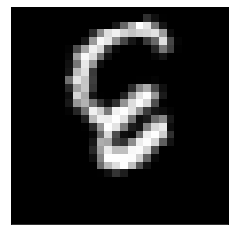

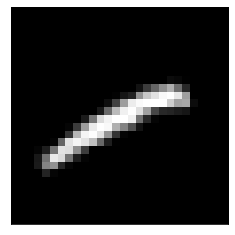

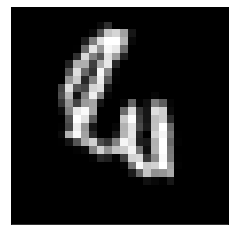

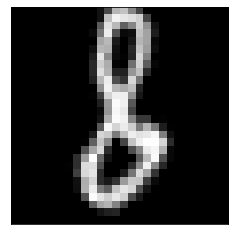

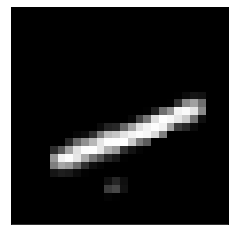

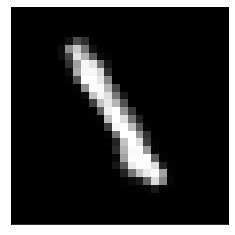

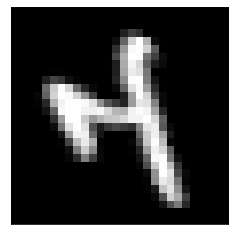

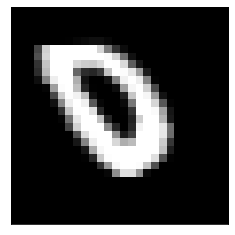

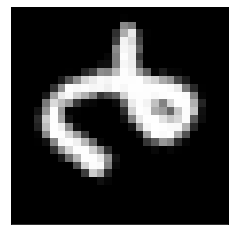

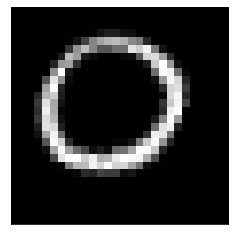

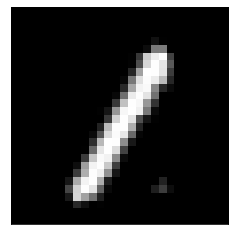

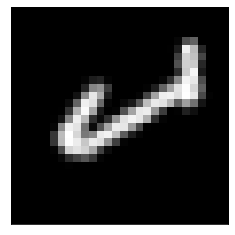

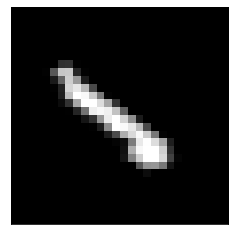

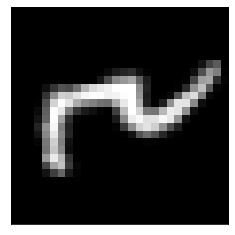

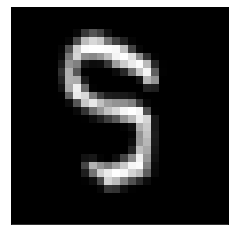

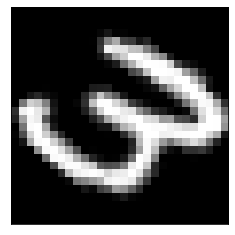

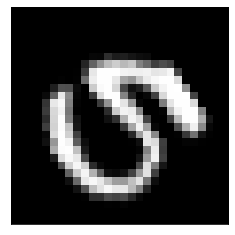

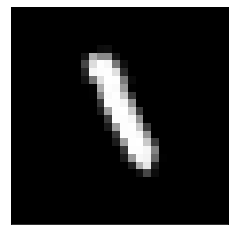

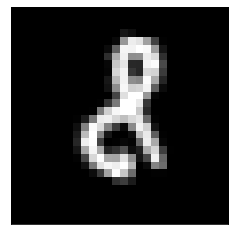

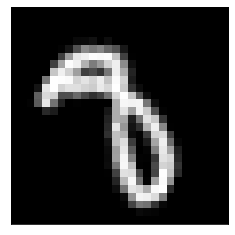

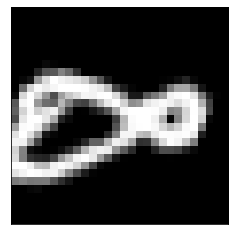

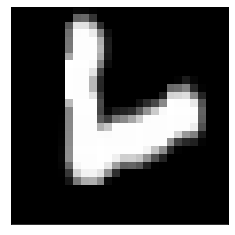

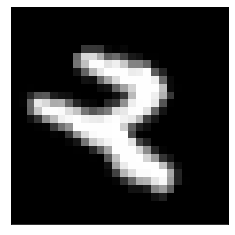

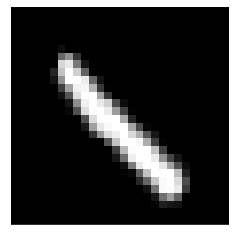

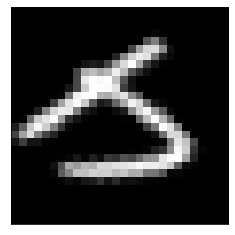

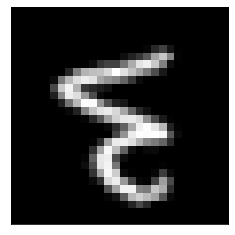

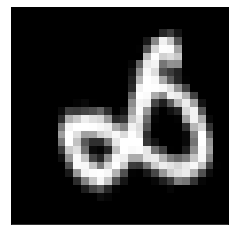

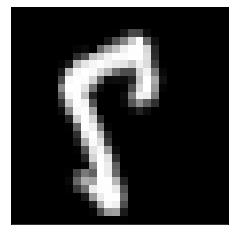

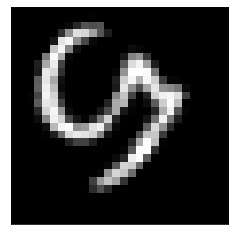

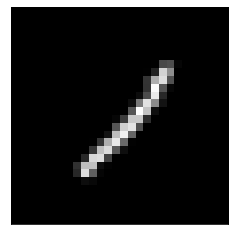

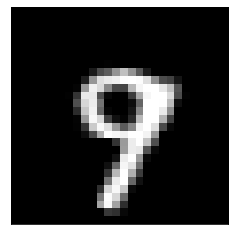

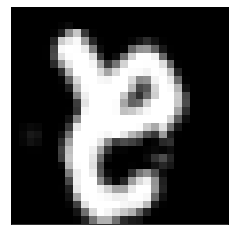

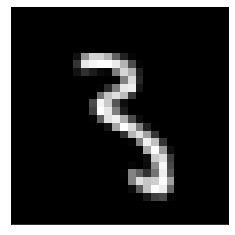

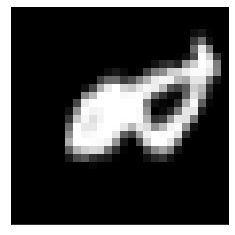

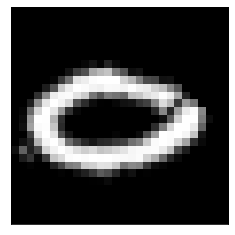

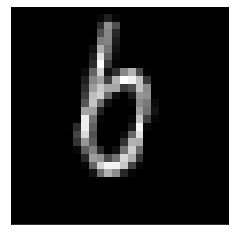

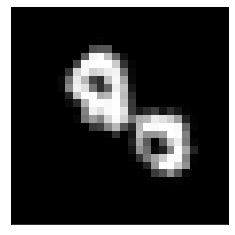

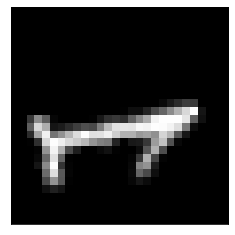

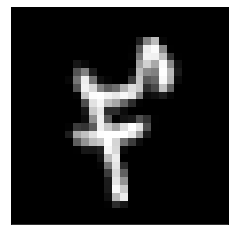

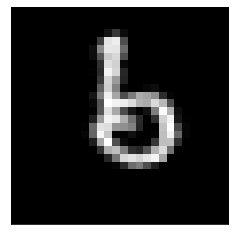

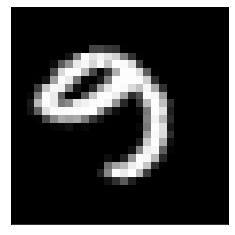

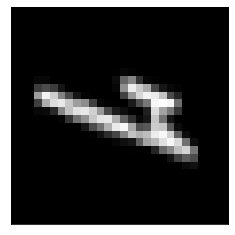

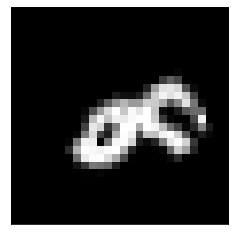

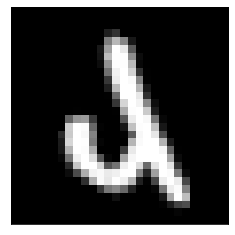

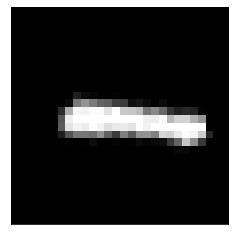

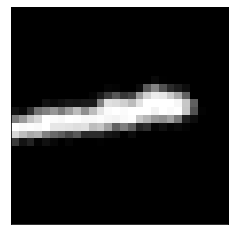

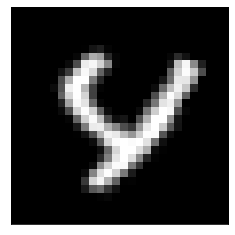

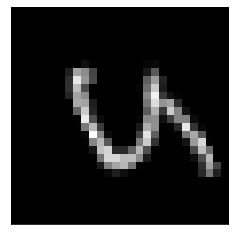

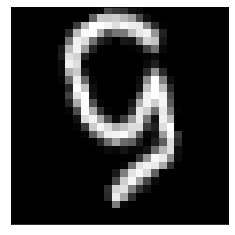

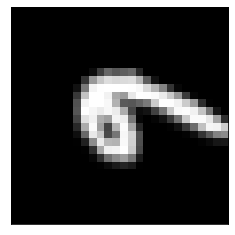

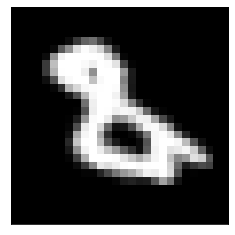

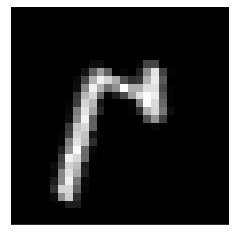

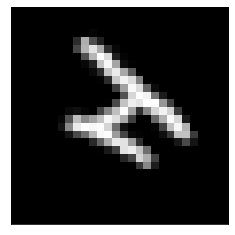

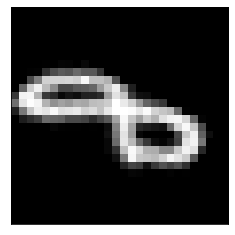

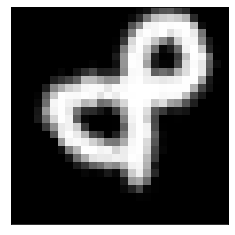

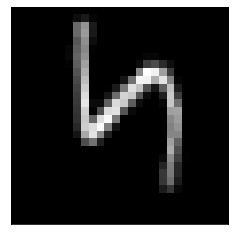

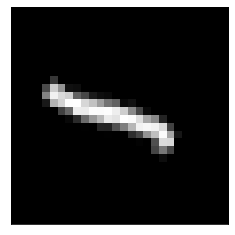

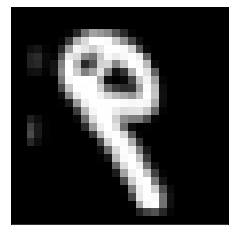

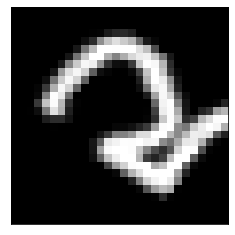

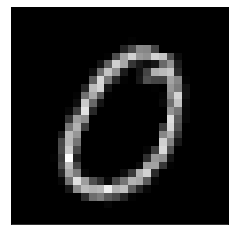

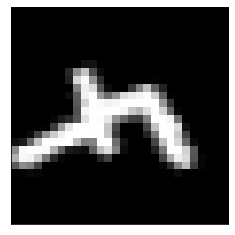

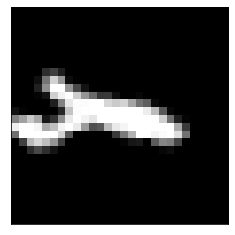

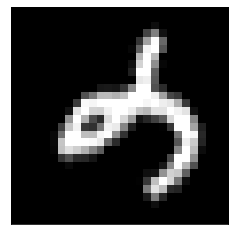

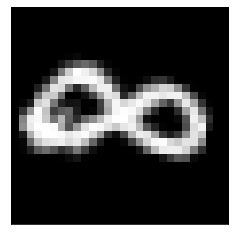

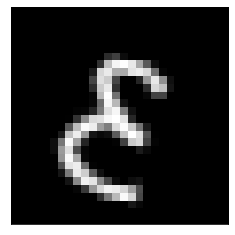

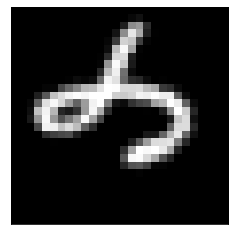

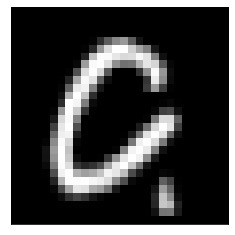

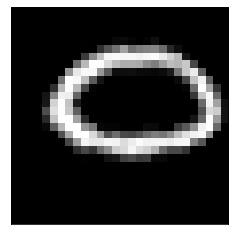

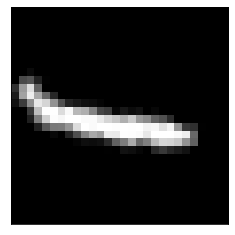

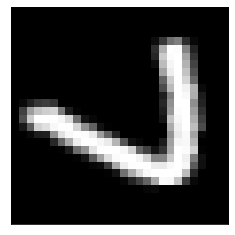

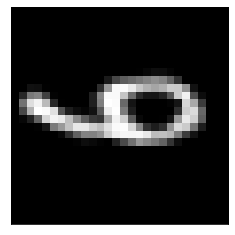

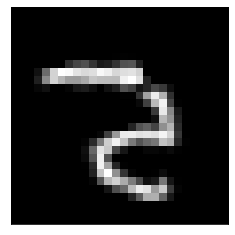

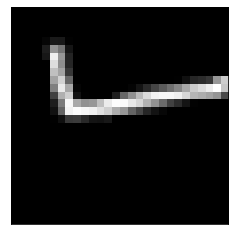

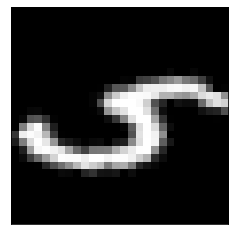

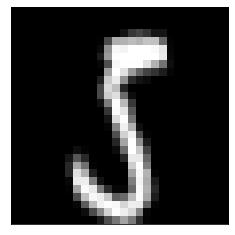

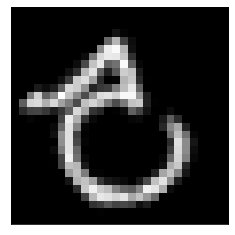

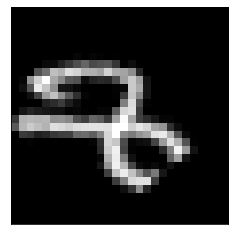

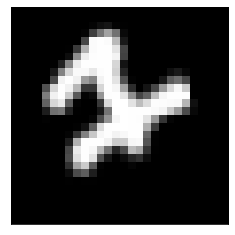

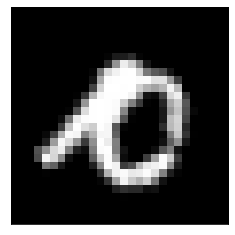

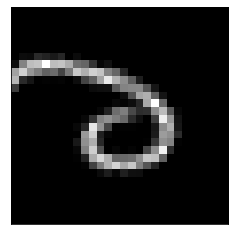

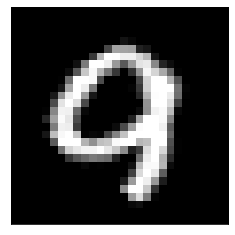

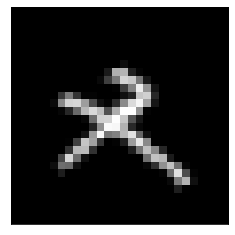

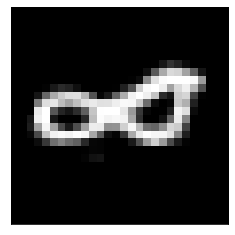

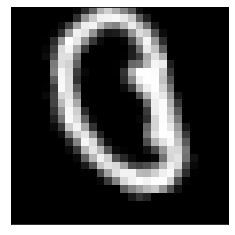

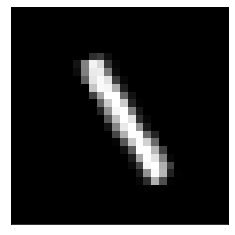

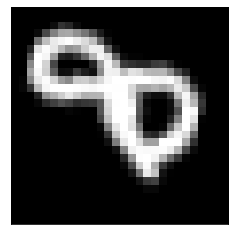

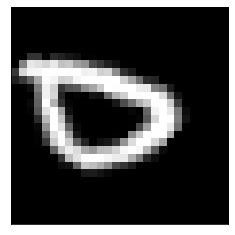

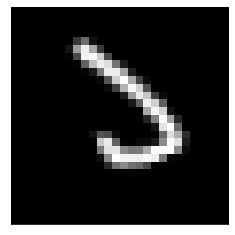

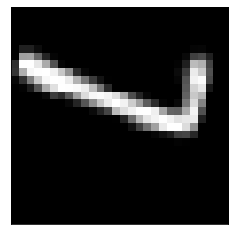

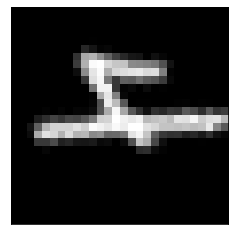

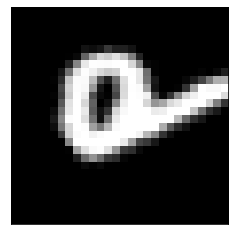

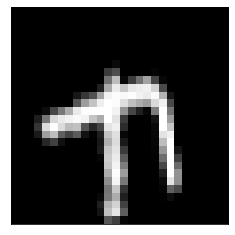

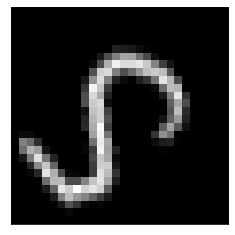

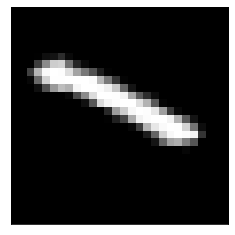

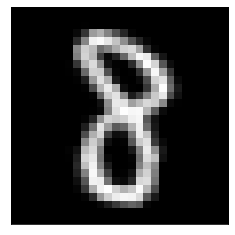

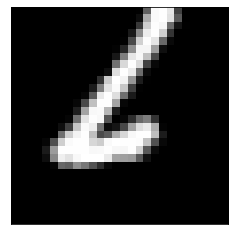

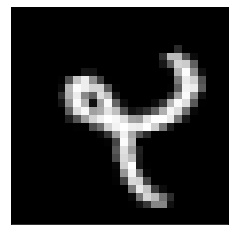

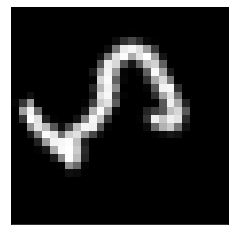

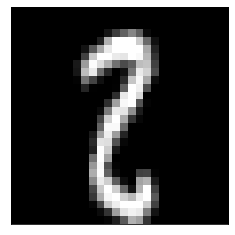

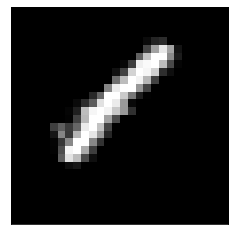

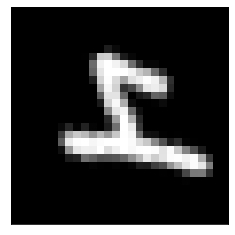

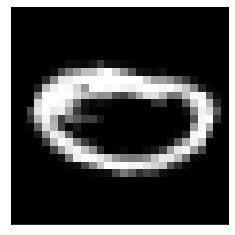

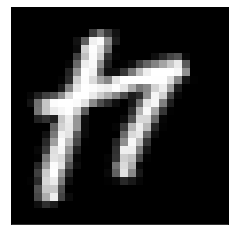

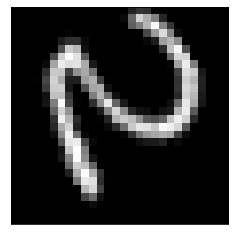

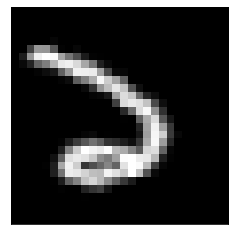

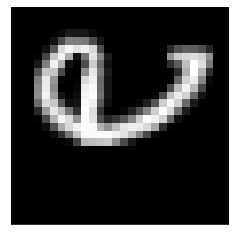

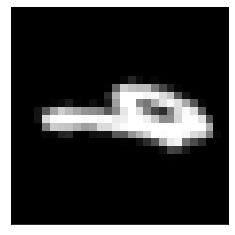

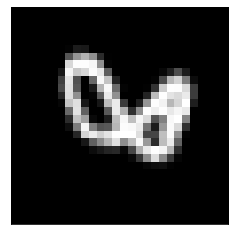

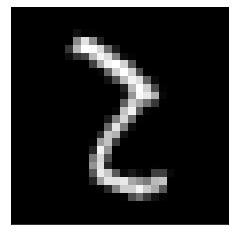

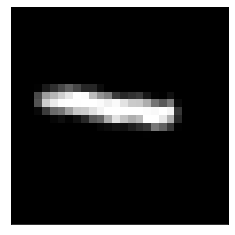

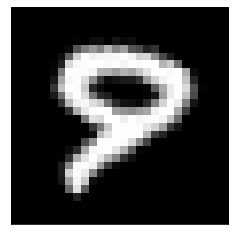

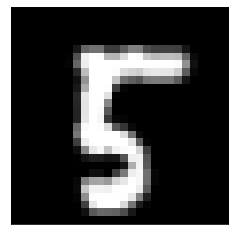

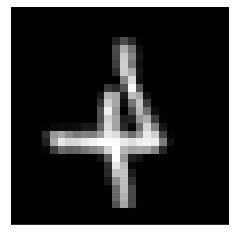

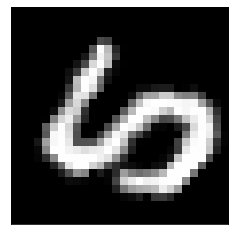

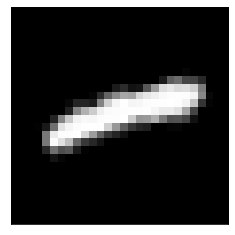

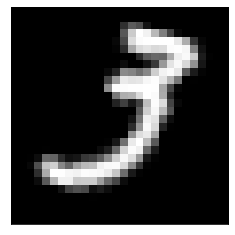

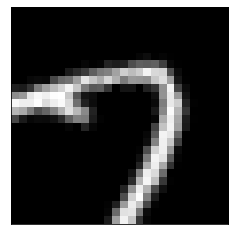

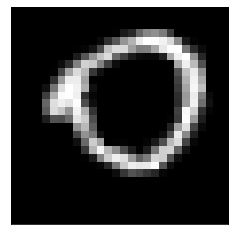

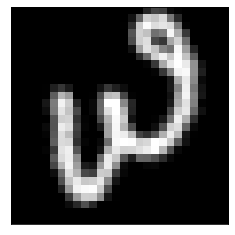

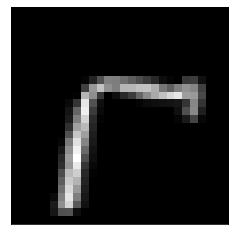

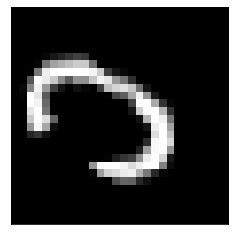

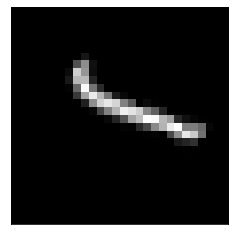

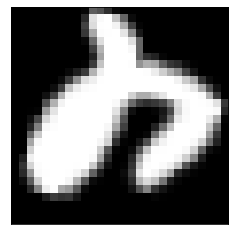

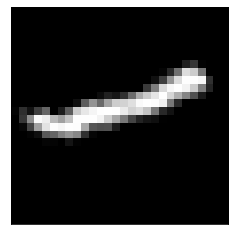

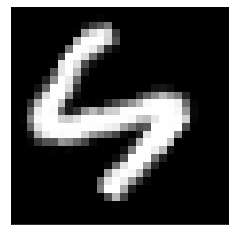

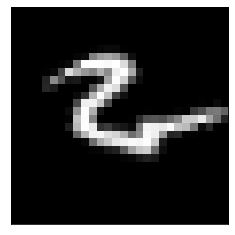

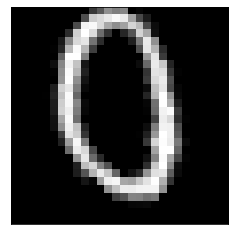

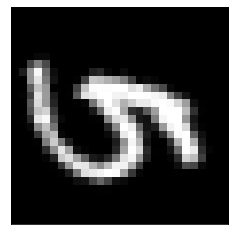

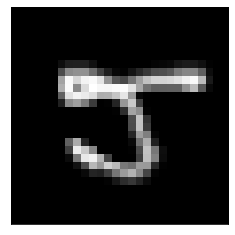

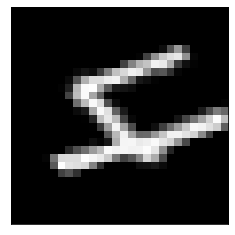

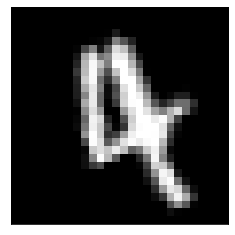

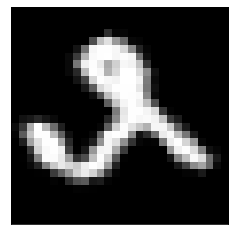

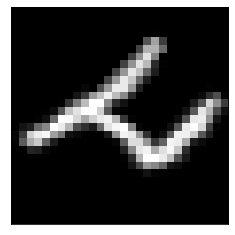

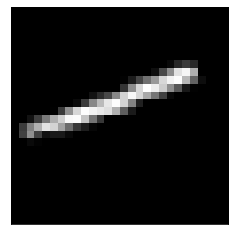

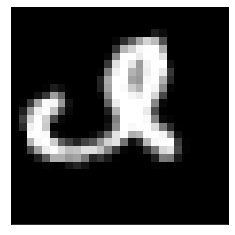

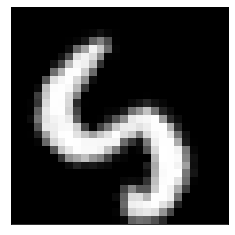

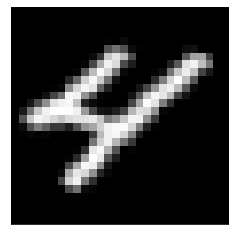

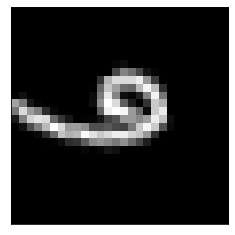

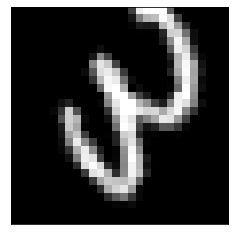

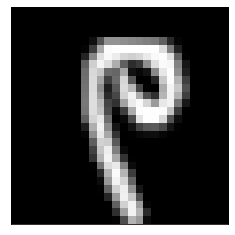

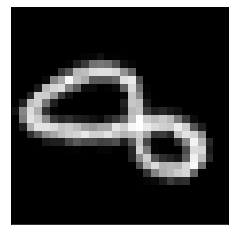

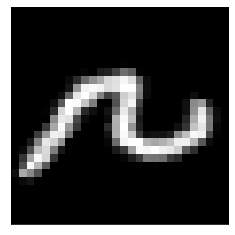

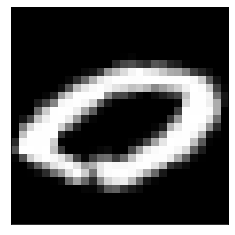

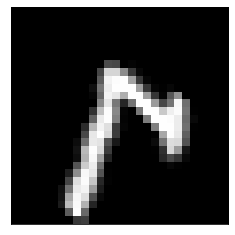

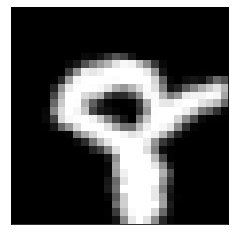

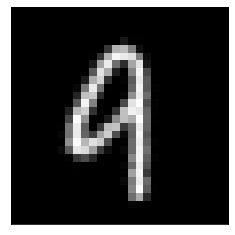

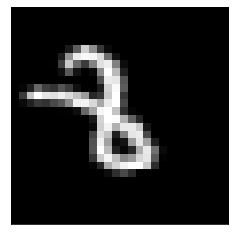

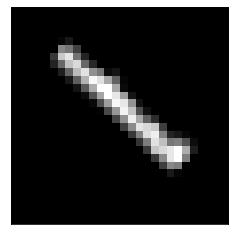

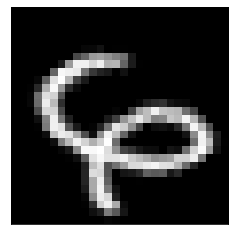

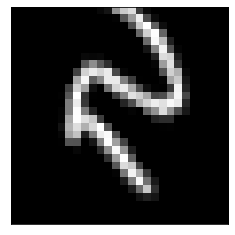

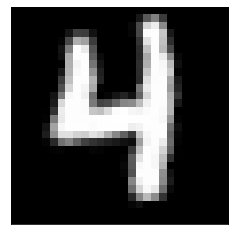

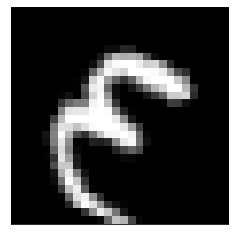

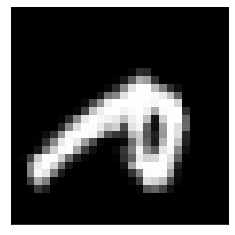

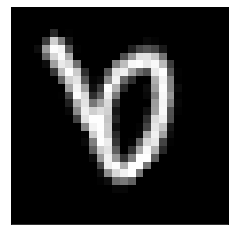

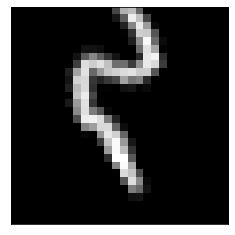

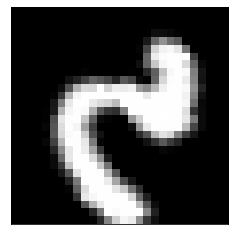

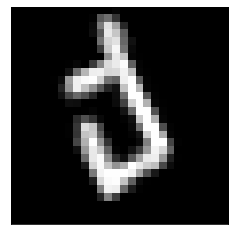

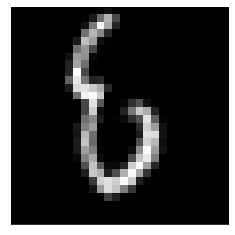

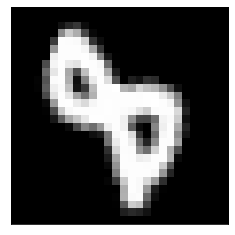

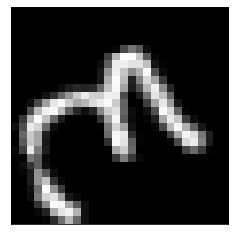

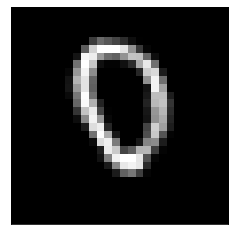

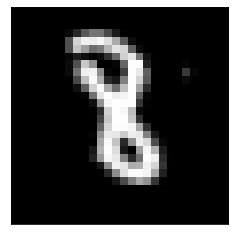

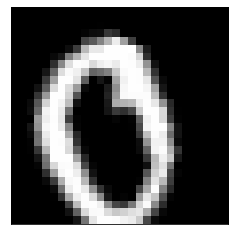

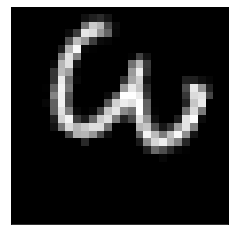

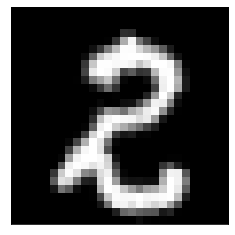

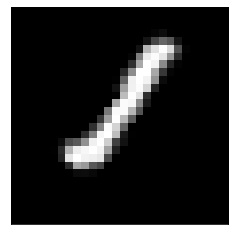

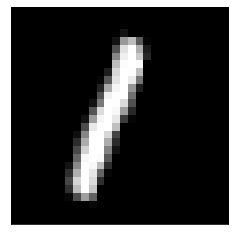

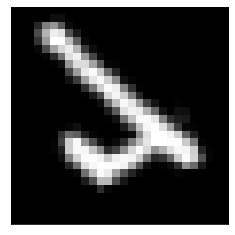

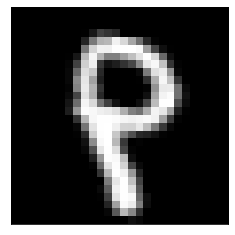

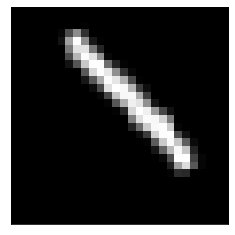

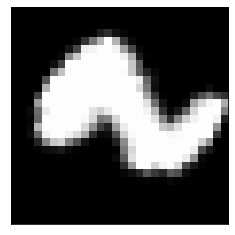

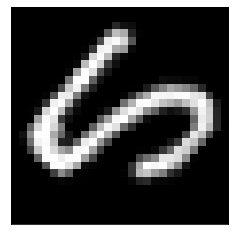

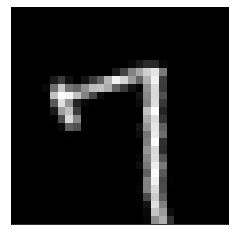

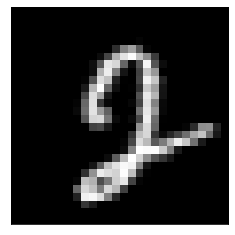

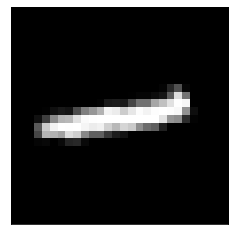

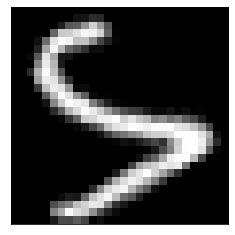

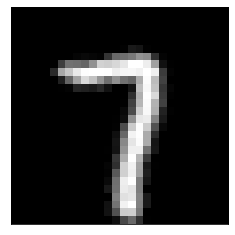

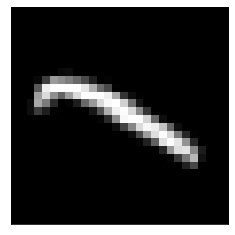

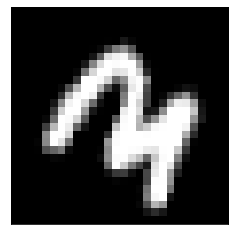

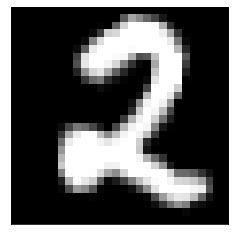

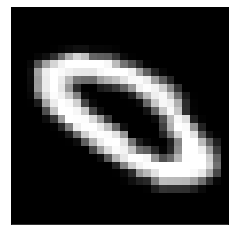

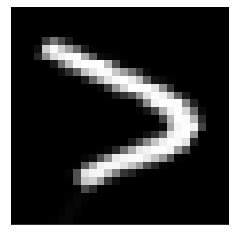

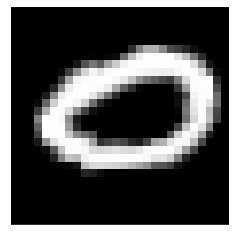

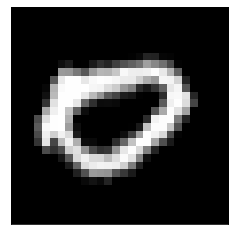

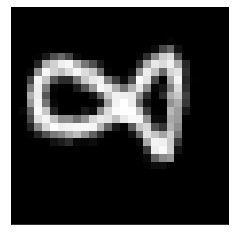

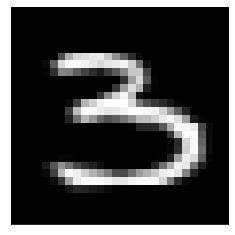

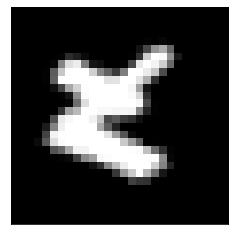

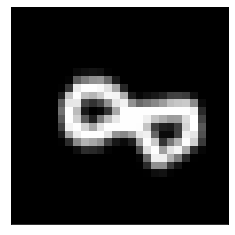

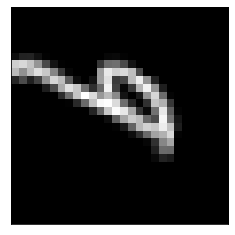

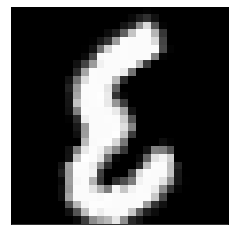

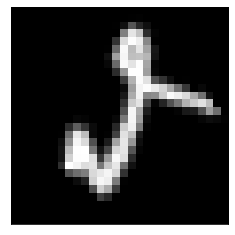

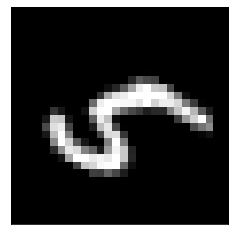

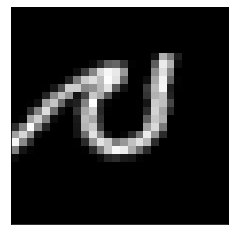

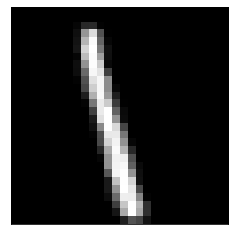

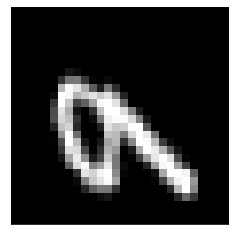

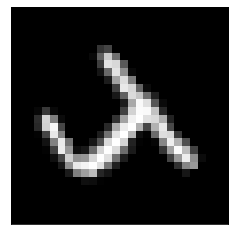

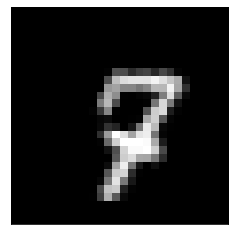

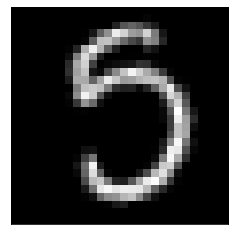

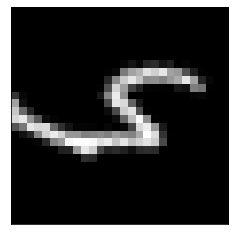

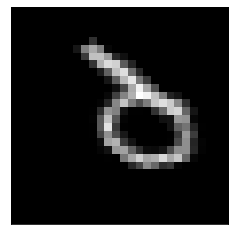

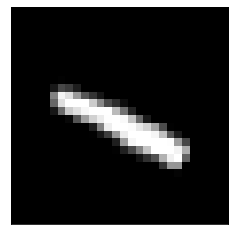

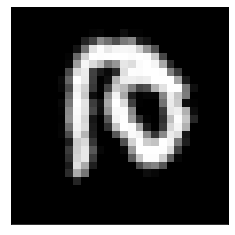

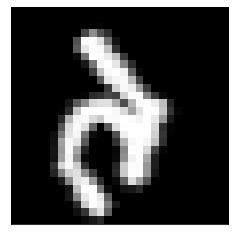

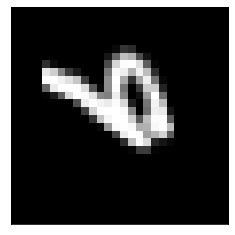

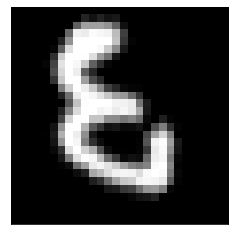

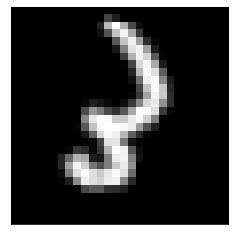

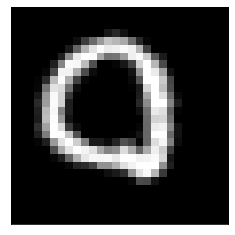

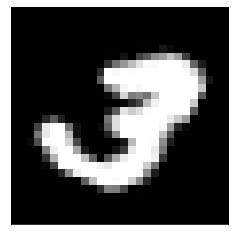

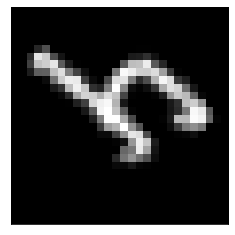

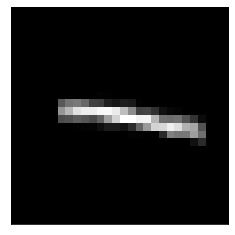

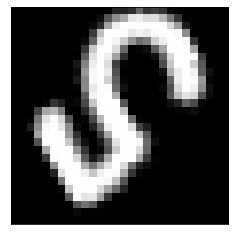

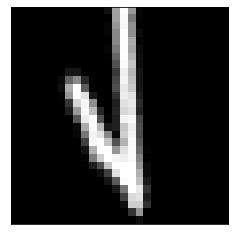

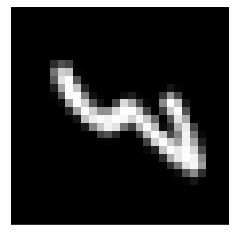

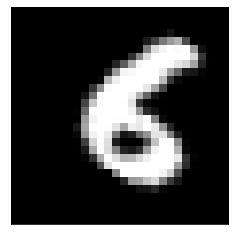

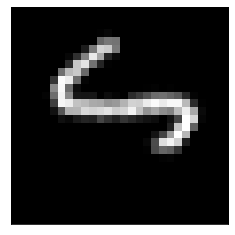

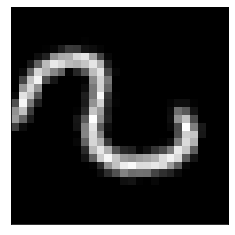

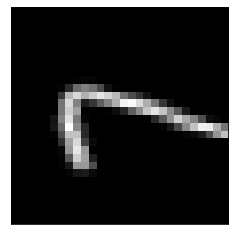

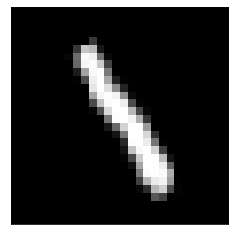

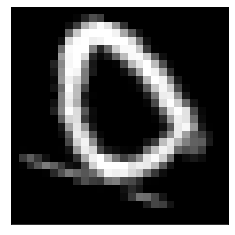

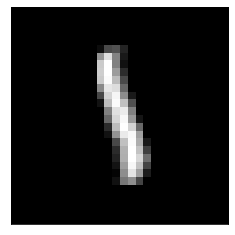

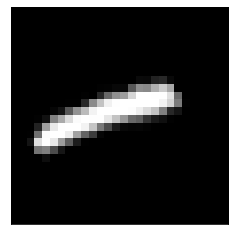

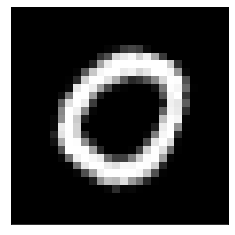

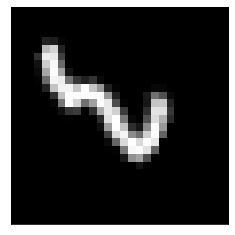

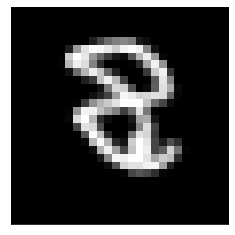

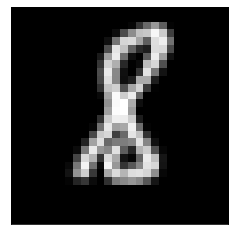

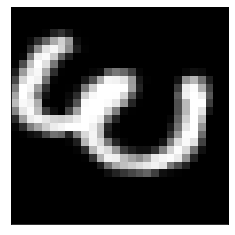

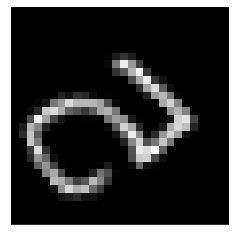

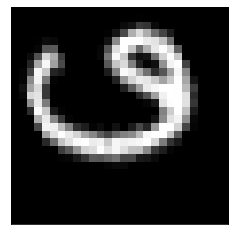

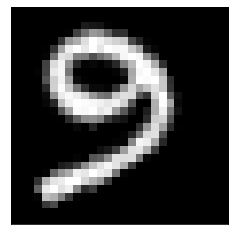

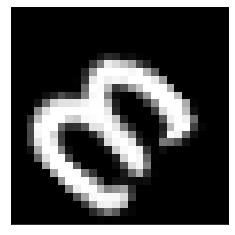

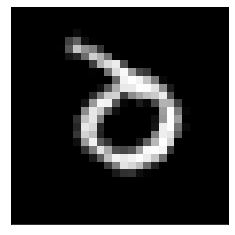

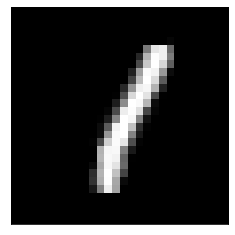

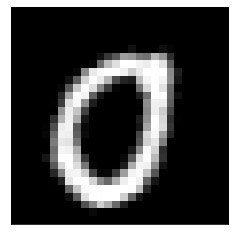

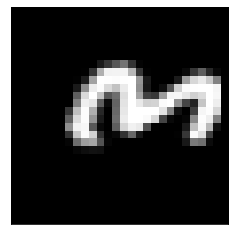

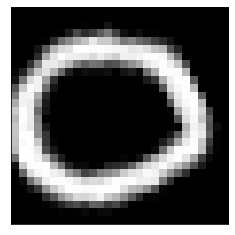

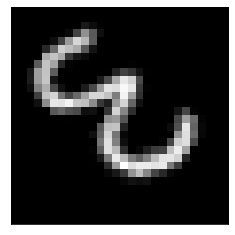

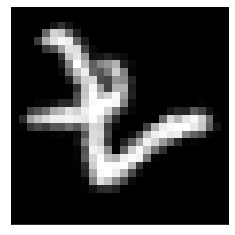

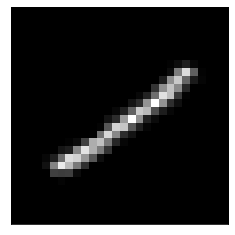

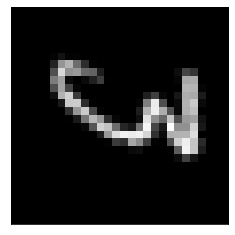

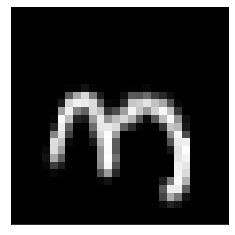

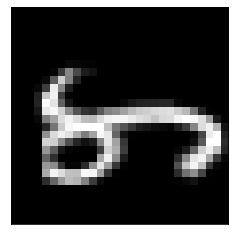

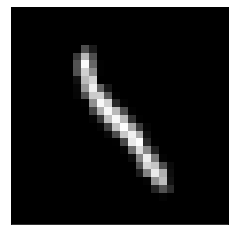

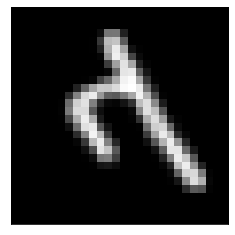

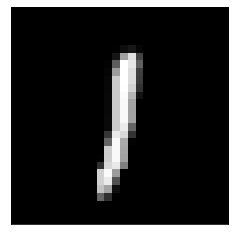

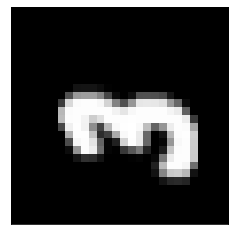

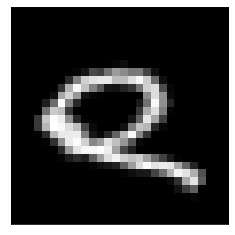

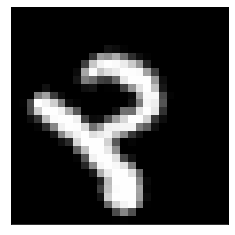

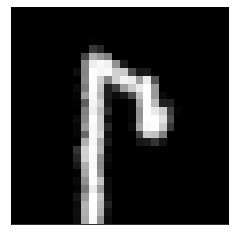

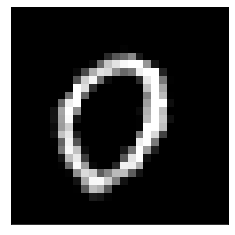

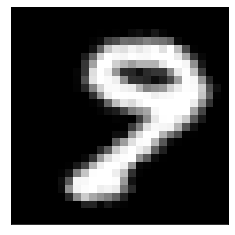

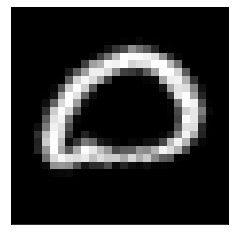

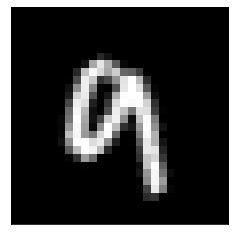

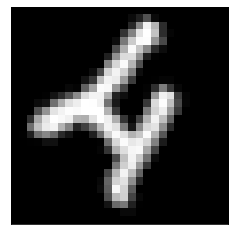

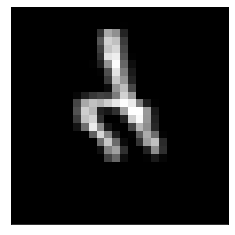

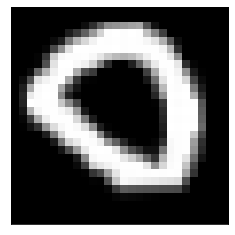

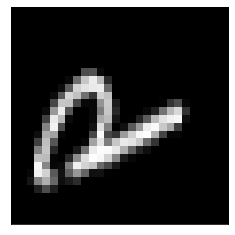

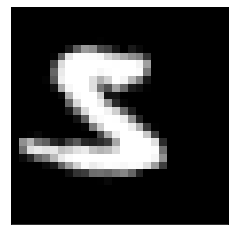

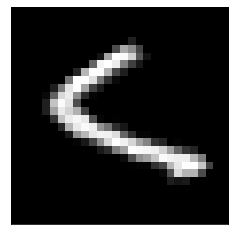

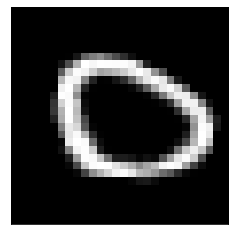

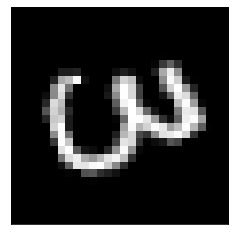

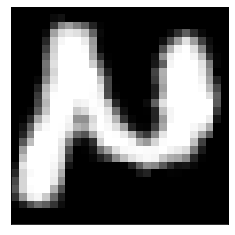

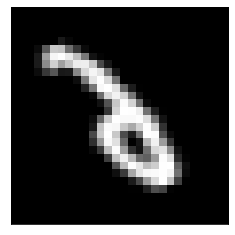

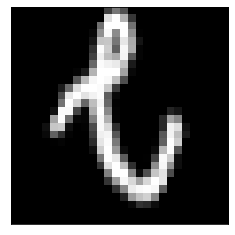

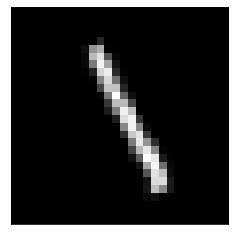

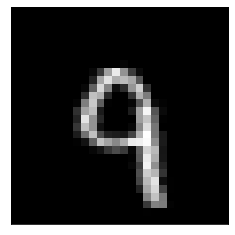

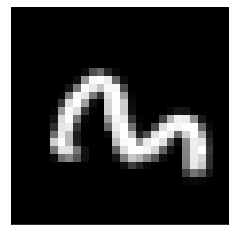

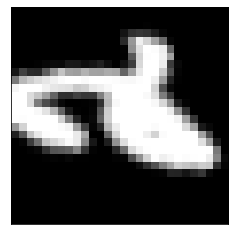

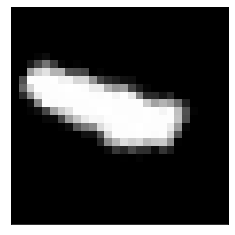

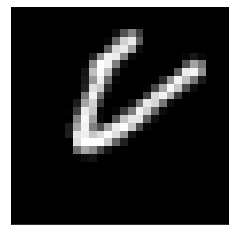

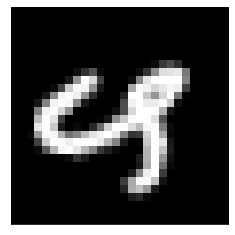

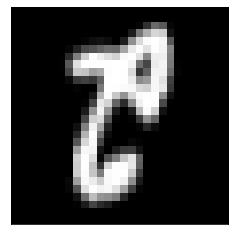

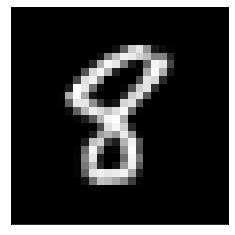

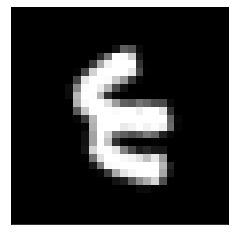

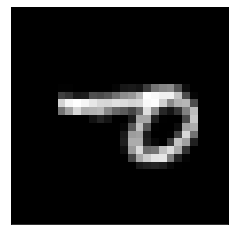

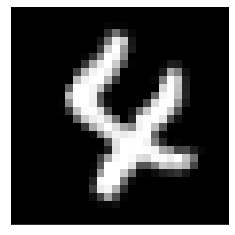

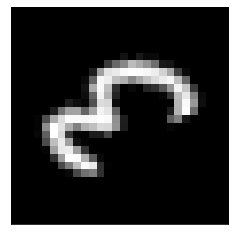

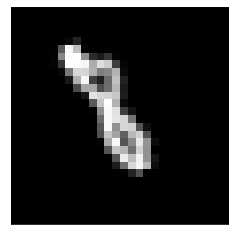

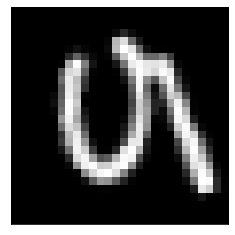

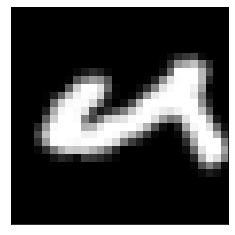

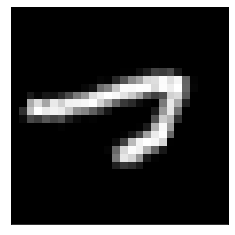

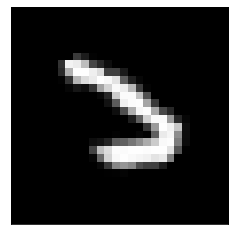

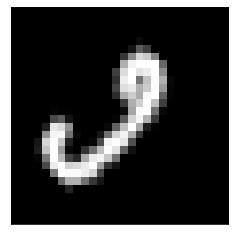

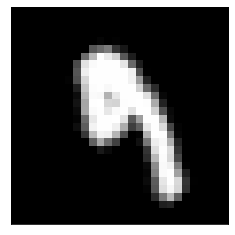

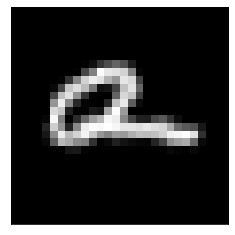

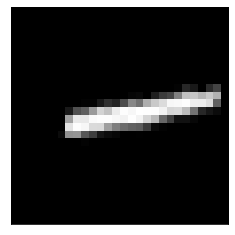

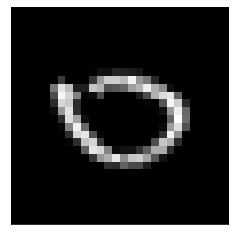

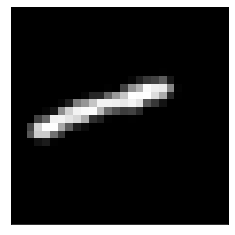

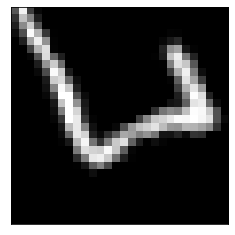

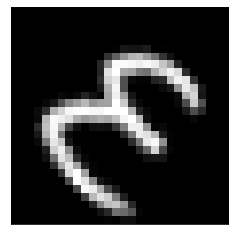

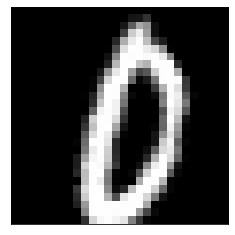

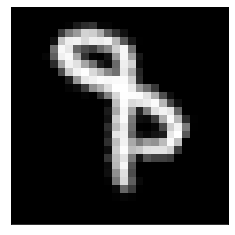

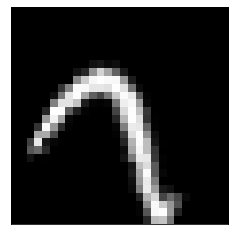

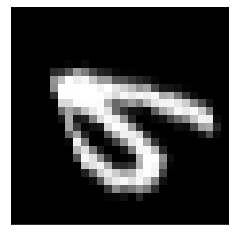

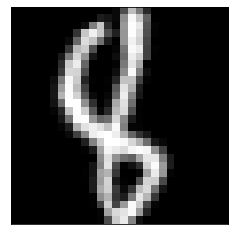

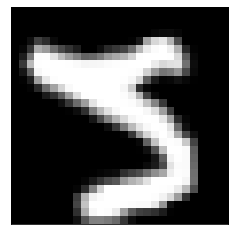

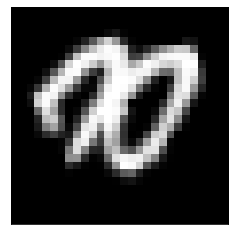

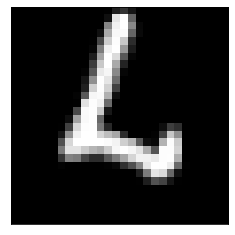

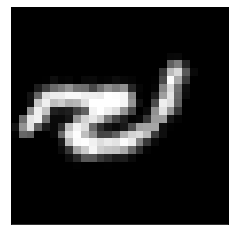

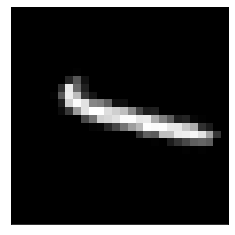

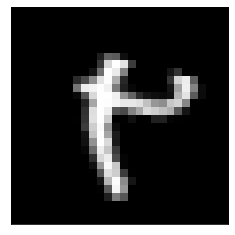

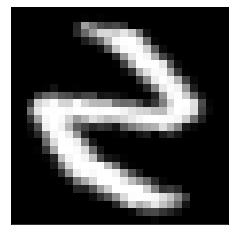

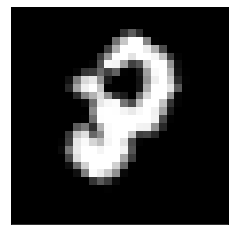

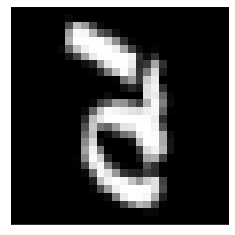

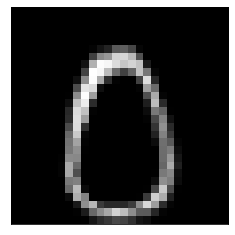

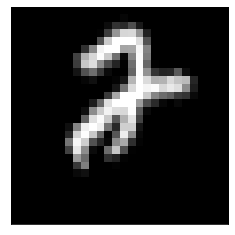

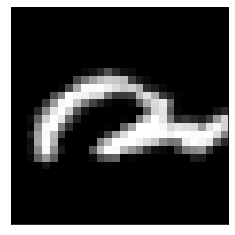

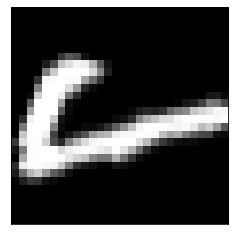

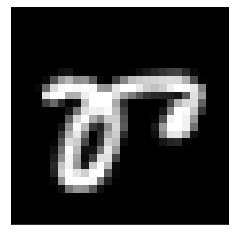

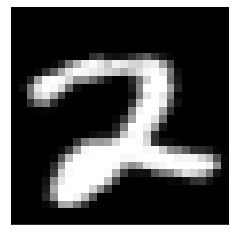

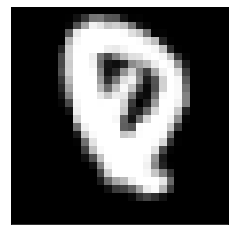

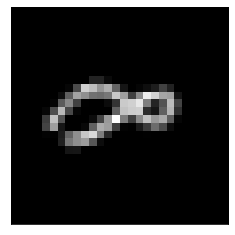

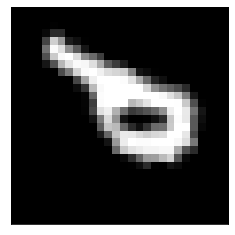

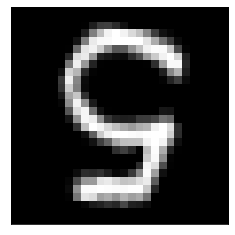

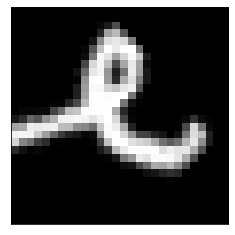

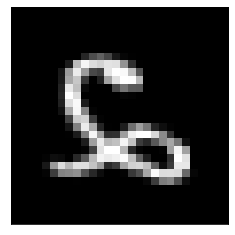

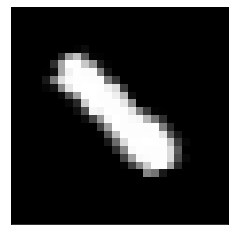

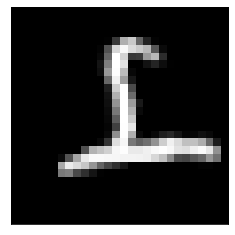

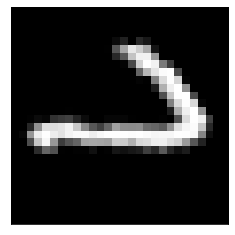

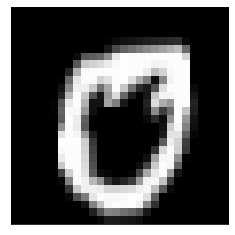

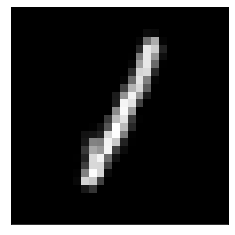

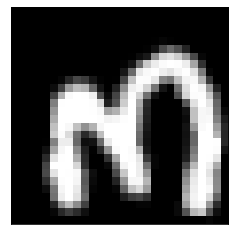

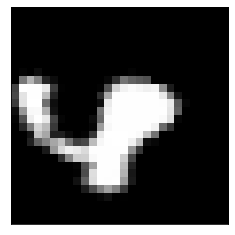

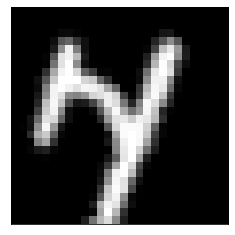

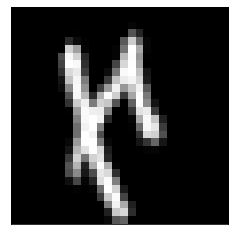

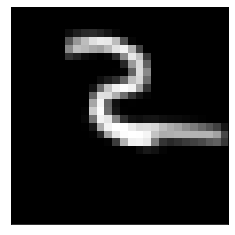

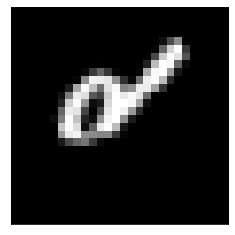

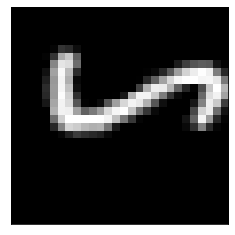

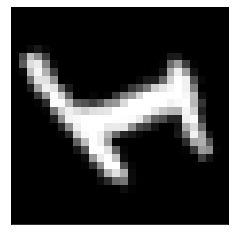

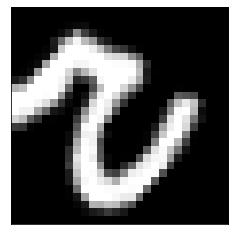

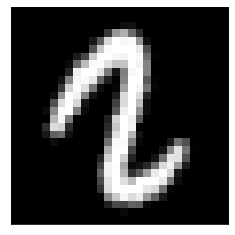

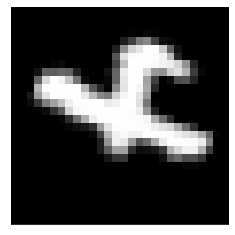

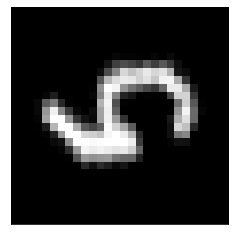

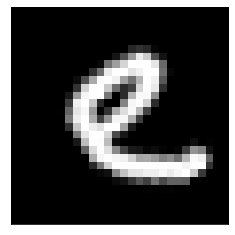

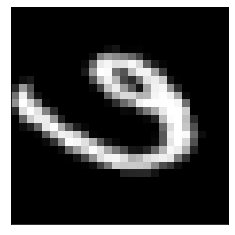

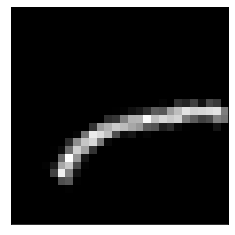

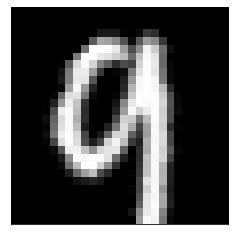

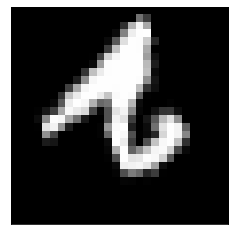

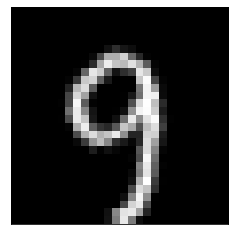

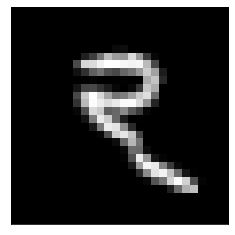

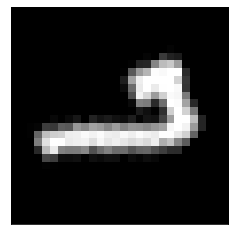

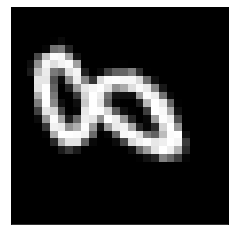

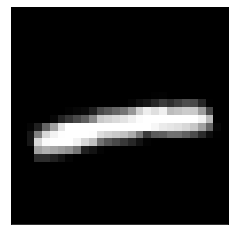

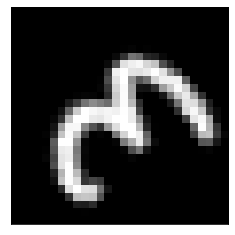

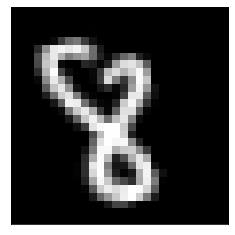

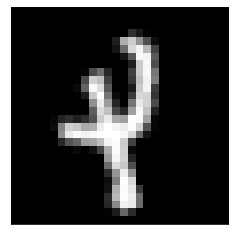

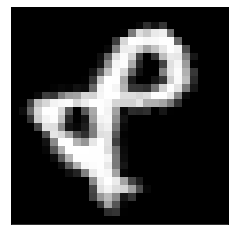

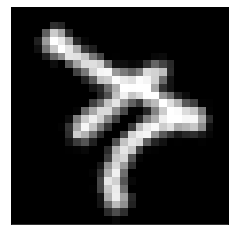

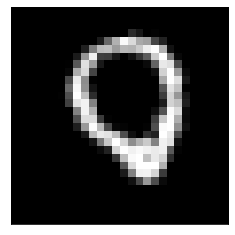

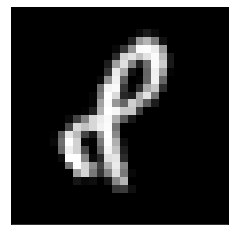

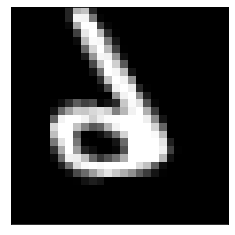

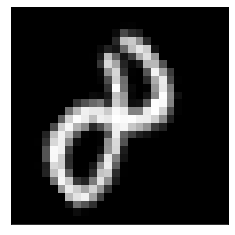

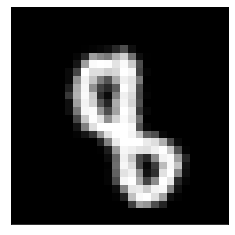

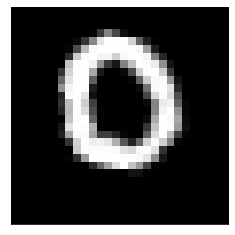

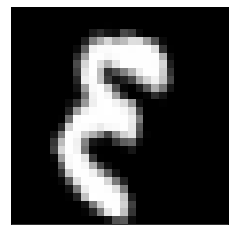

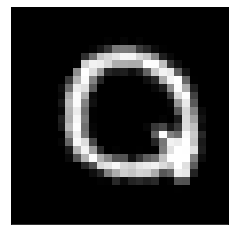

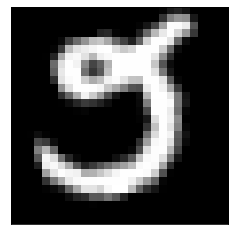

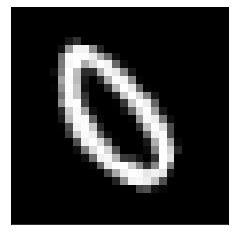

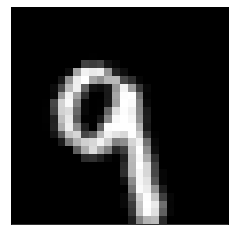

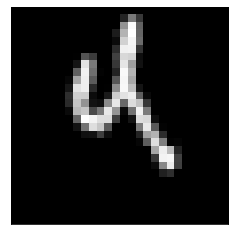

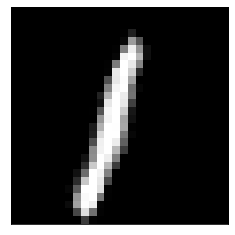

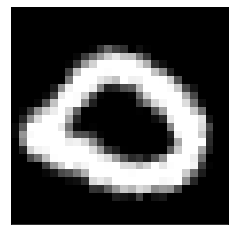

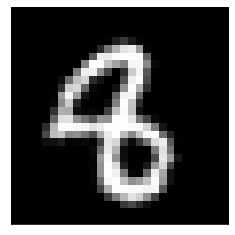

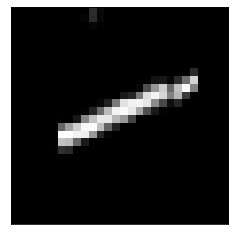

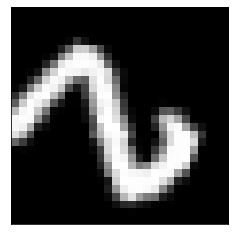

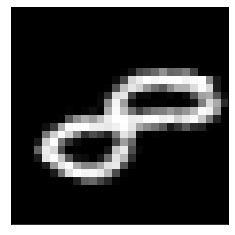

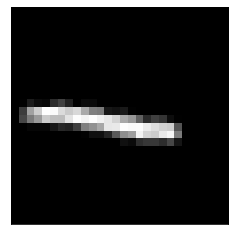

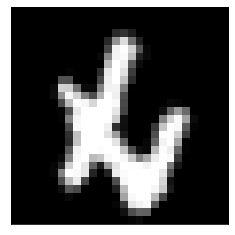

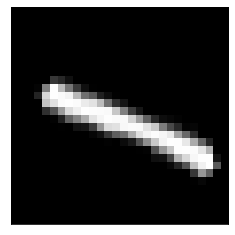

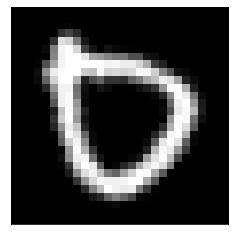

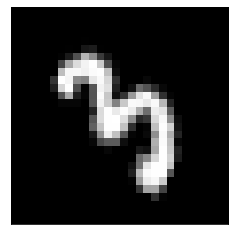

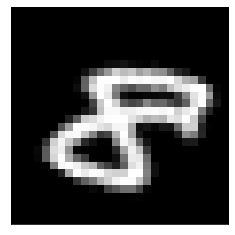

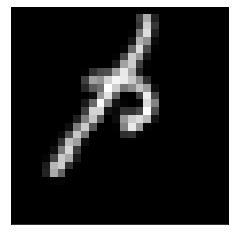

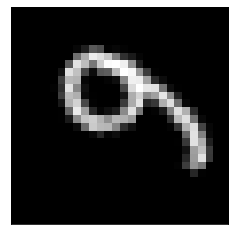

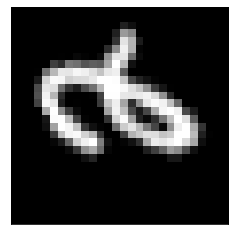

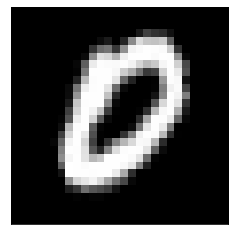

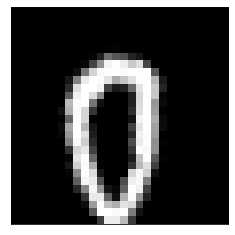

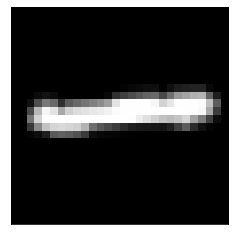

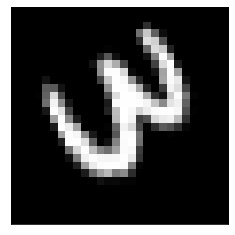

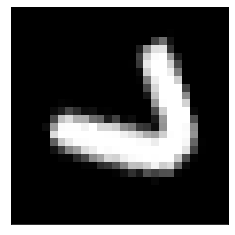

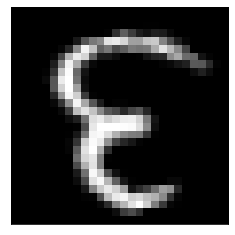

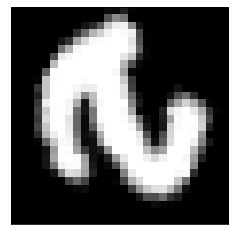

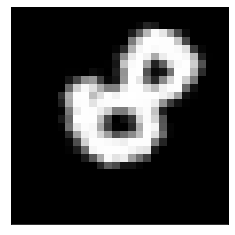

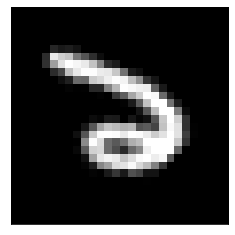

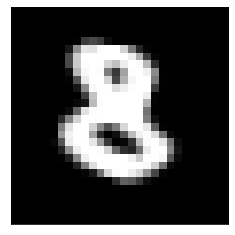

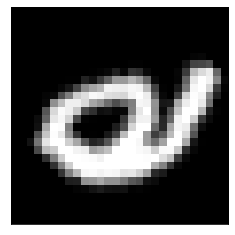

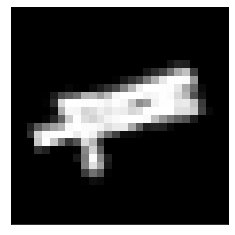

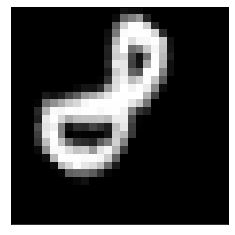

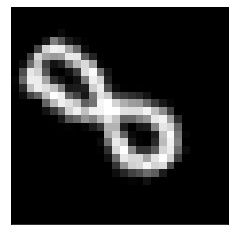

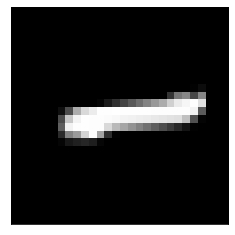

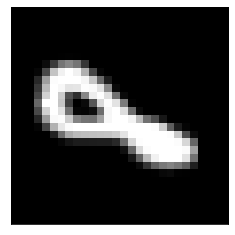

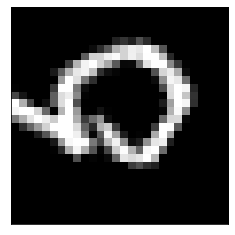

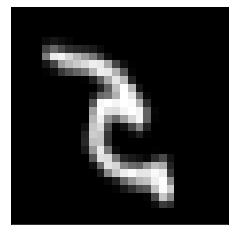

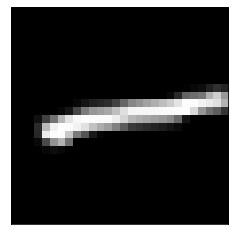

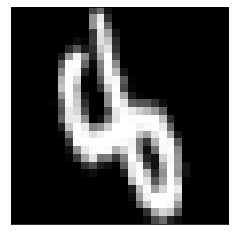

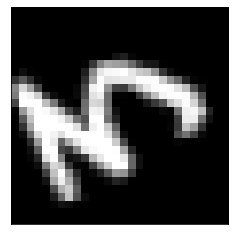

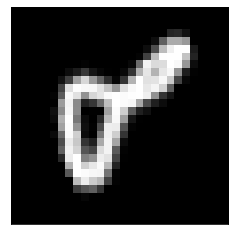

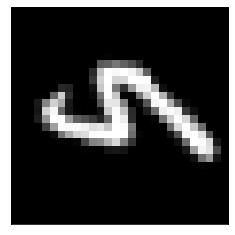

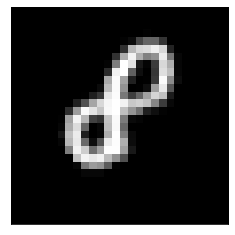

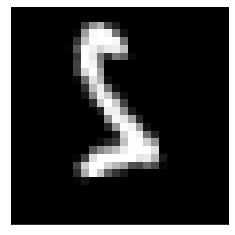

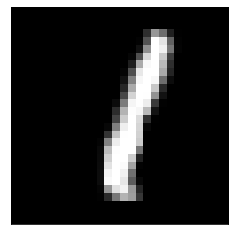

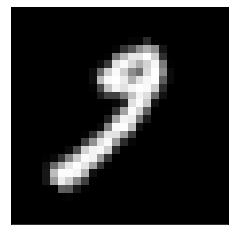

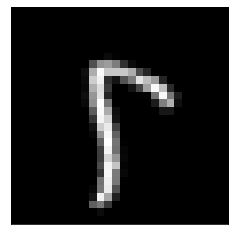

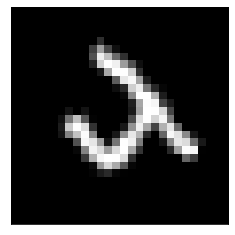

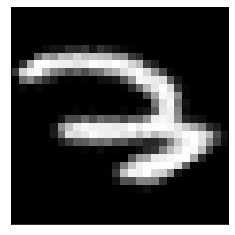

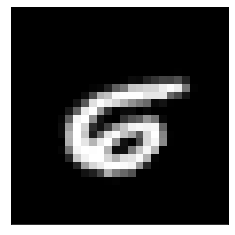

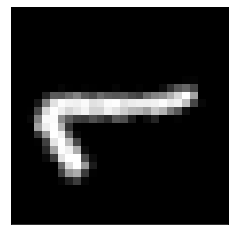

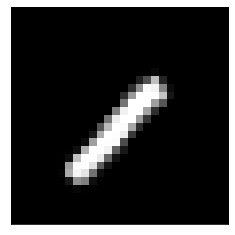

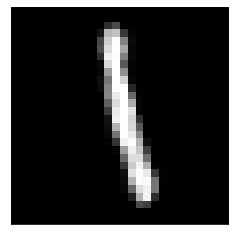

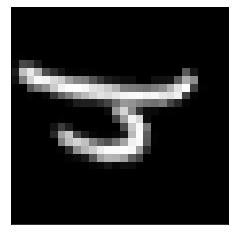

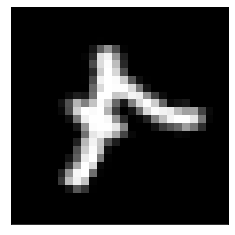

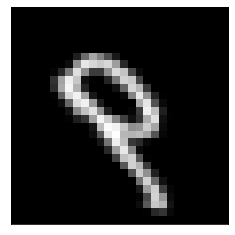

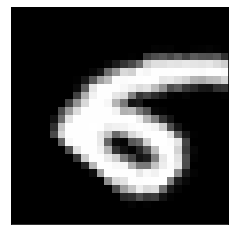

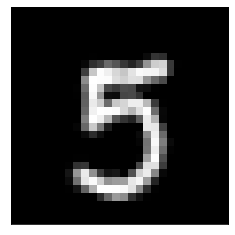

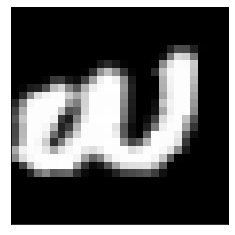

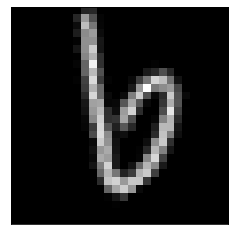

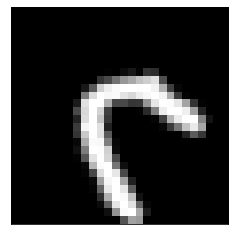

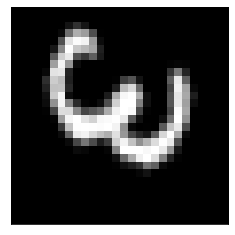

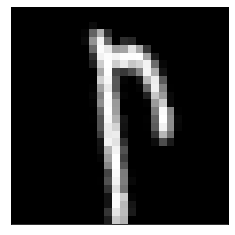

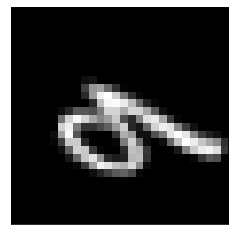

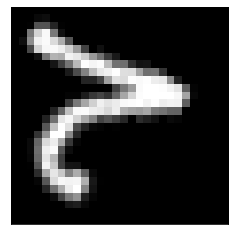

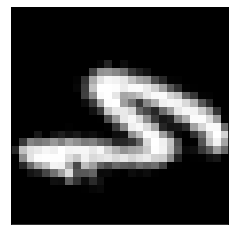

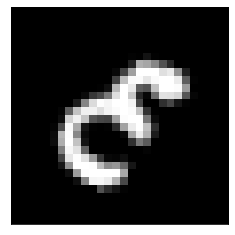

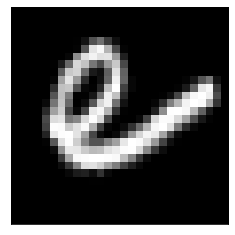

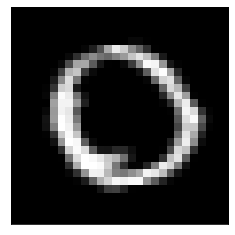

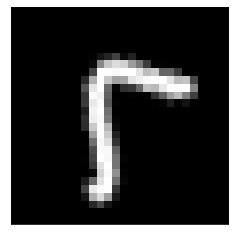

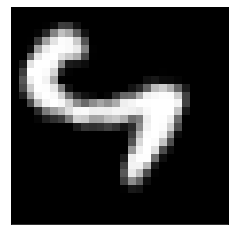

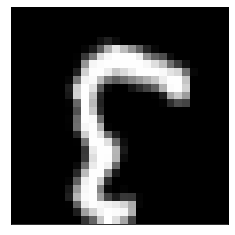

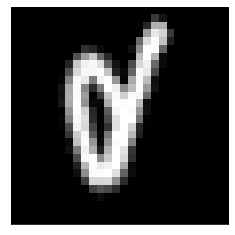

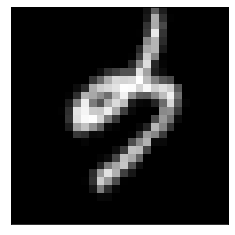

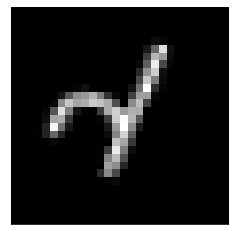

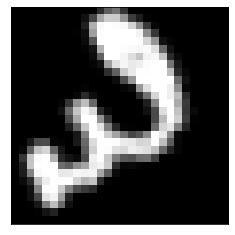

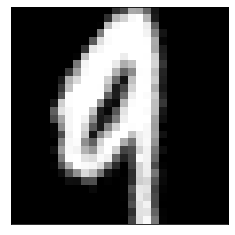

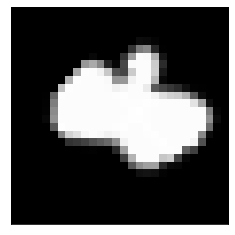

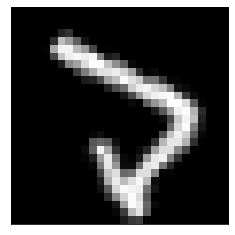

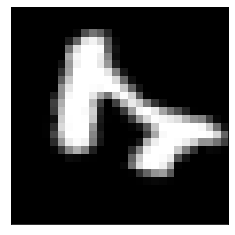

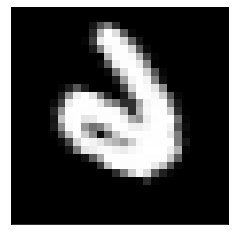

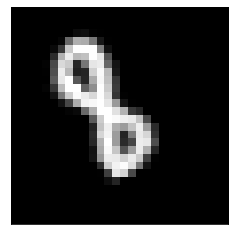

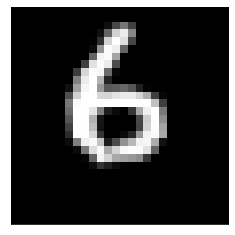

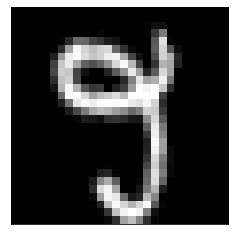

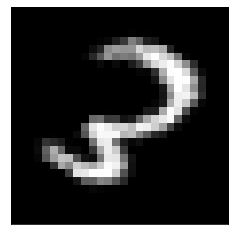

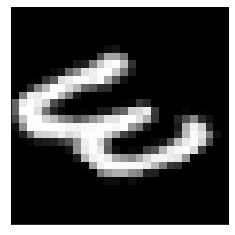

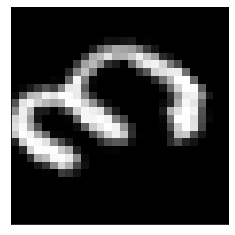

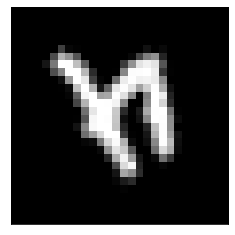

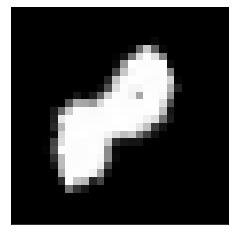

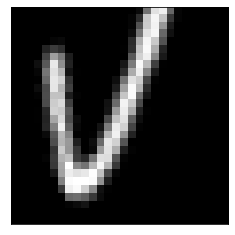

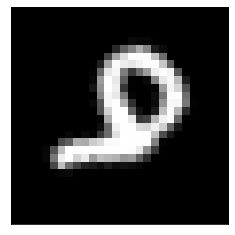

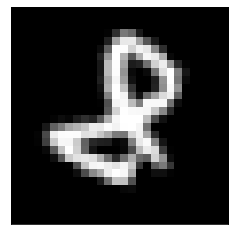

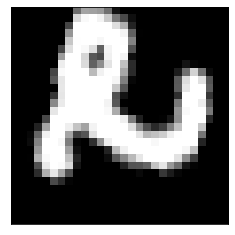

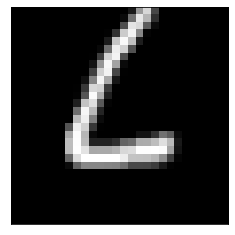

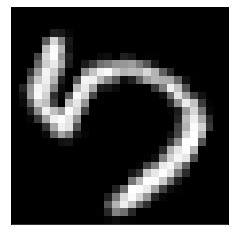

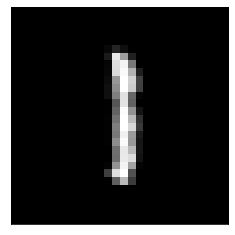

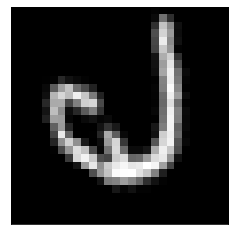

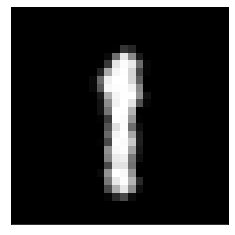

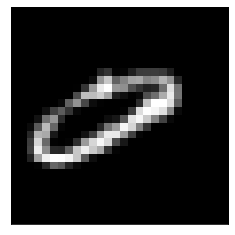

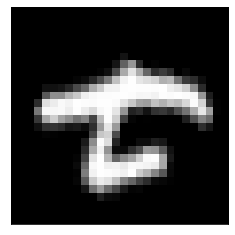

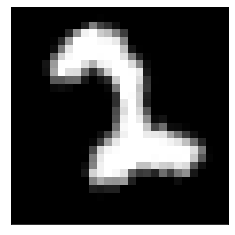

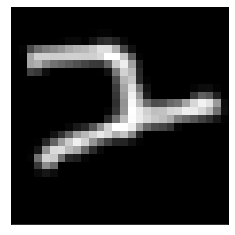

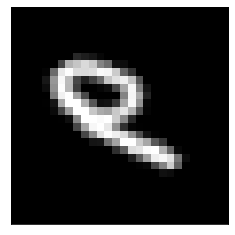

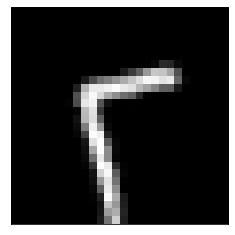

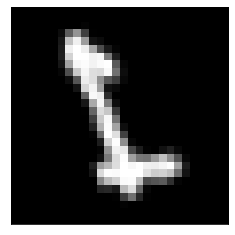

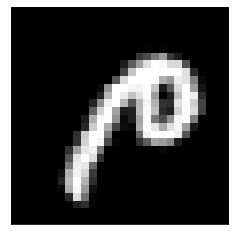

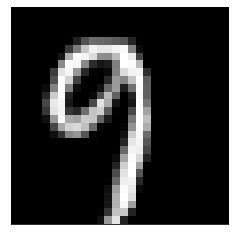

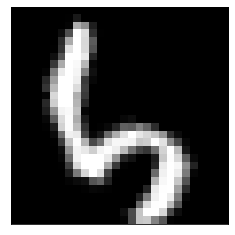

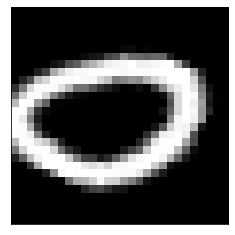

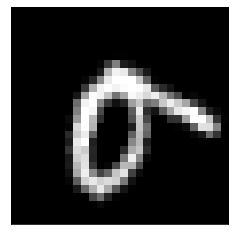

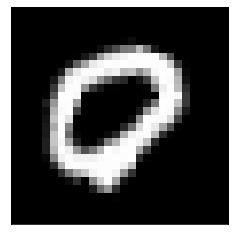

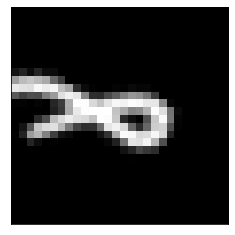

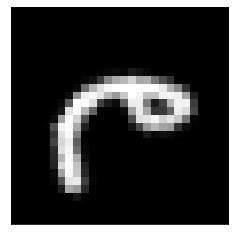

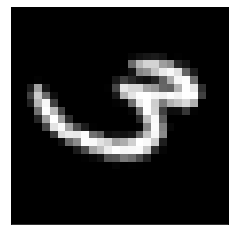

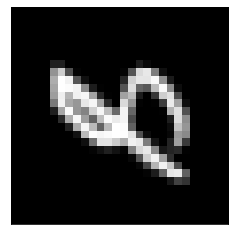

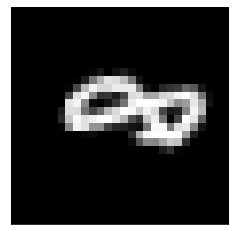

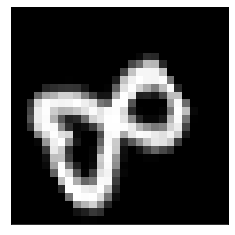

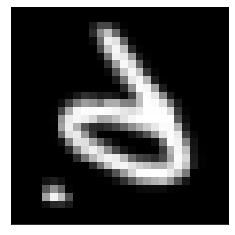

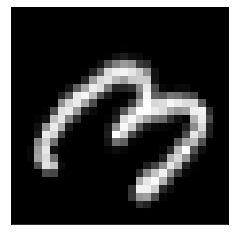

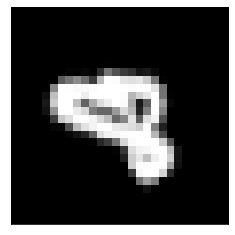

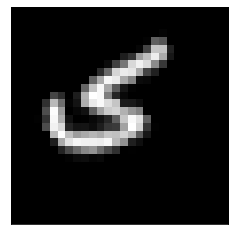

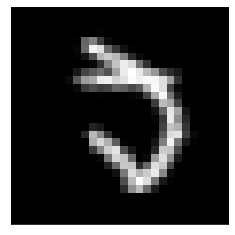

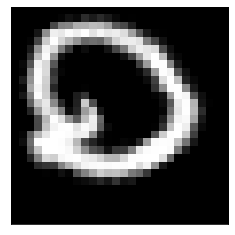

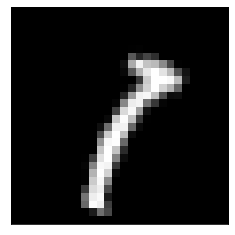

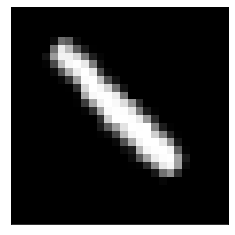

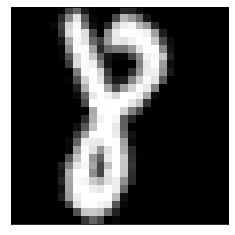

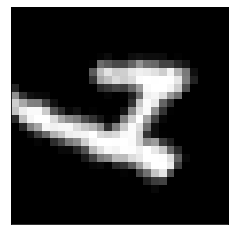

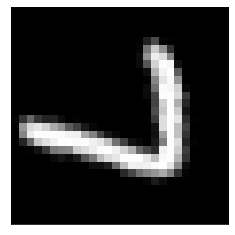

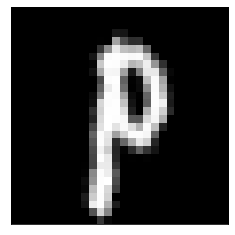

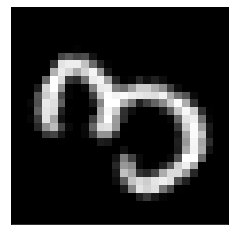

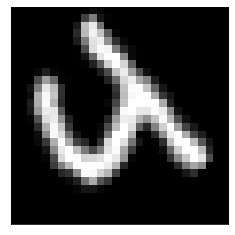

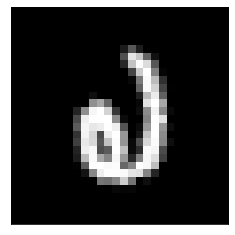

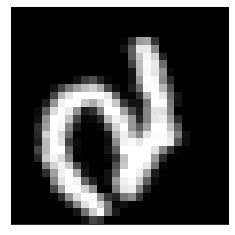

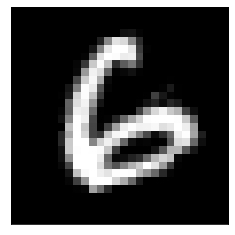

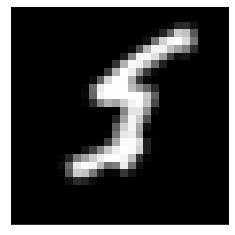

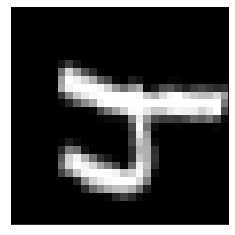

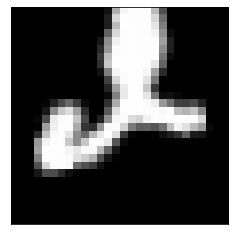

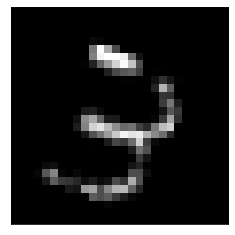

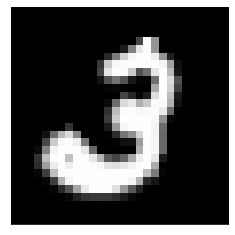

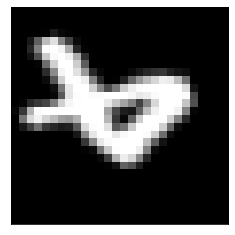

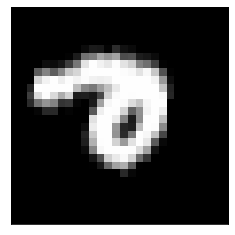

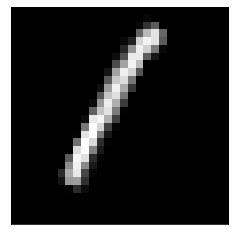

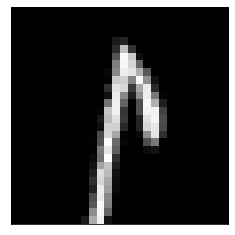

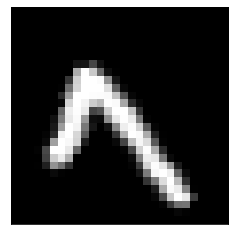

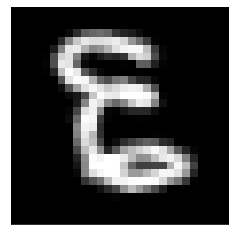

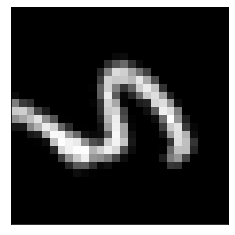

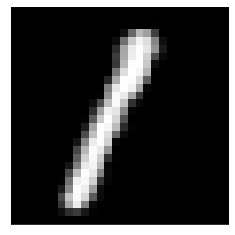

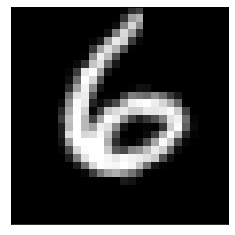

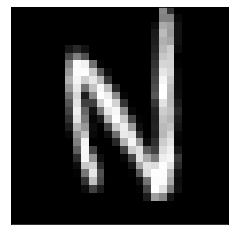

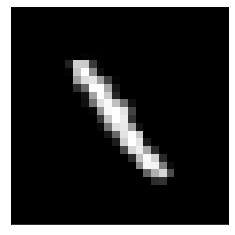

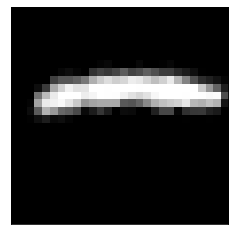

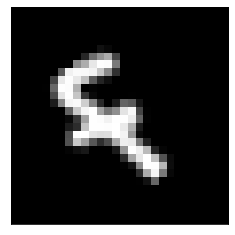

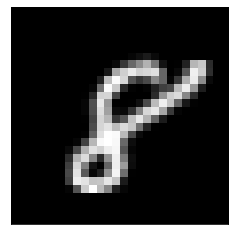

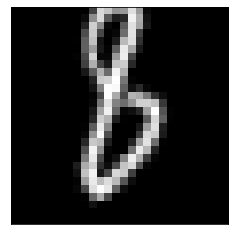

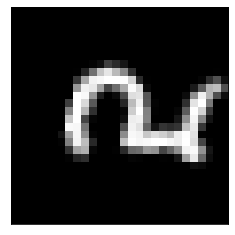

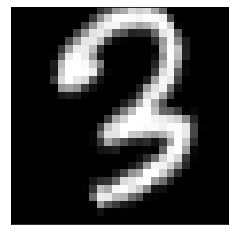

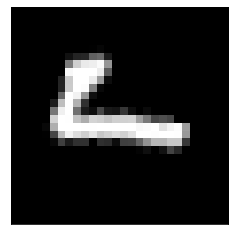

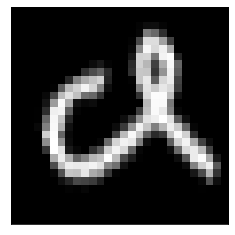

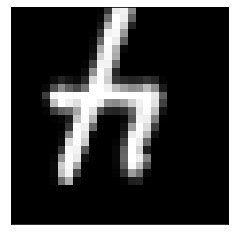

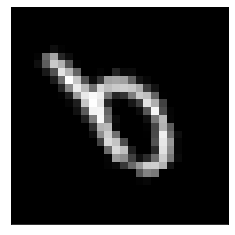

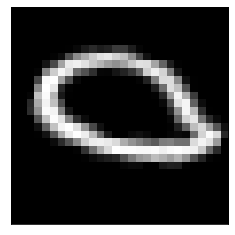

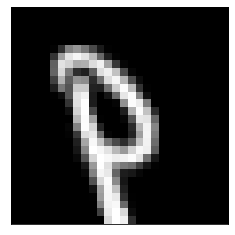

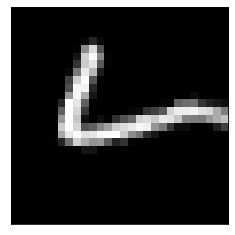

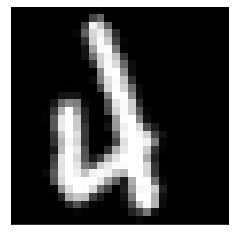

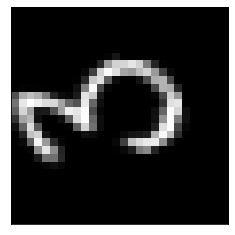

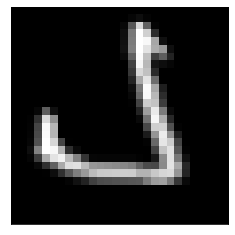

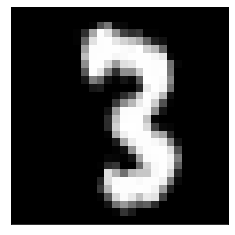

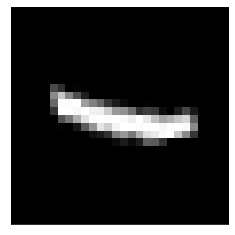

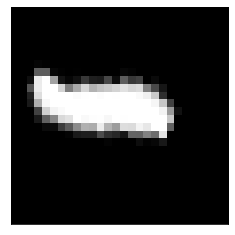

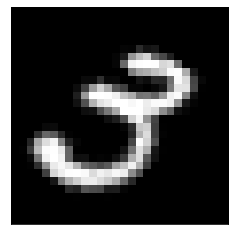

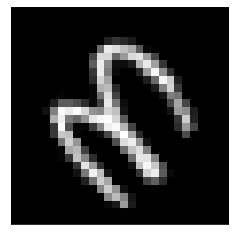

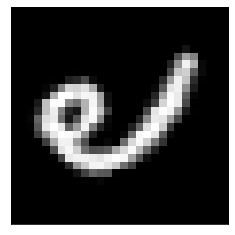

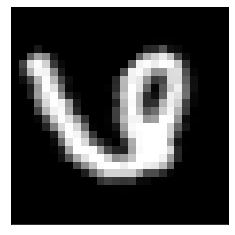

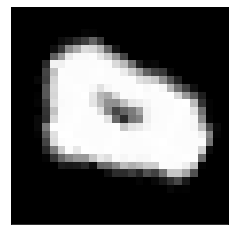

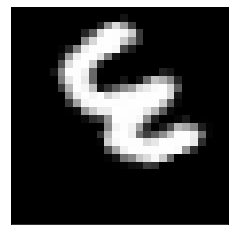

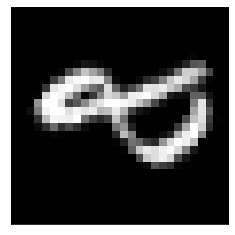

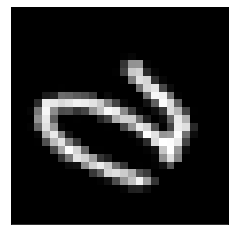

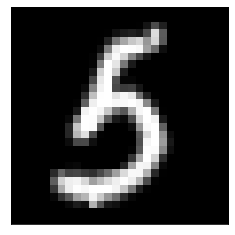

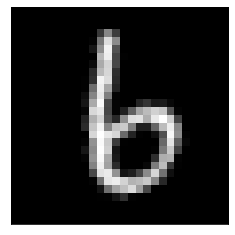

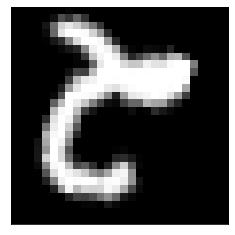

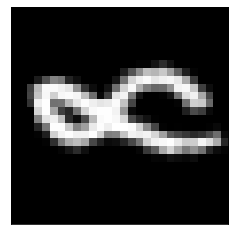

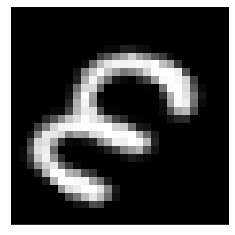

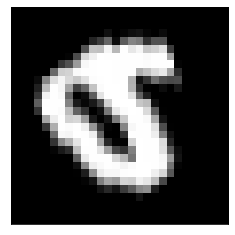

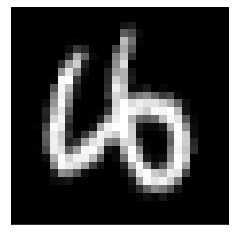

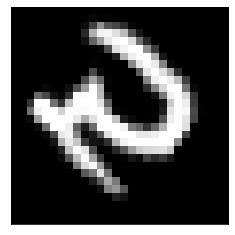

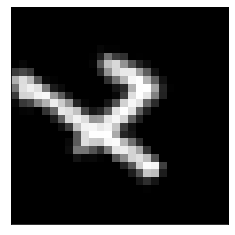

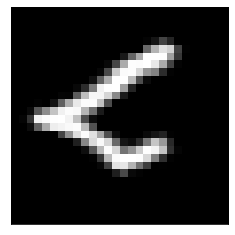

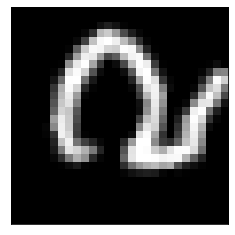

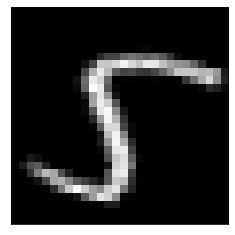

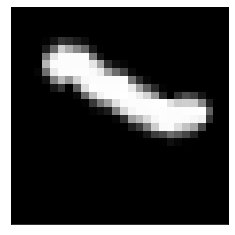

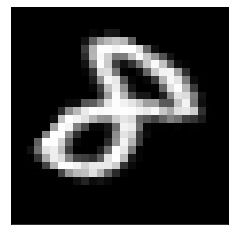

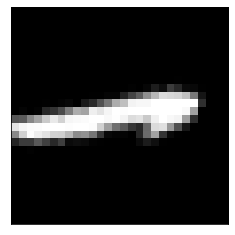

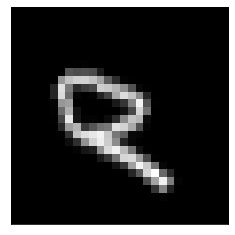

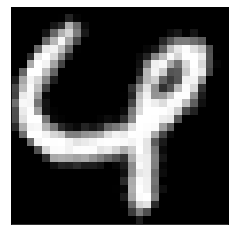

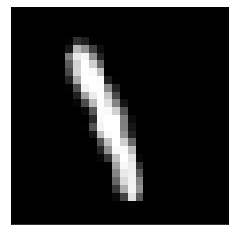

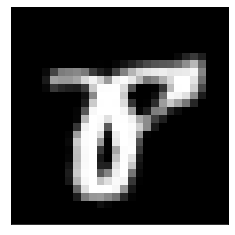

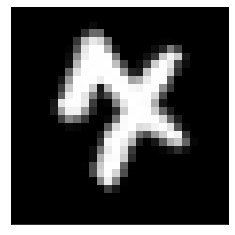

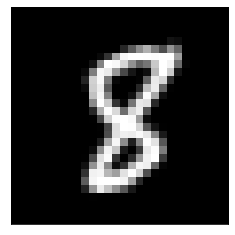

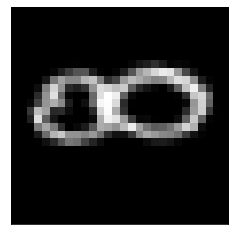

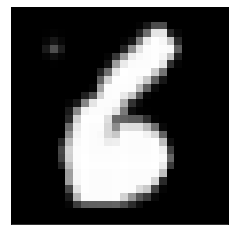

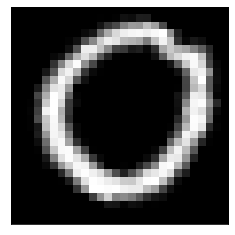

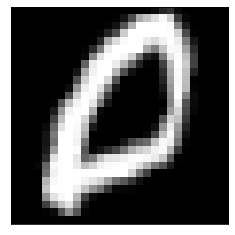

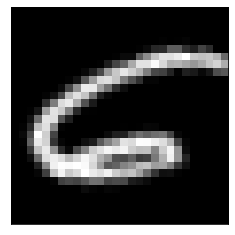

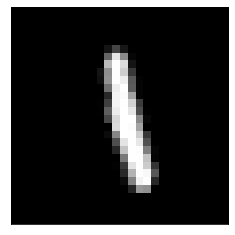

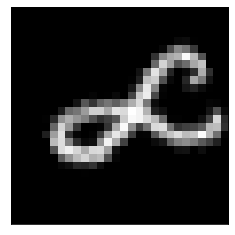

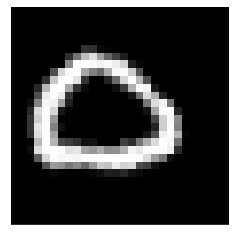

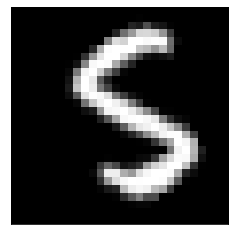

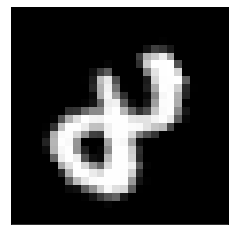

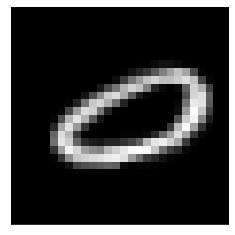

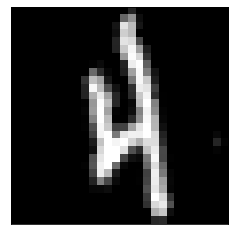

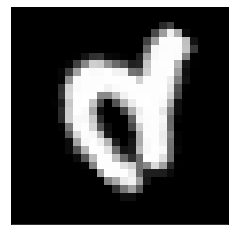

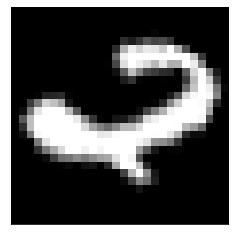

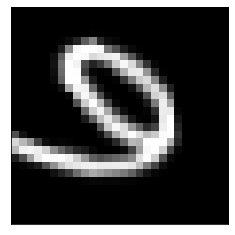

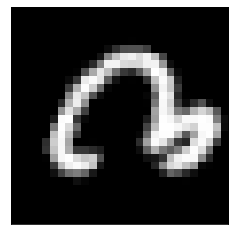

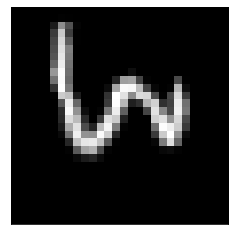

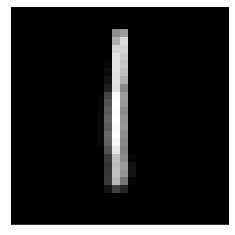

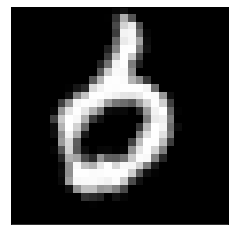

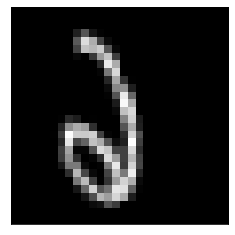

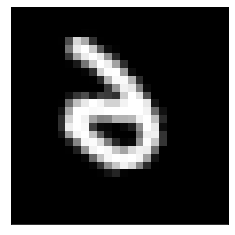

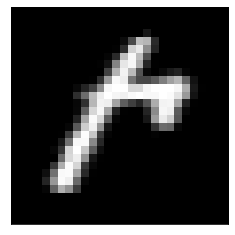

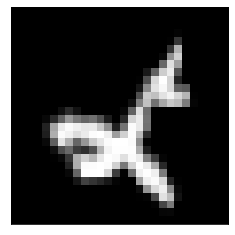

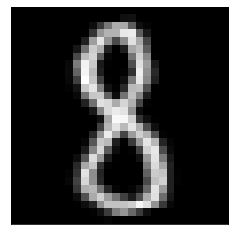

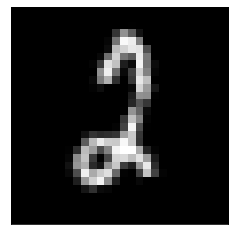

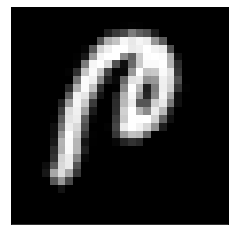

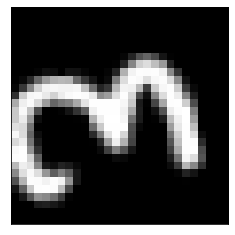

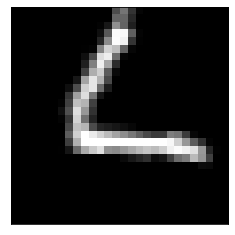

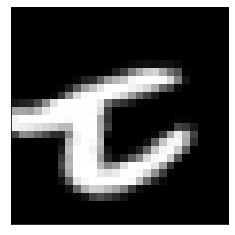

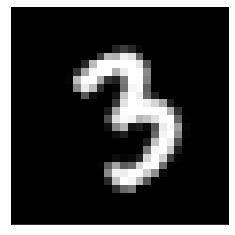

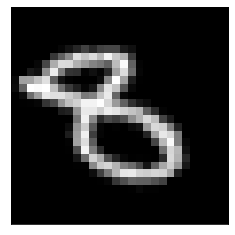

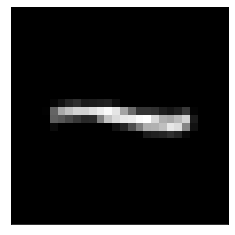

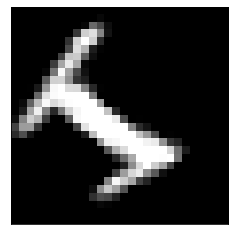

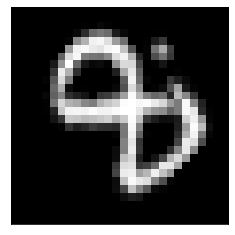

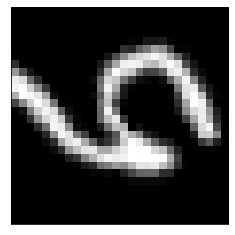

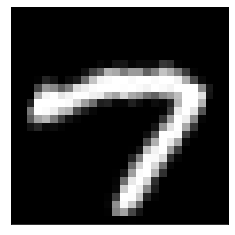

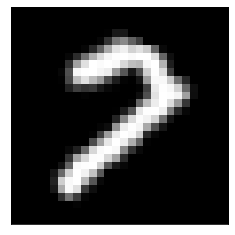

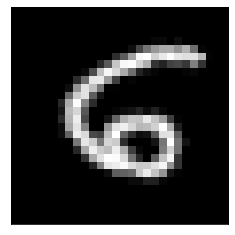

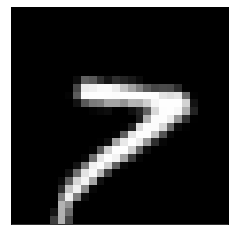

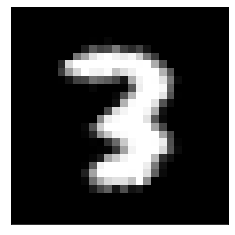

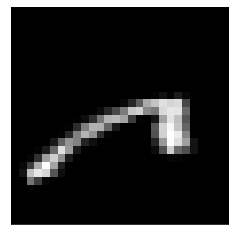

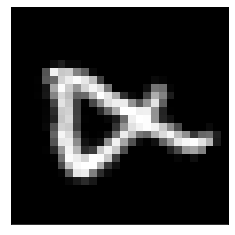

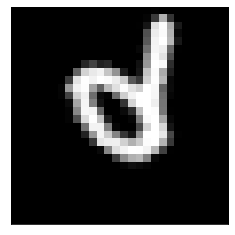

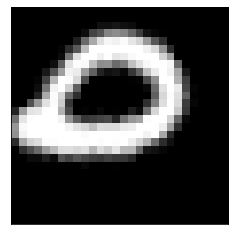

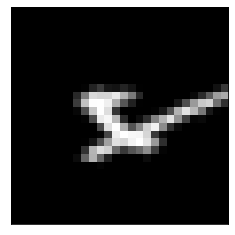

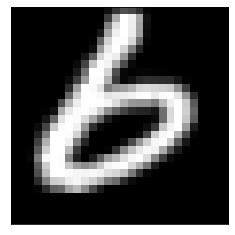

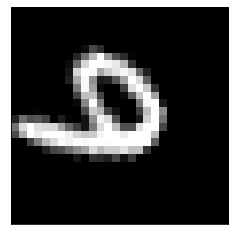

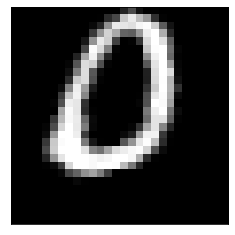

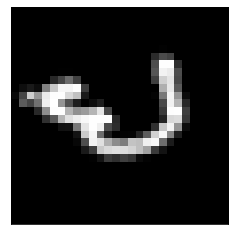

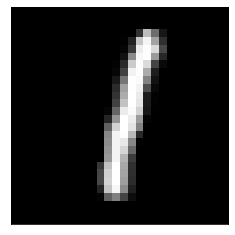

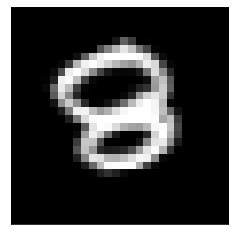

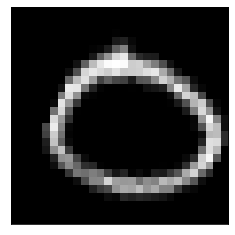

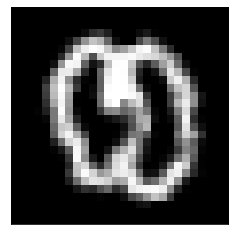

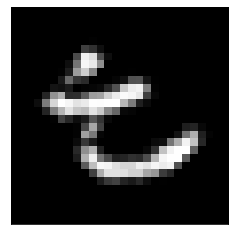

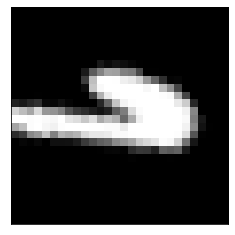

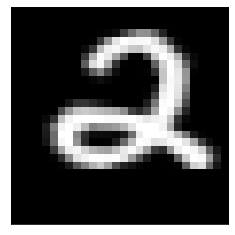

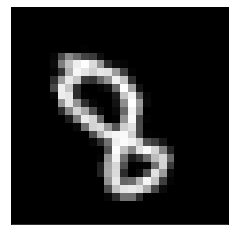

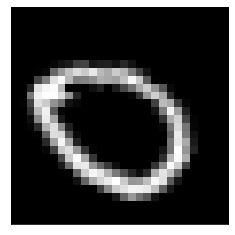

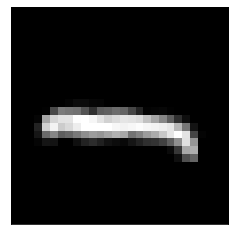

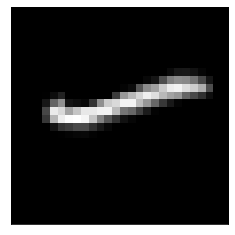

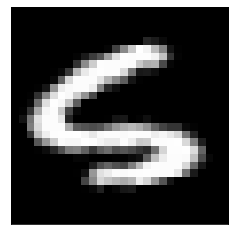

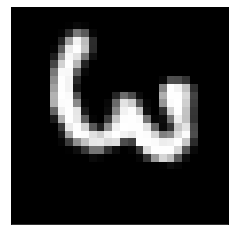

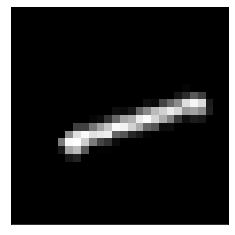

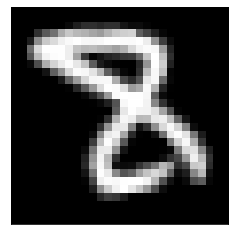

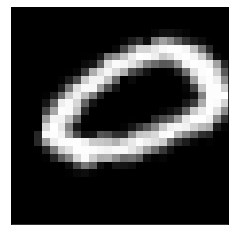

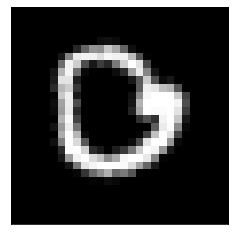

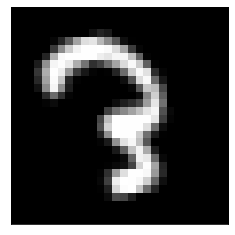

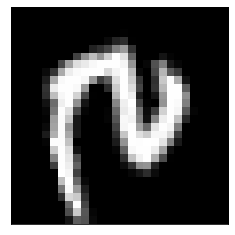

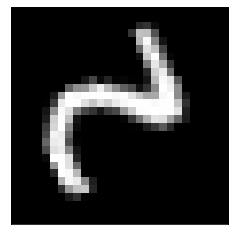

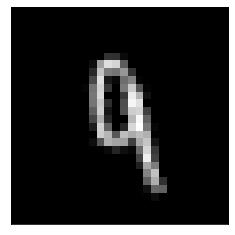

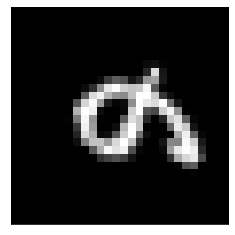

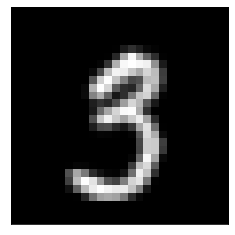

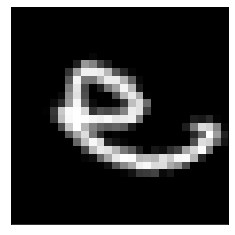

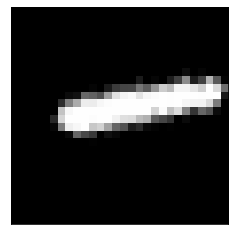

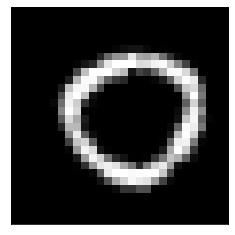

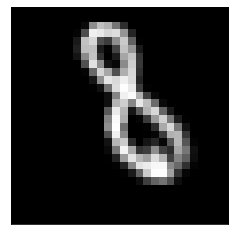

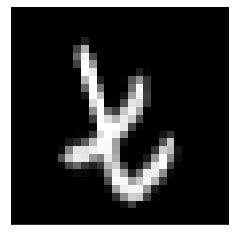

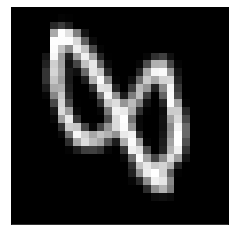

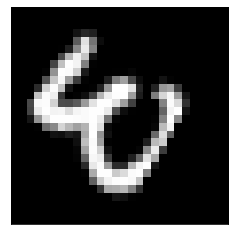

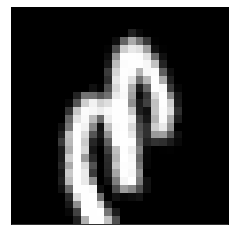

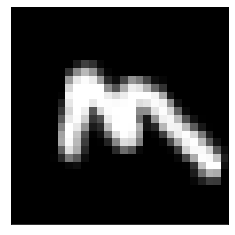

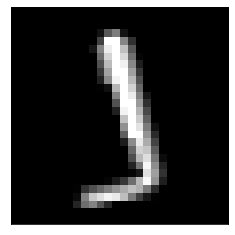

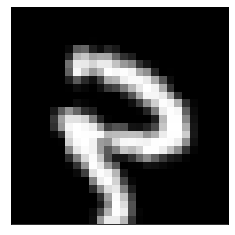

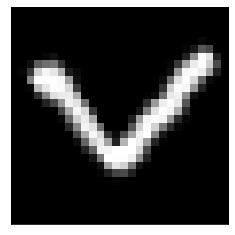

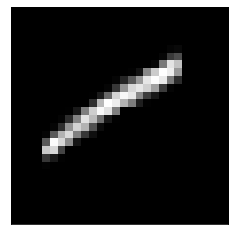

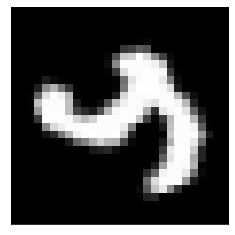

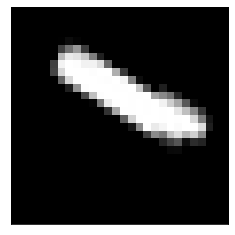

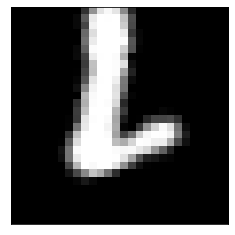

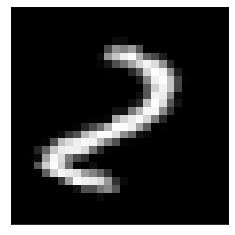

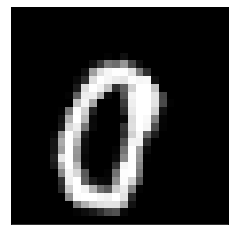

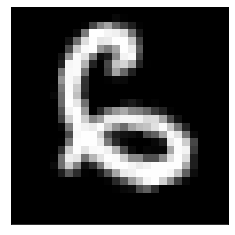

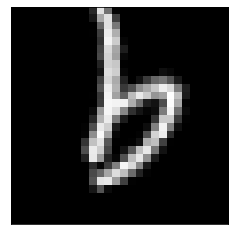

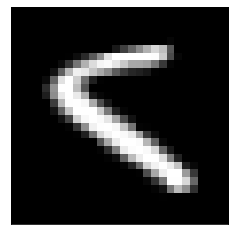

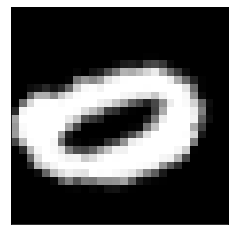

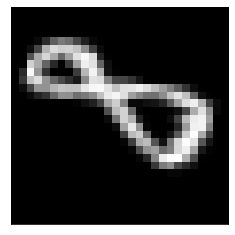

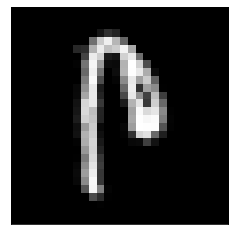

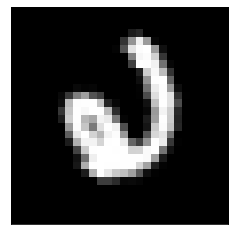

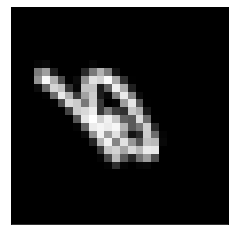

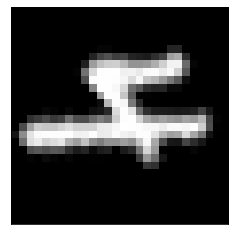

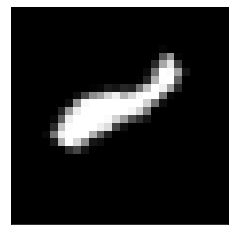

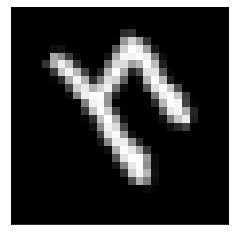

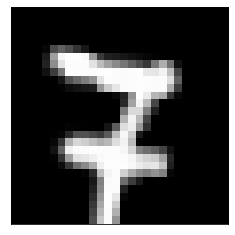

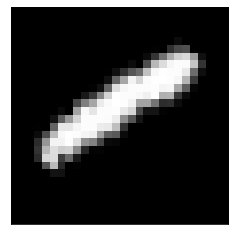

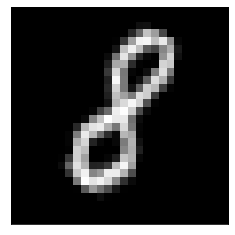

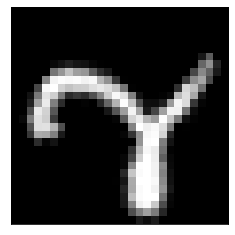

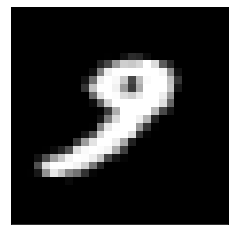

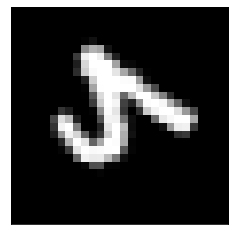

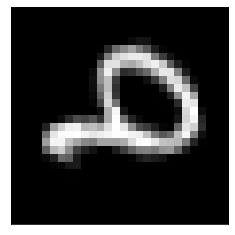

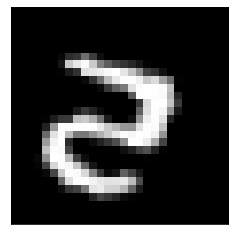

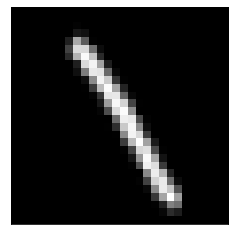

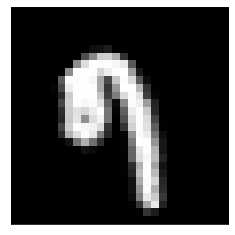

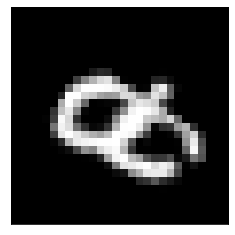

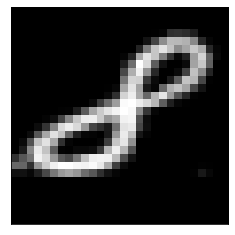

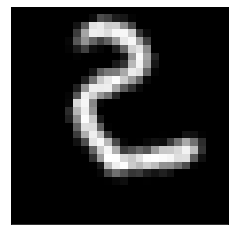

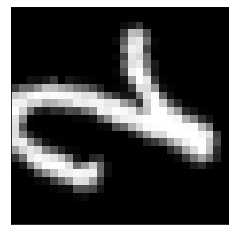

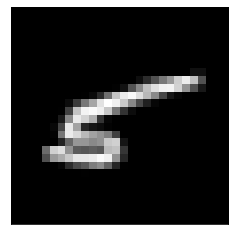

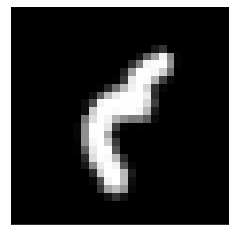

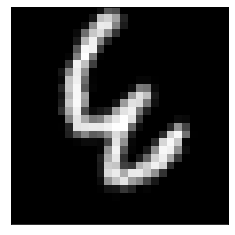

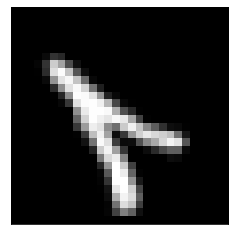

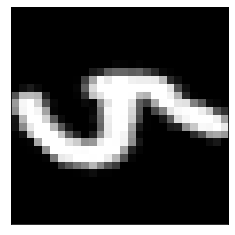

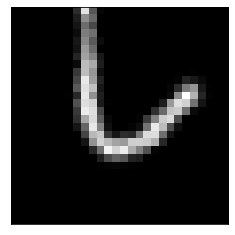

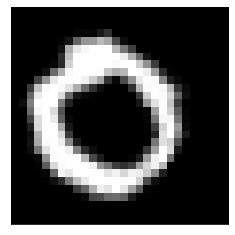

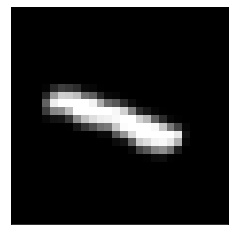

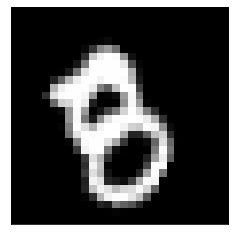

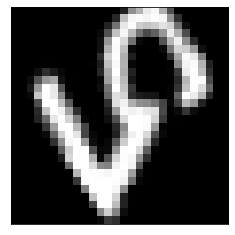

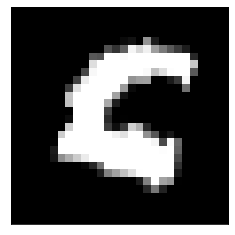

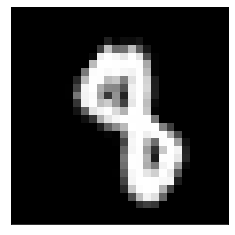

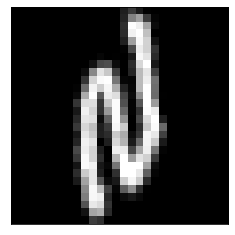

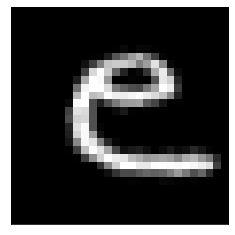

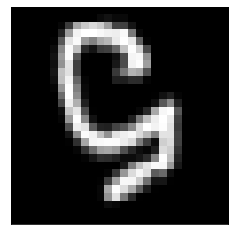

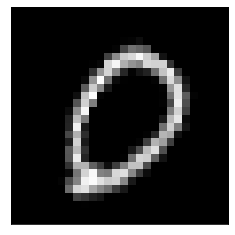

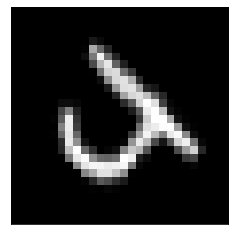

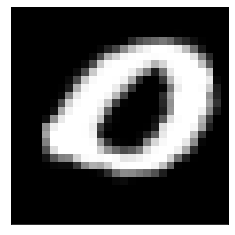

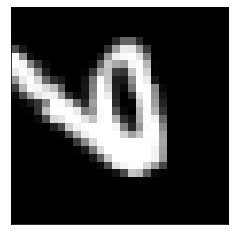

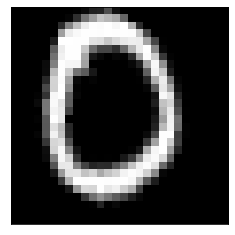

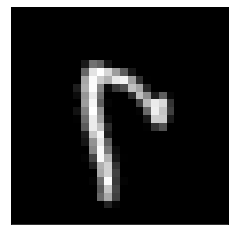

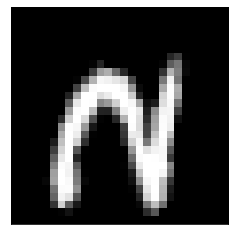

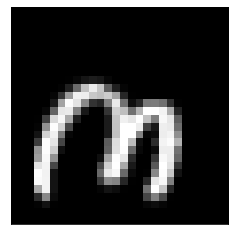

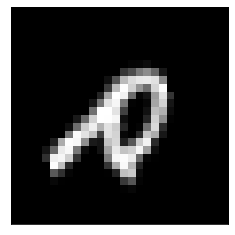

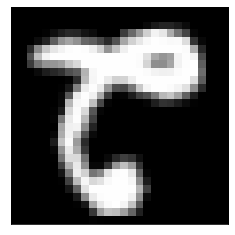

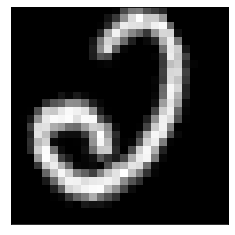

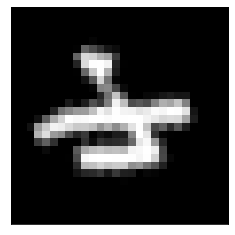

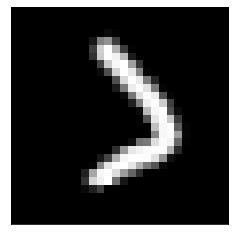

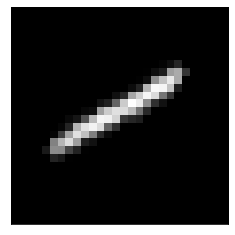

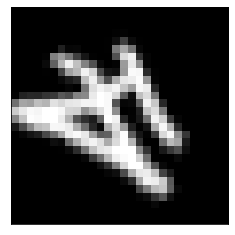

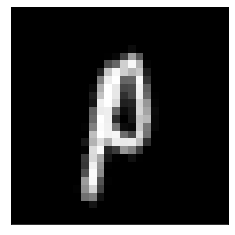

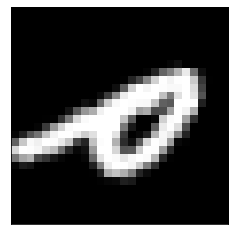

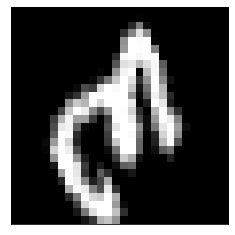

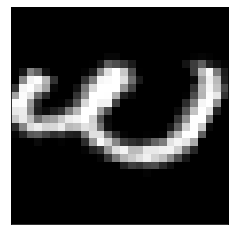

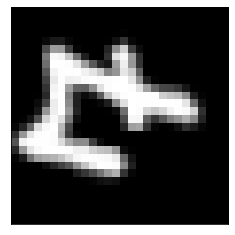

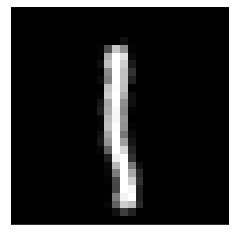

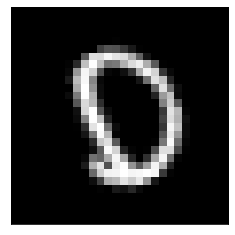

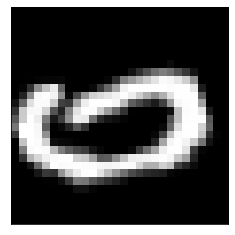

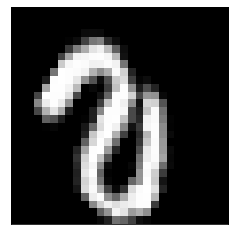

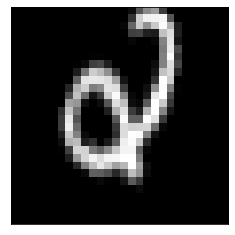

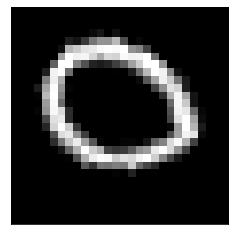

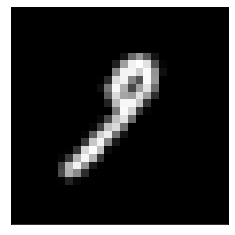

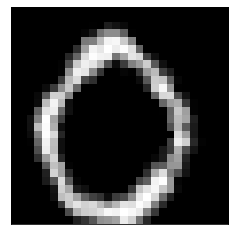

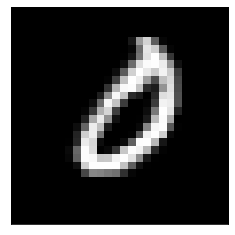

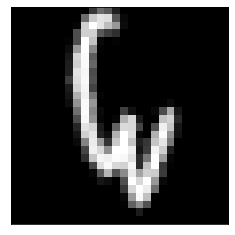

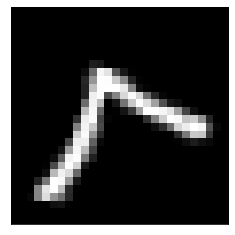

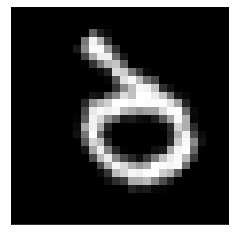

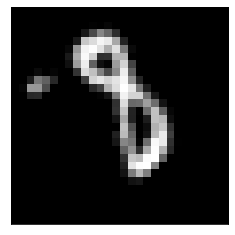

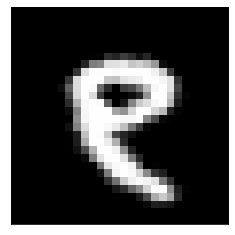

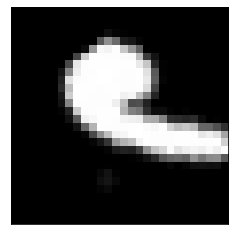

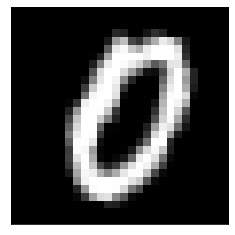

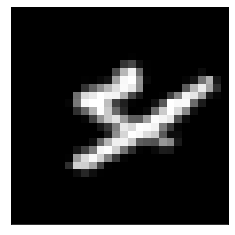

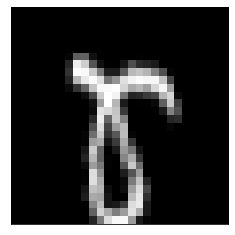

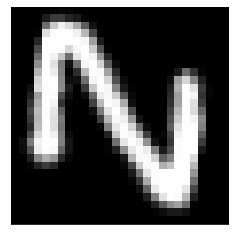

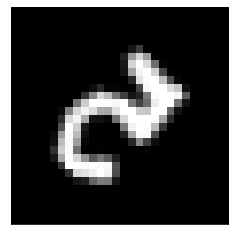

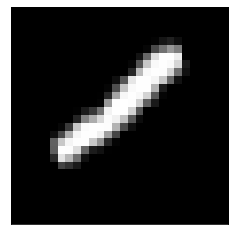

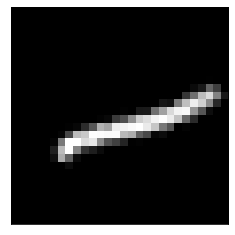

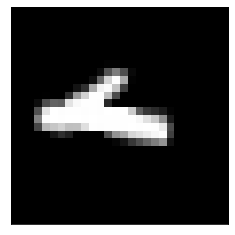

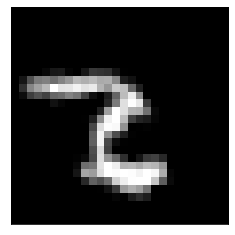

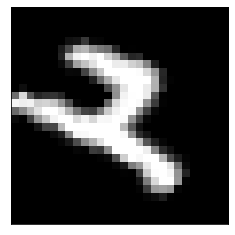

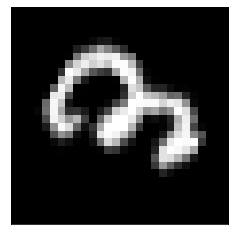

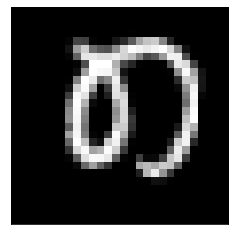

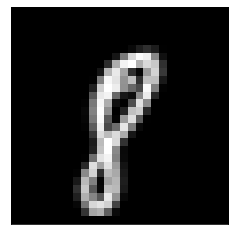

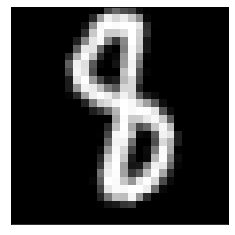

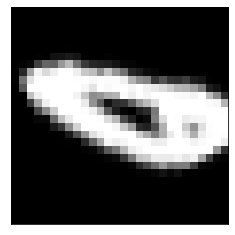

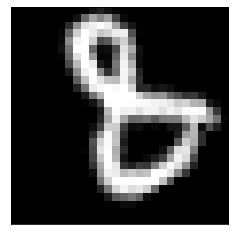

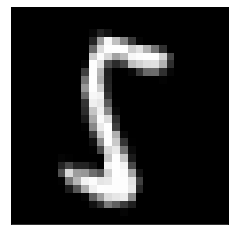

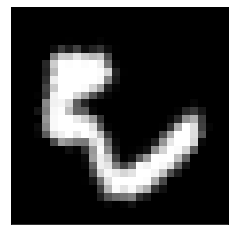

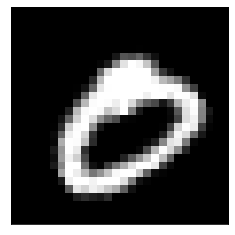

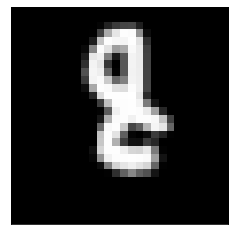

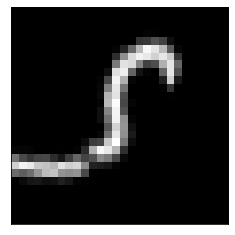

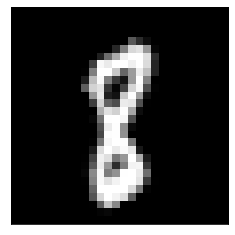

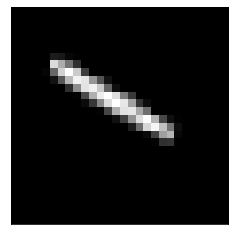

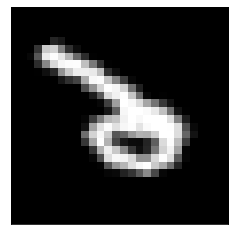

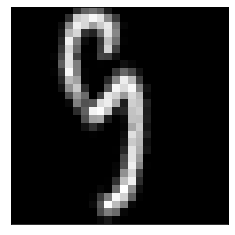

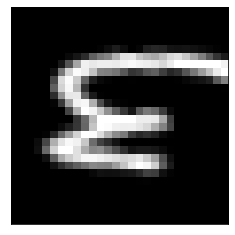

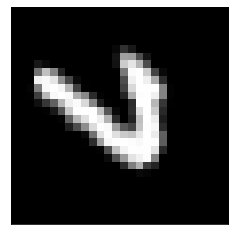

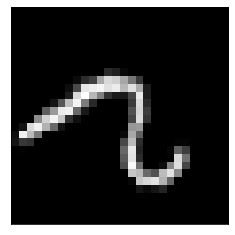

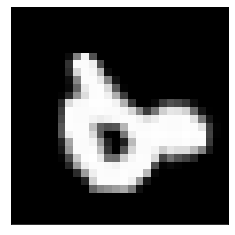

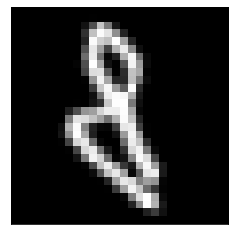

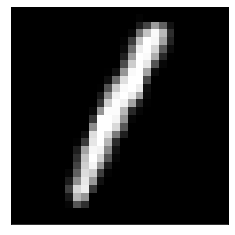

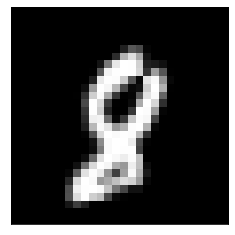

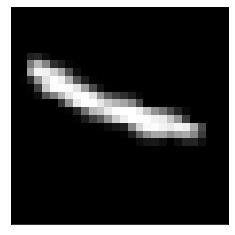

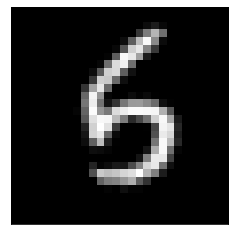

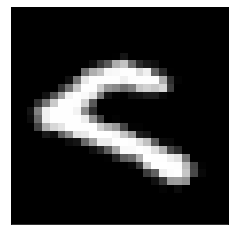

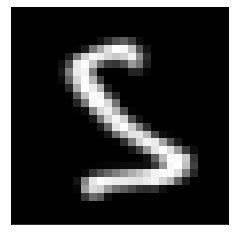

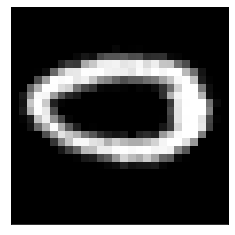

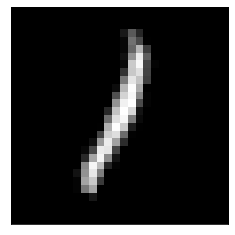

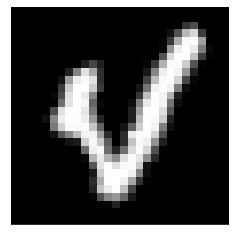

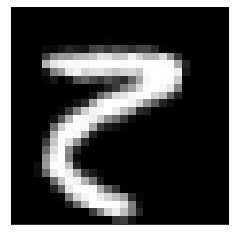

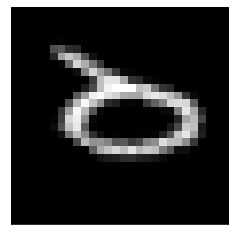

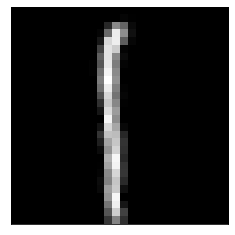

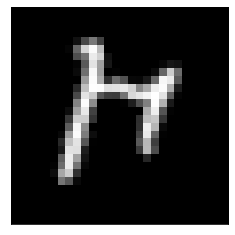

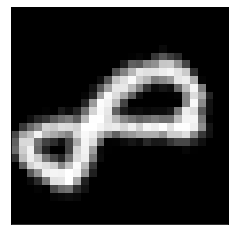

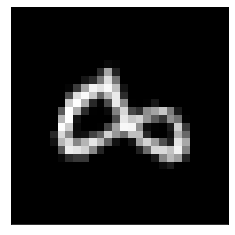

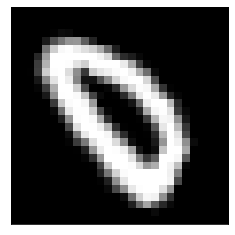

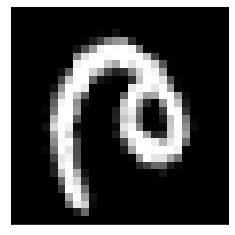

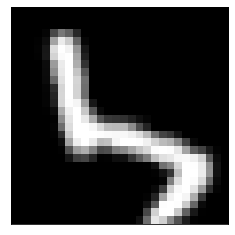

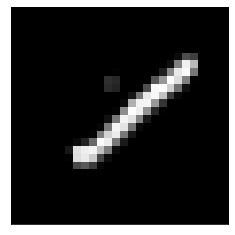

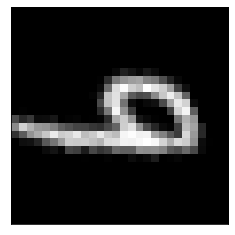

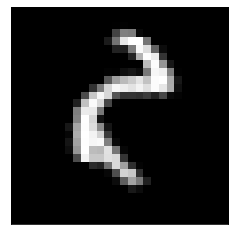

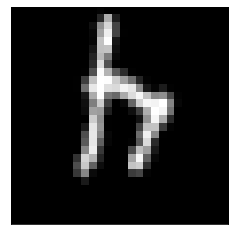

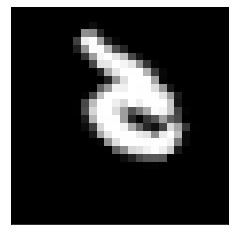

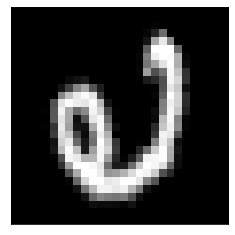

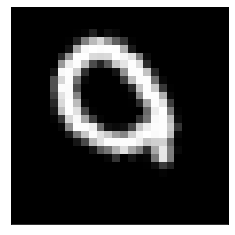

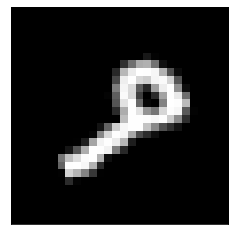

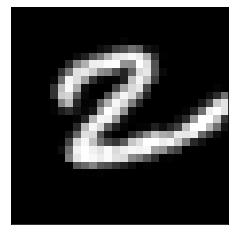

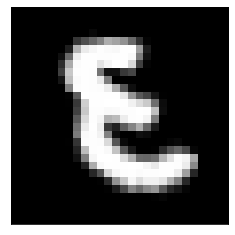

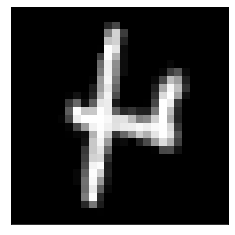

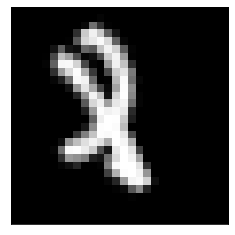

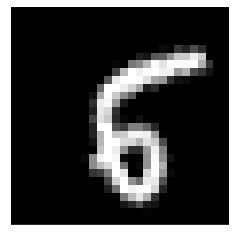

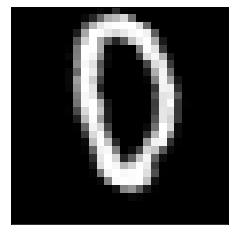

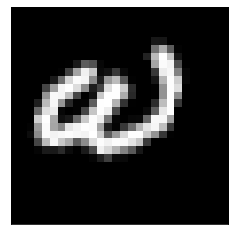

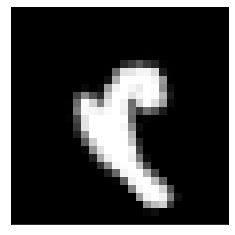

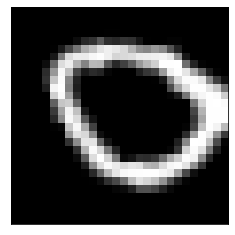

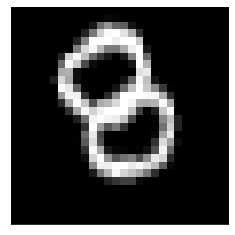

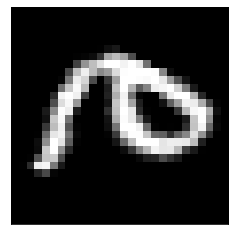

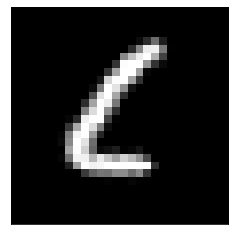

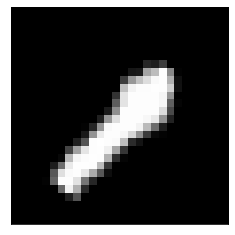

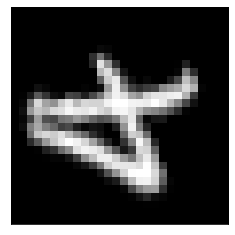

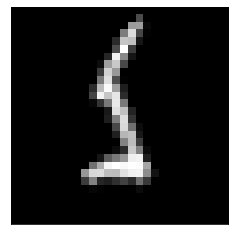

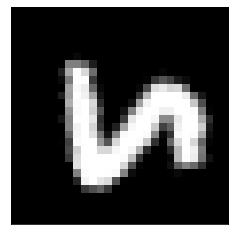

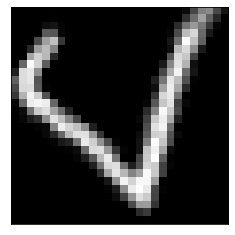

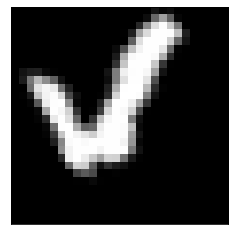

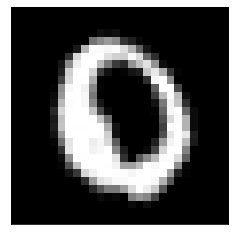

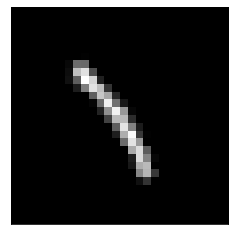

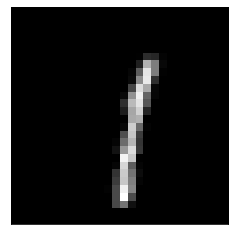

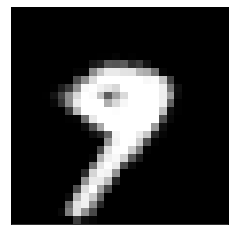

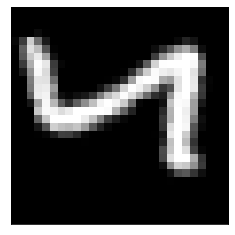

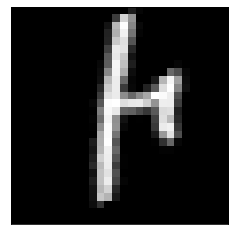

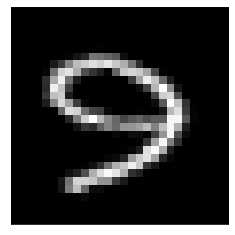

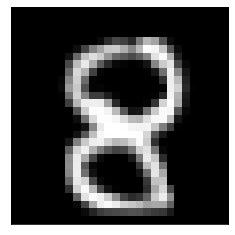

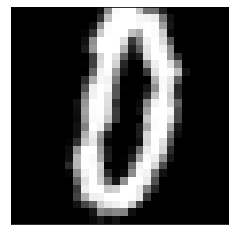

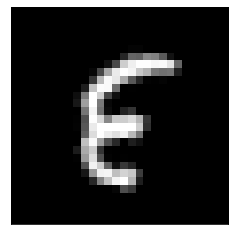

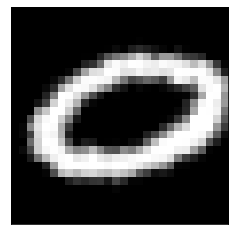

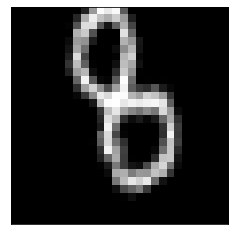

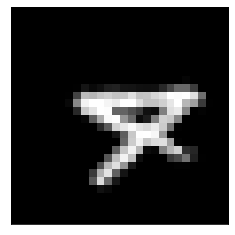

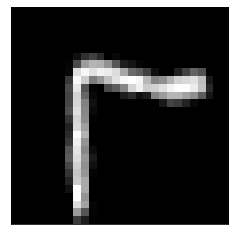

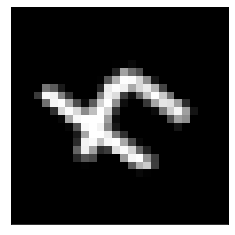

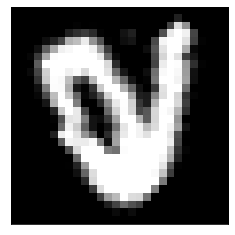

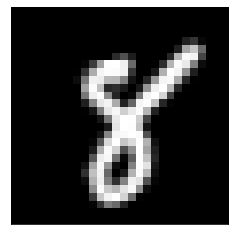

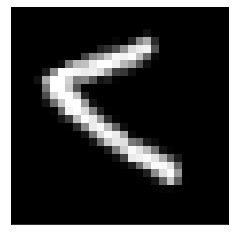

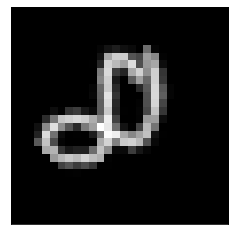

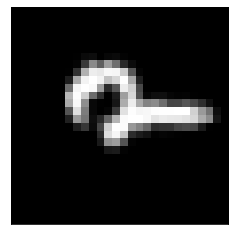

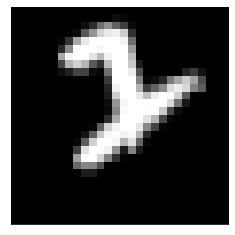

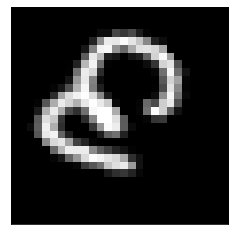

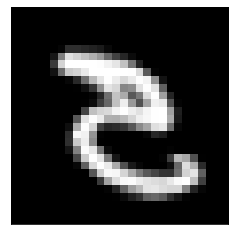

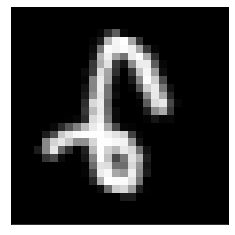

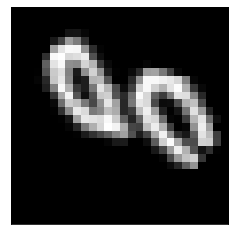

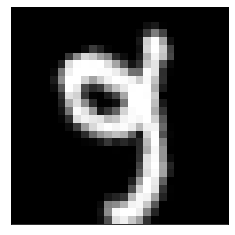

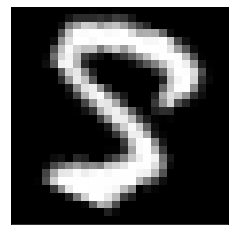

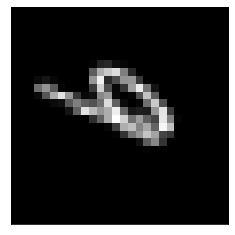

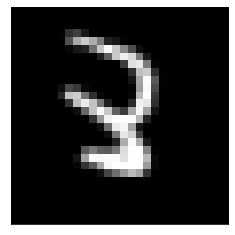

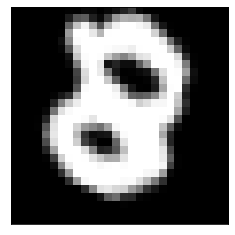

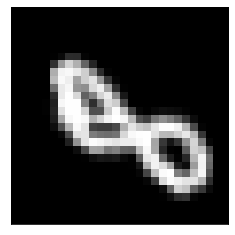

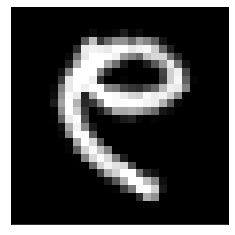

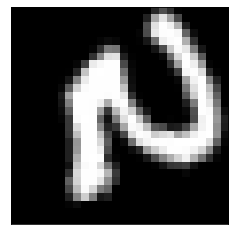

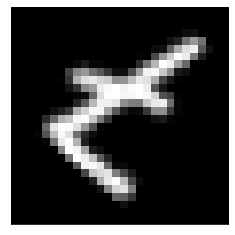

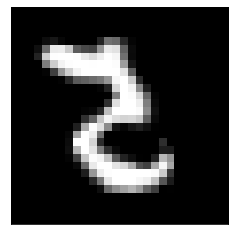

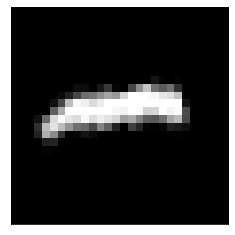

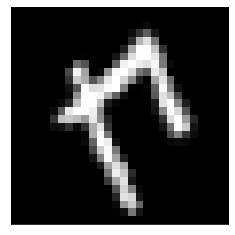

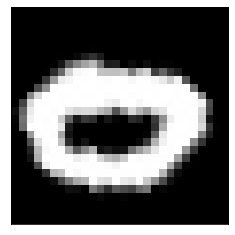

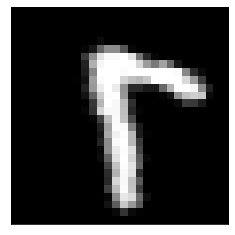

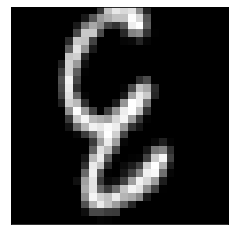

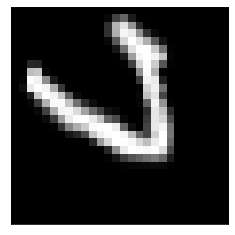

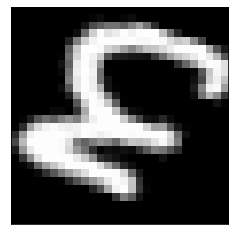

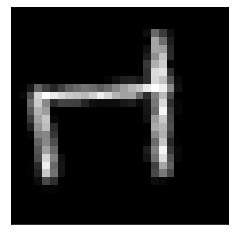

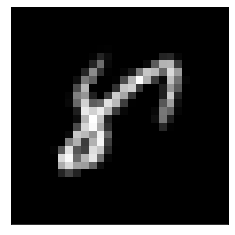

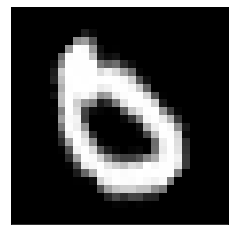

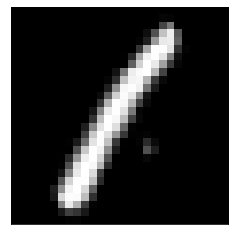

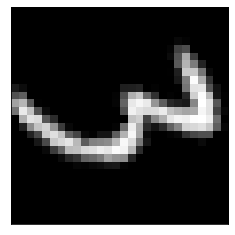

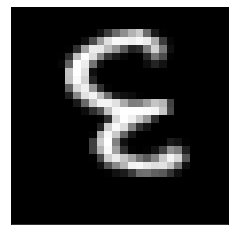

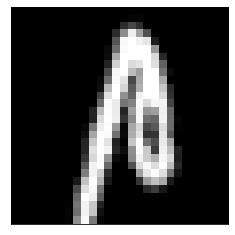

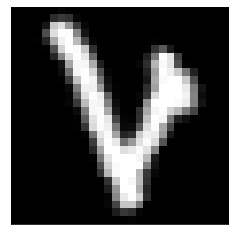

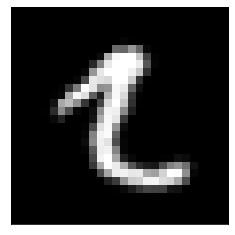

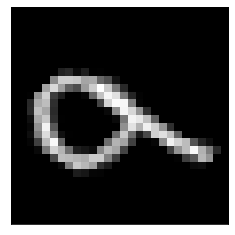

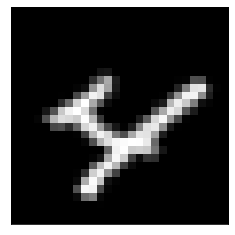

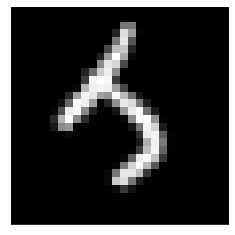

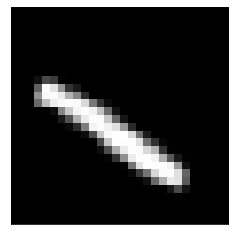

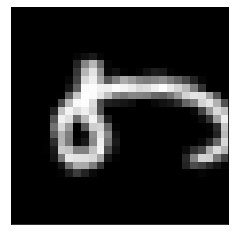

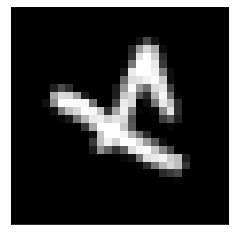

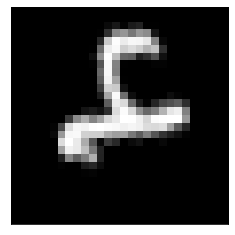

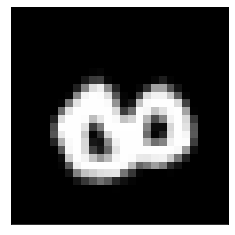

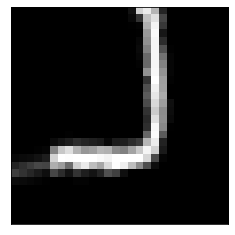

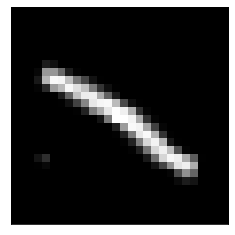

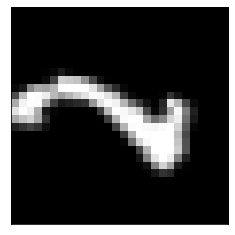

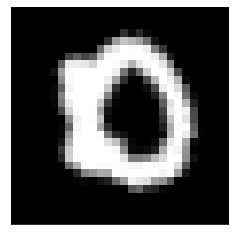

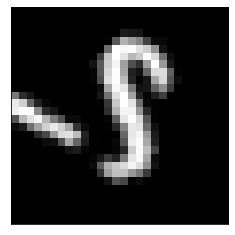

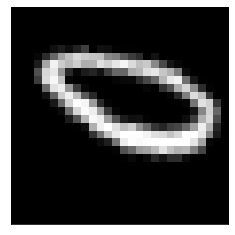

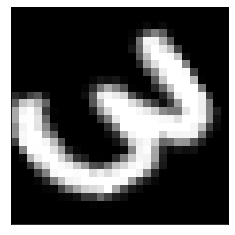

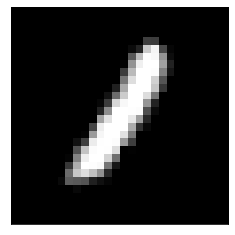

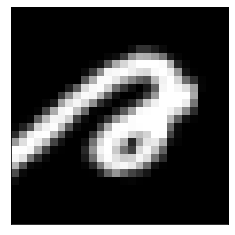

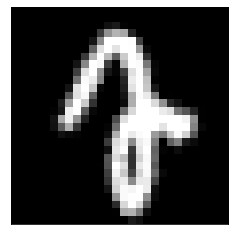

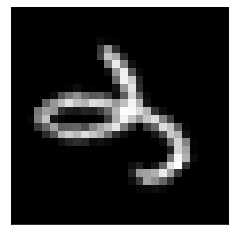

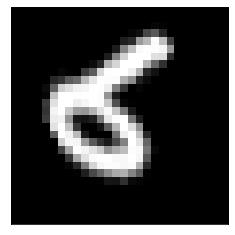

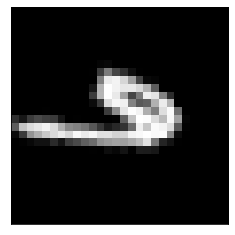

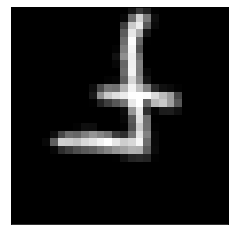

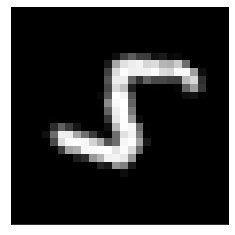

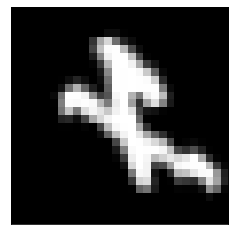

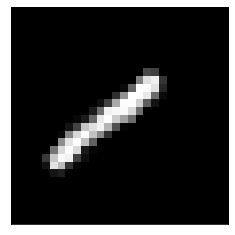

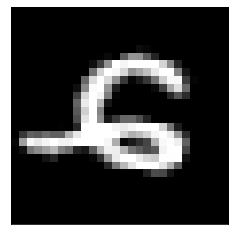

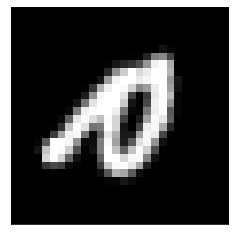

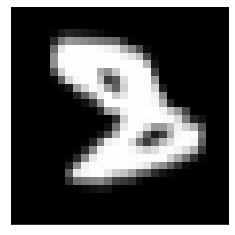

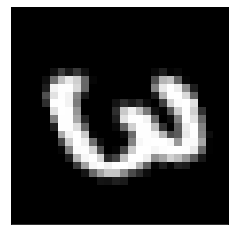

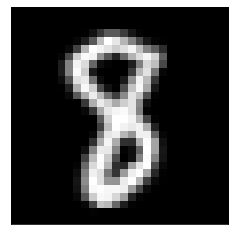

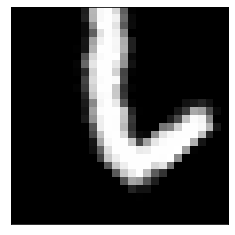

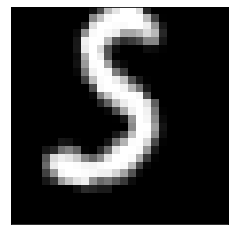

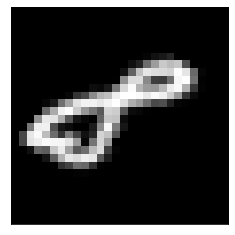

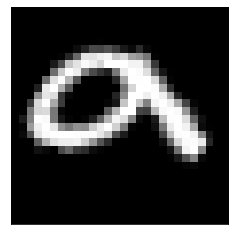

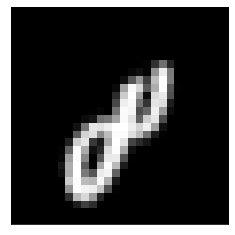

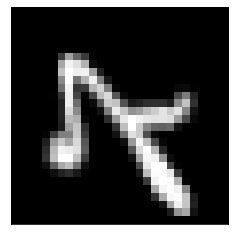

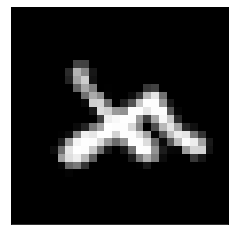

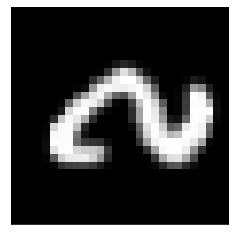

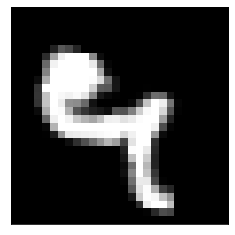

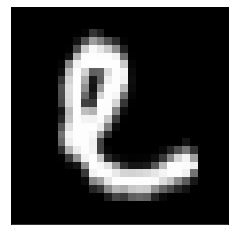

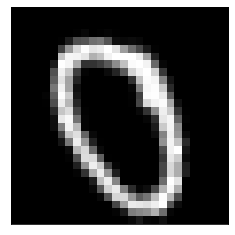

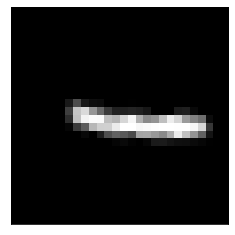

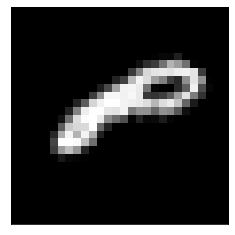

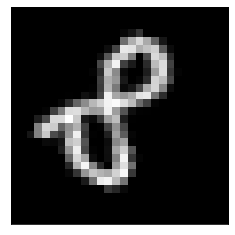

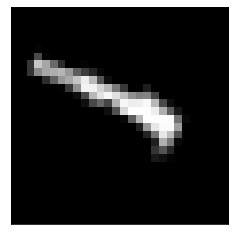

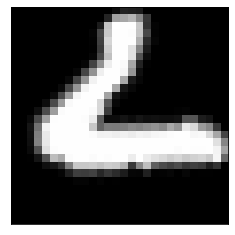

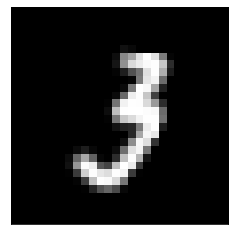

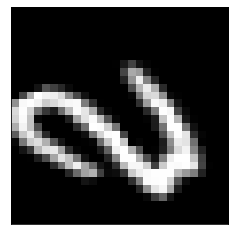

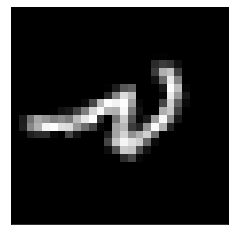

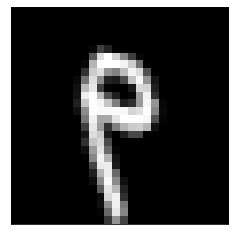

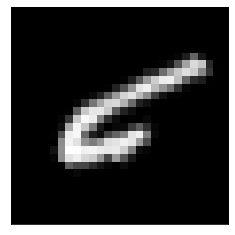

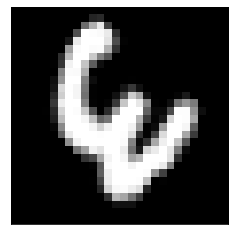

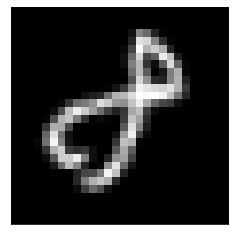

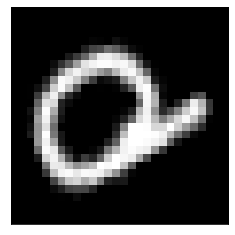

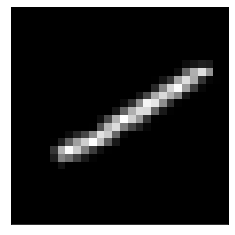

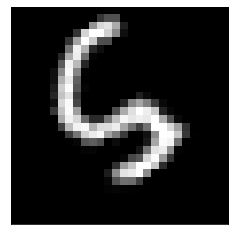

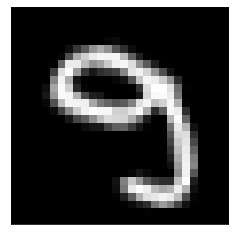

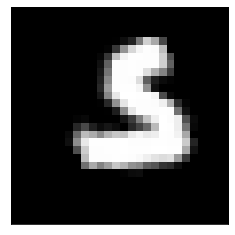

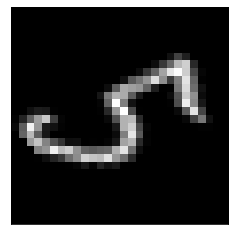

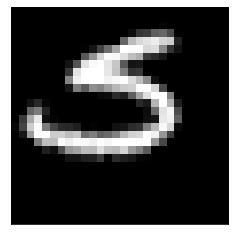

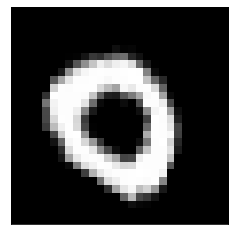

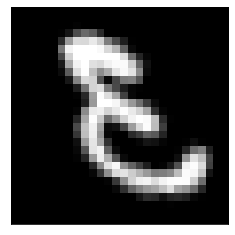

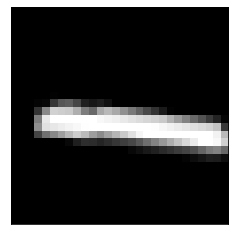

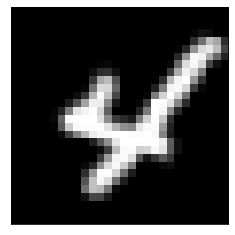

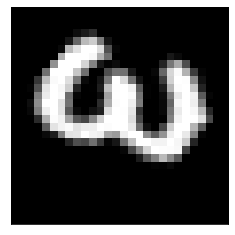

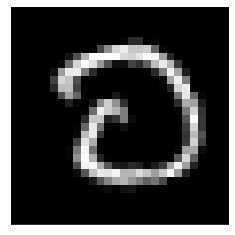

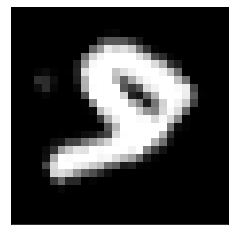

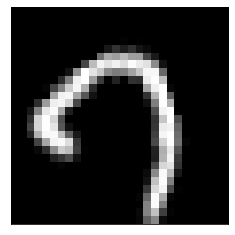

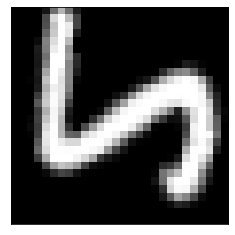

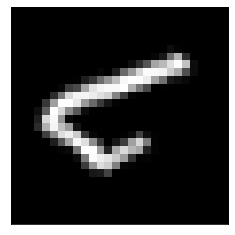

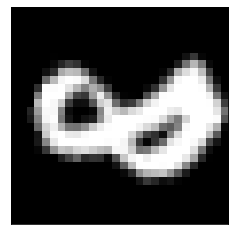

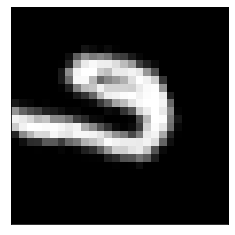

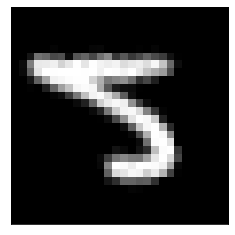

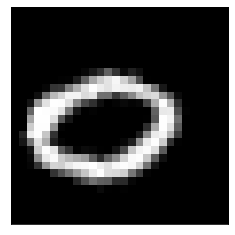

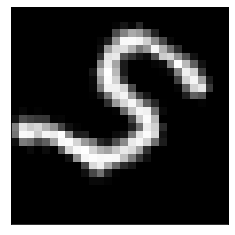

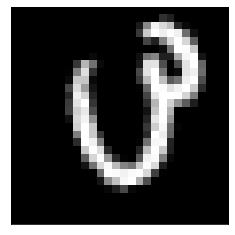

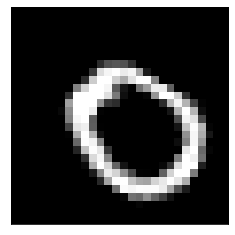

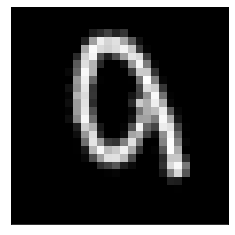

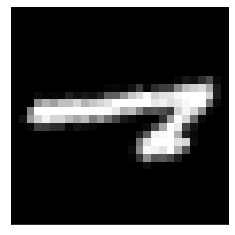

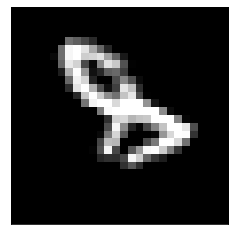

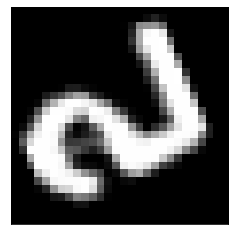

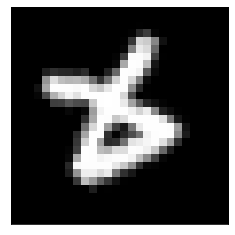

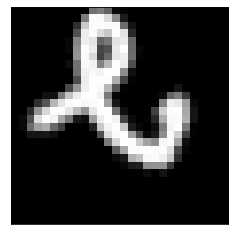

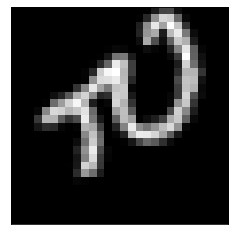

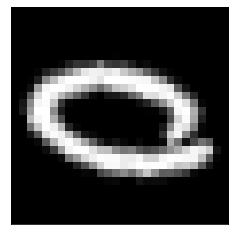

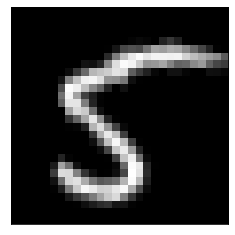

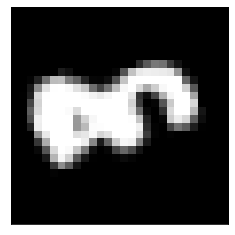

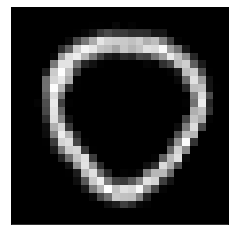

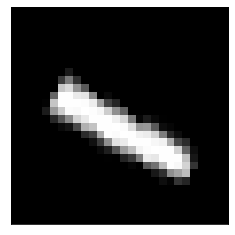

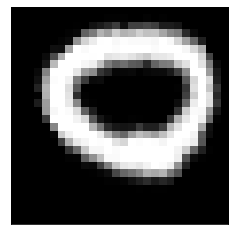

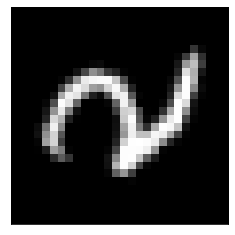

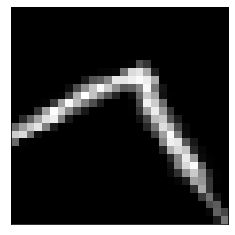

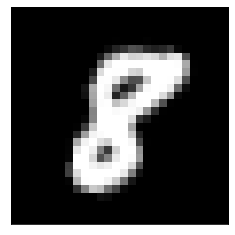

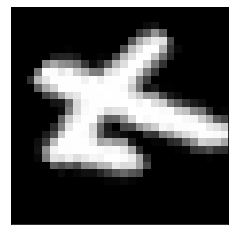

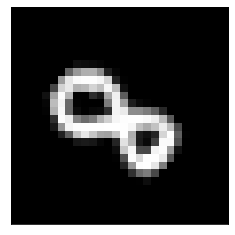

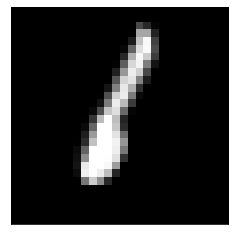

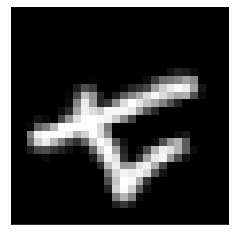

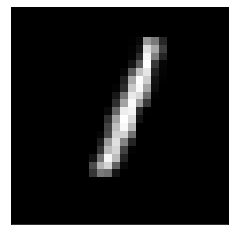

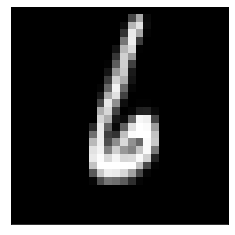

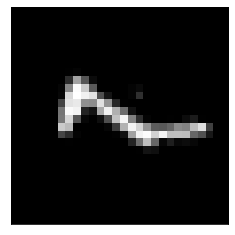

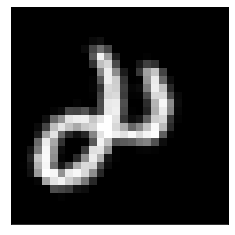

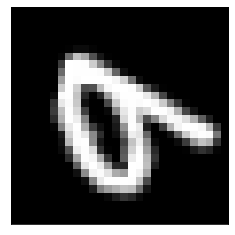

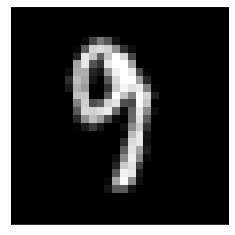

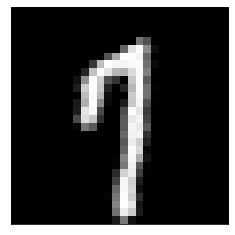

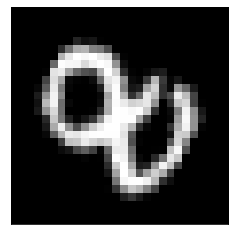

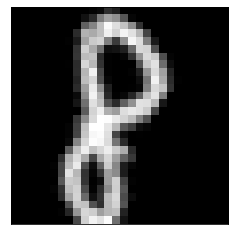

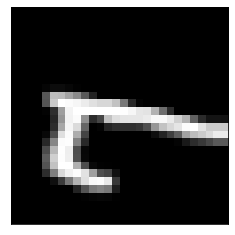

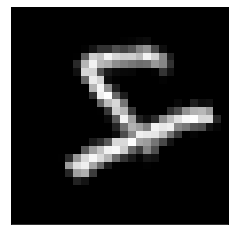

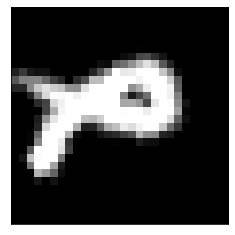

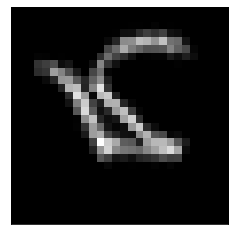

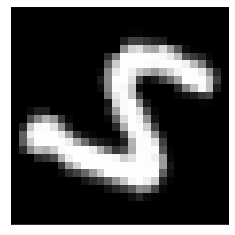

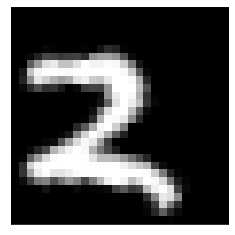

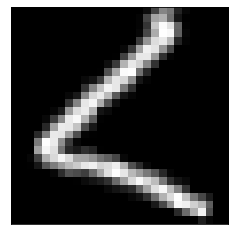

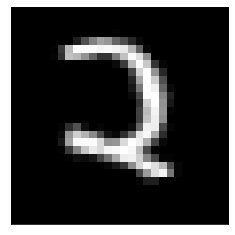

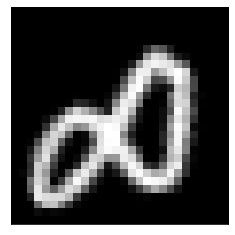

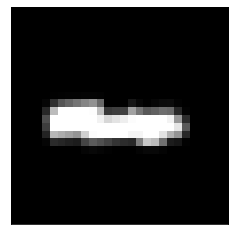

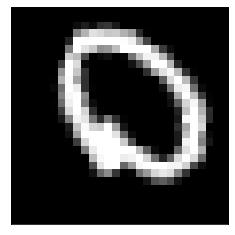

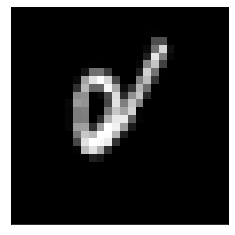

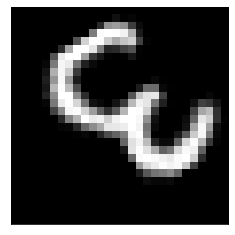

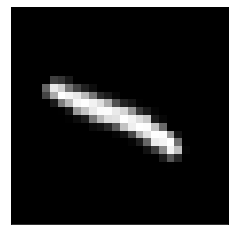

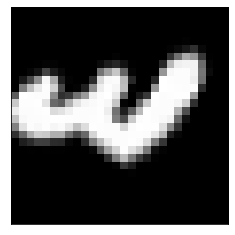

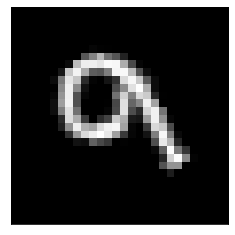

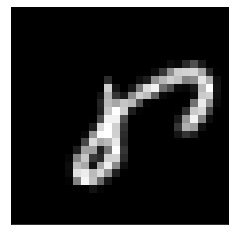

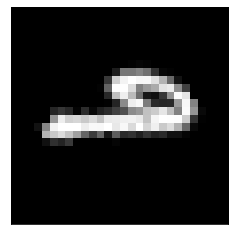

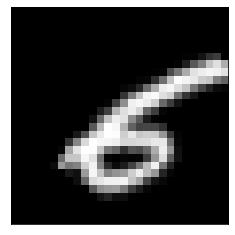

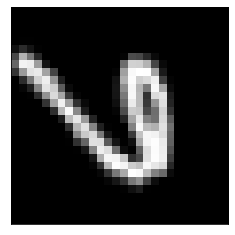

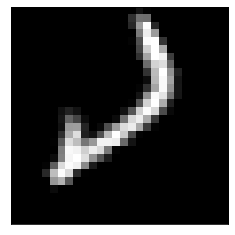

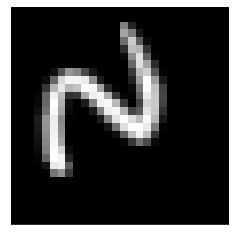

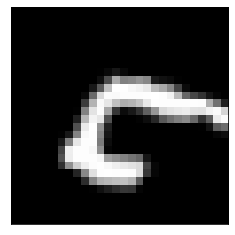

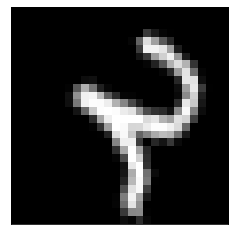

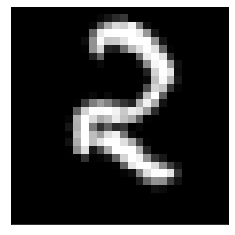

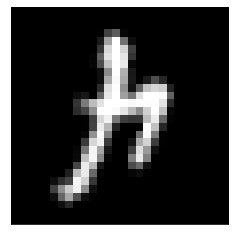

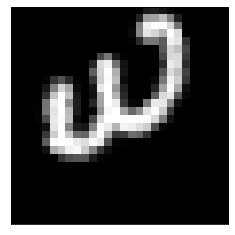

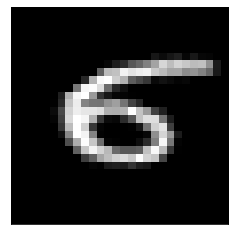

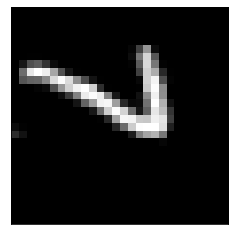

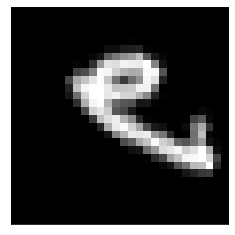

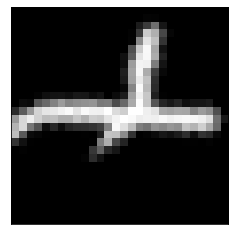

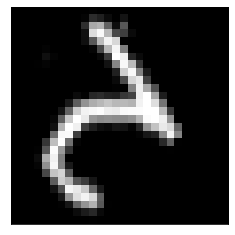

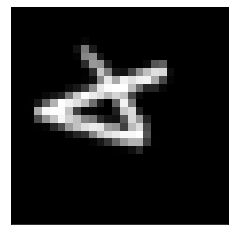

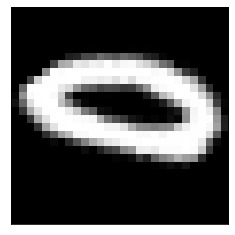

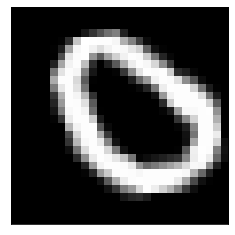

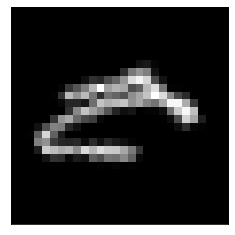

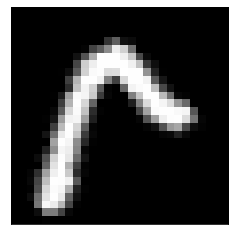

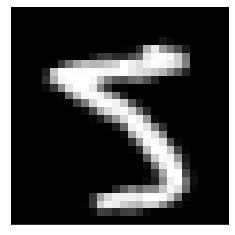

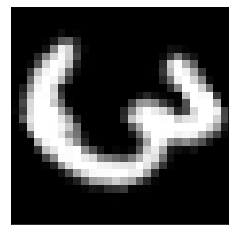

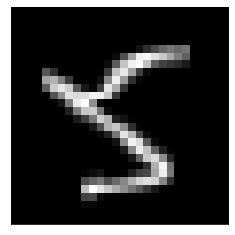

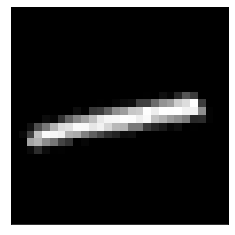

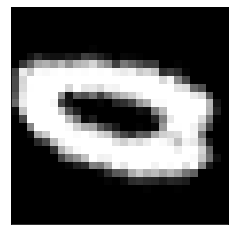

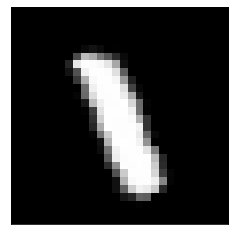

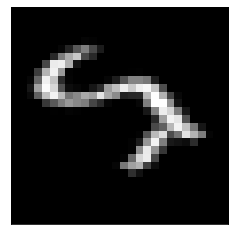

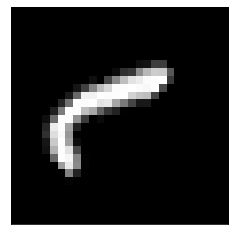

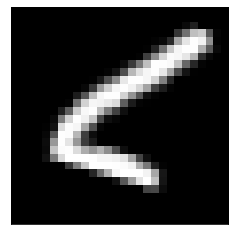

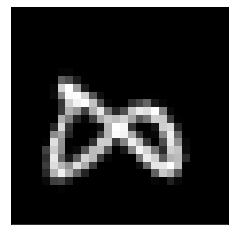

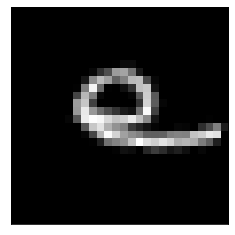

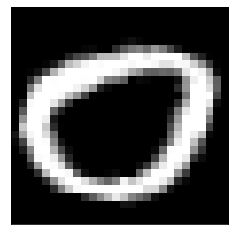

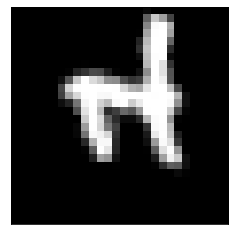

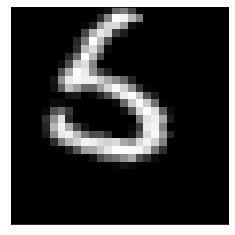

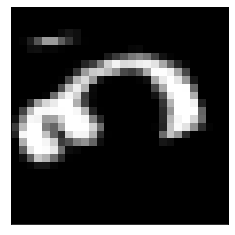

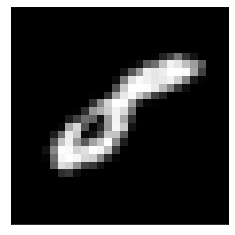

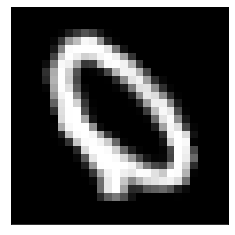

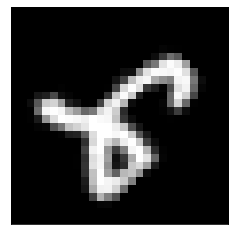

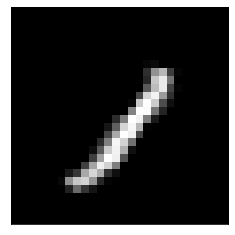

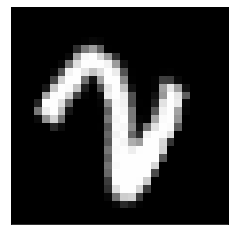

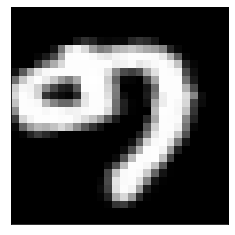

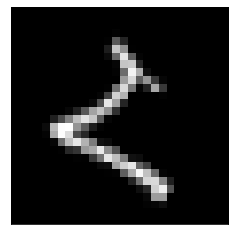

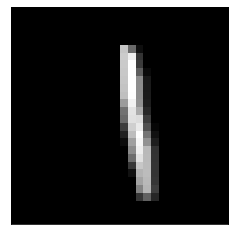

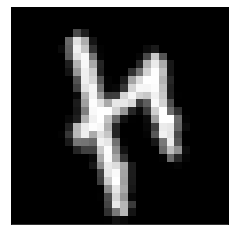

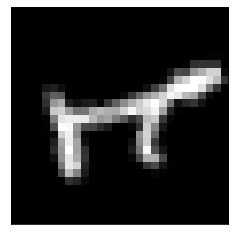

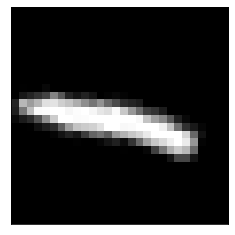

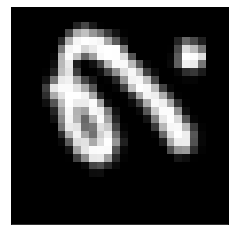

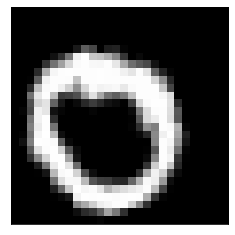

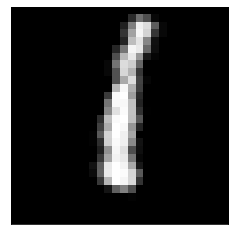

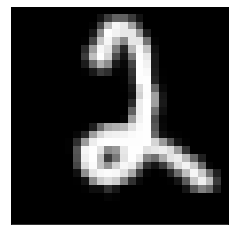

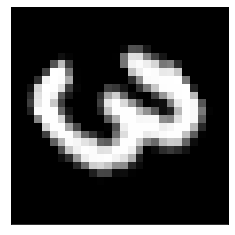

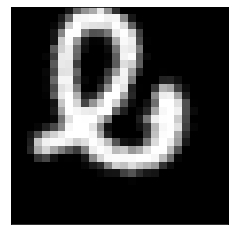

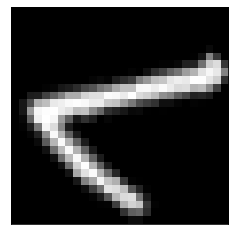

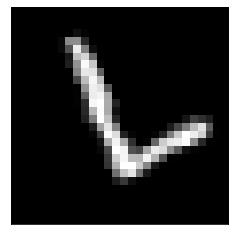

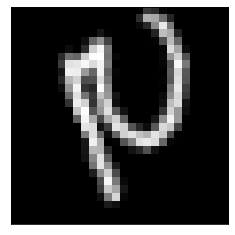

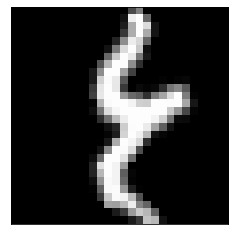

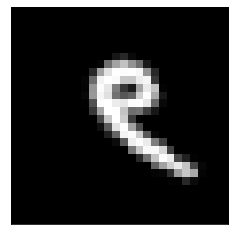

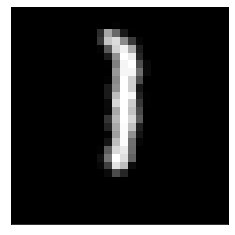

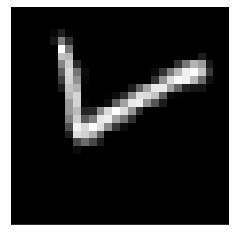

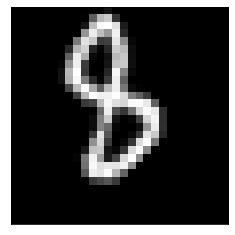

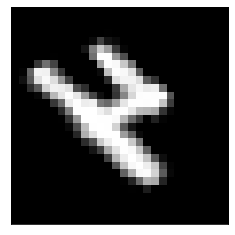

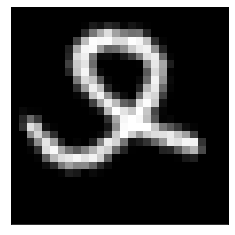

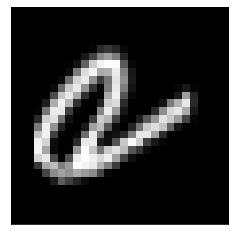

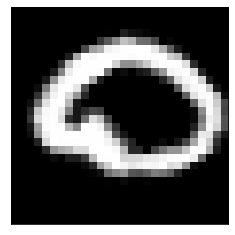

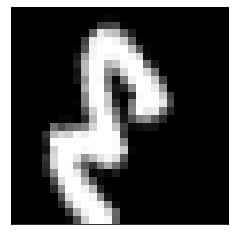

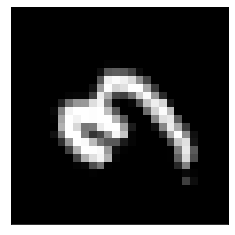

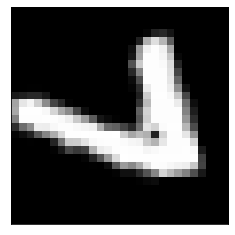

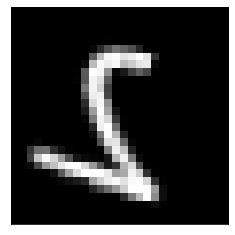

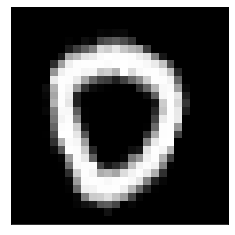

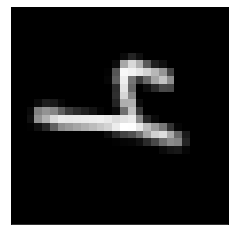

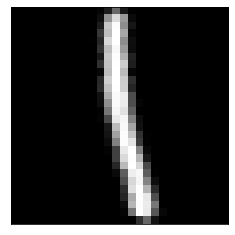

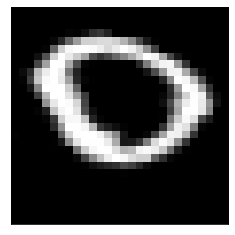

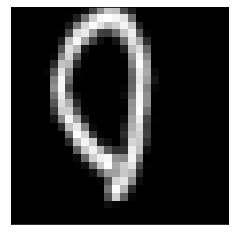

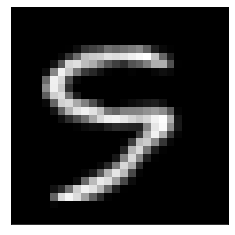

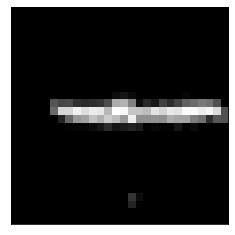

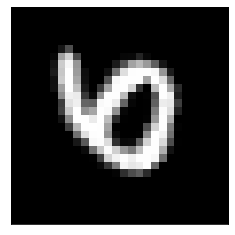

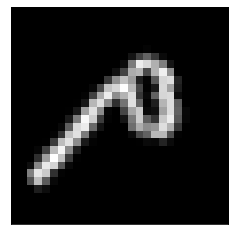

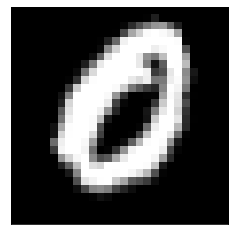

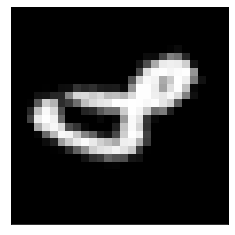

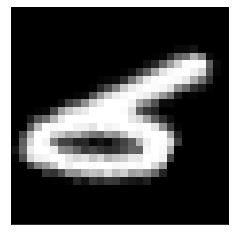

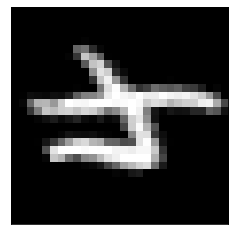

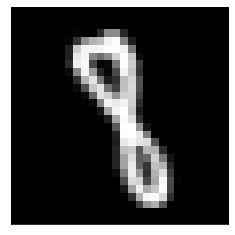

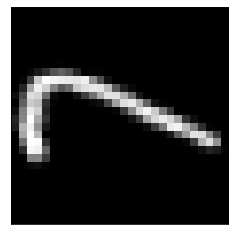

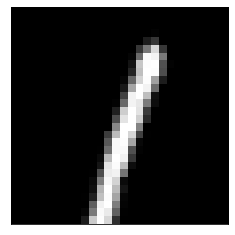

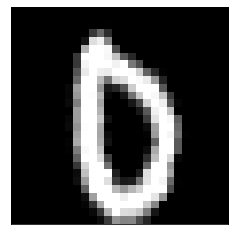

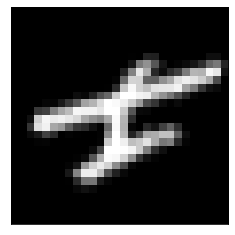

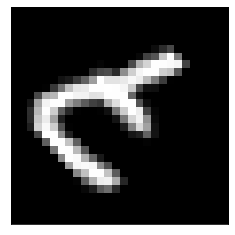

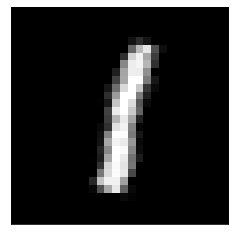

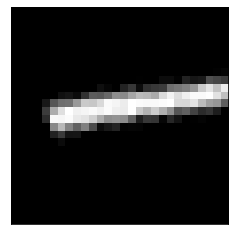

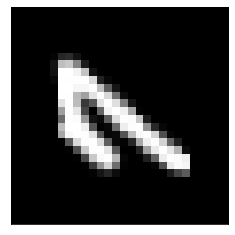

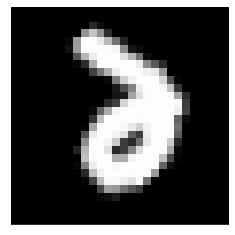

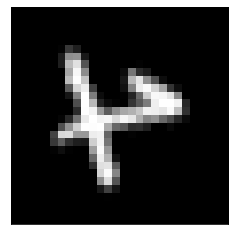

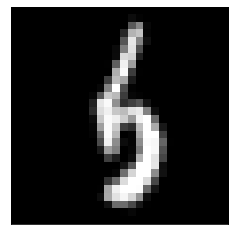

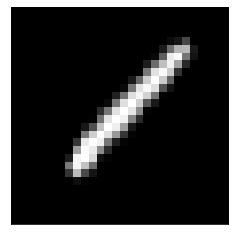

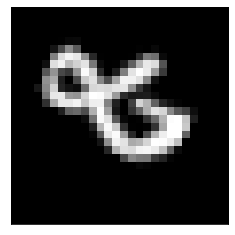

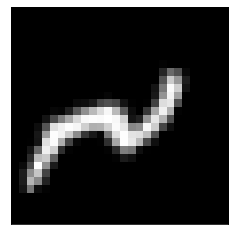

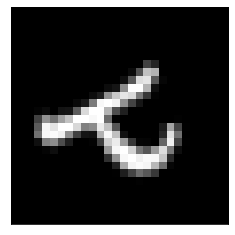

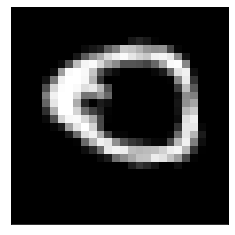

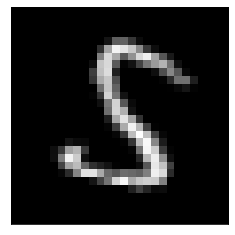

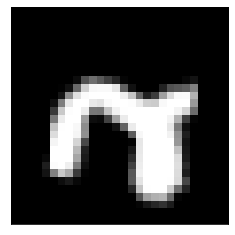

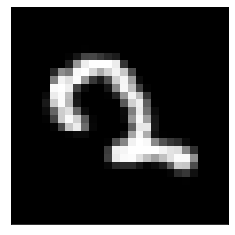

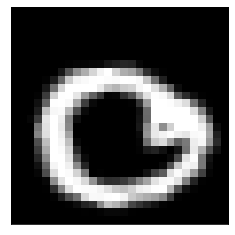

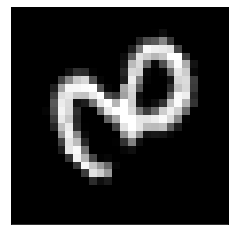

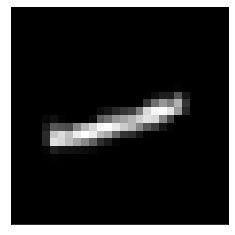

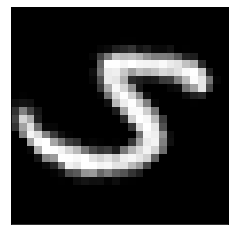

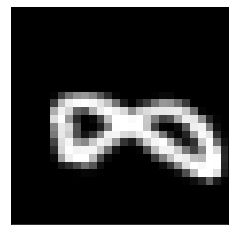

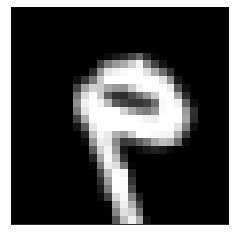

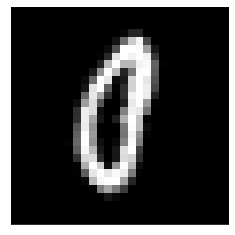

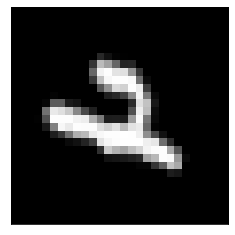

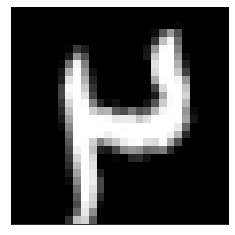

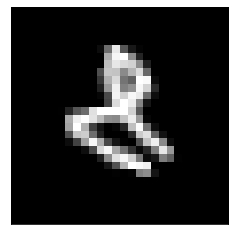

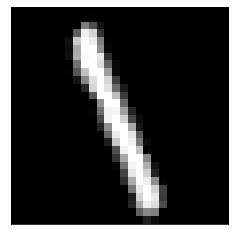

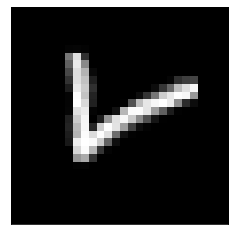

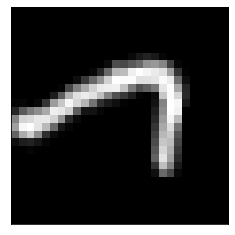

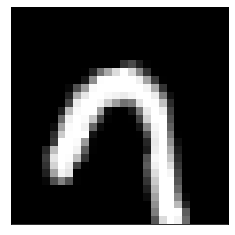

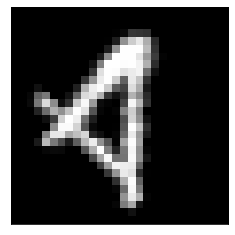

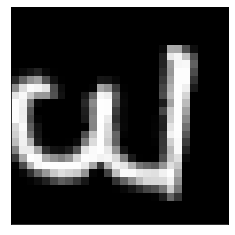

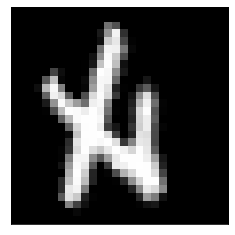

KeyboardInterrupt: 

In [31]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

# Create the data Augmentation using an Image Data Generator
datagen = ImageDataGenerator(
    rescale = 1.255,
    rotation_range = 90,
    width_shift_range = 0.05,
    height_shift_range = 0.05,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True, vertical_flip=True,
    fill_mode = 'nearest'
)

# fit parameters from data
datagen.fit(x_train)

# configure batch size and retrieve one batch of images
plt.figure(figsize=(10,10))

for x_batch in datagen.flow(x_train, batch_size=1):
    for i in range(0, 1):
        plt.subplot(1, 1, + 1 + i)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_batch.reshape(28, 28), cmap=plt.get_cmap('gray'))

    plt.show()
    



In [41]:
datagen = ImageDataGenerator(
    rescale = 1.255,
    rotation_range = 90,
    width_shift_range = 0.05,
    height_shift_range = 0.05,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True, vertical_flip=True,
    fill_mode = 'nearest'
)


backend.clear_session()
# create the sequential model and then add layers
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# set an optimizer with a given loss function which uses a metric
model.compile(optimizer = 'adam',
               loss= 'categorical_crossentropy',
                metrics=['accuracy'])

# fit the model by using our train data
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),   
          validation_data=(x_val, y_val),  
          epochs = 50,
          verbose = 1,
          callbacks=[EarlyStopping(monitor='accuracy', patience=5, restore_best_weights = True)])



Epoch 1/50
1407/1407 [==============================] - 126s 90ms/step - loss: 1.2193 - accuracy: 0.5734 - val_loss: 0.6025 - val_accuracy: 0.8043
Epoch 2/50
1407/1407 [==============================] - 118s 84ms/step - loss: 0.6950 - accuracy: 0.7691 - val_loss: 0.4274 - val_accuracy: 0.8569
Epoch 3/50
1407/1407 [==============================] - 120s 85ms/step - loss: 0.5683 - accuracy: 0.8124 - val_loss: 0.4172 - val_accuracy: 0.8527
Epoch 4/50
1407/1407 [==============================] - 125s 89ms/step - loss: 0.5065 - accuracy: 0.8339 - val_loss: 0.3633 - val_accuracy: 0.8827
Epoch 5/50
1407/1407 [==============================] - 126s 90ms/step - loss: 0.4632 - accuracy: 0.8484 - val_loss: 0.3101 - val_accuracy: 0.8991
Epoch 6/50
1407/1407 [==============================] - 122s 87ms/step - loss: 0.4434 - accuracy: 0.8555 - val_loss: 0.3114 - val_accuracy: 0.9012
Epoch 7/50
1407/1407 [==============================] - 118s 84ms/step - loss: 0.4235 - accuracy: 0.8622 - val_loss: 0

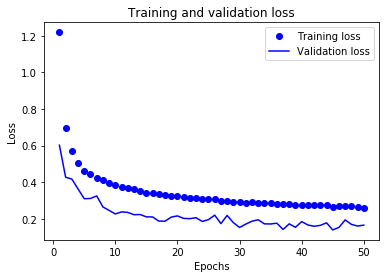

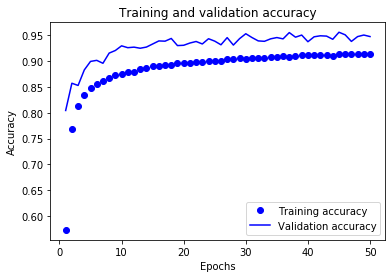

In [42]:

# capture the model accuracy and loss by epoch
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

# plot the model's accuracy and loss by epoch
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy'
)
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [43]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 21s 2ms/step
test_acc: 0.9508000016212463
